In [118]:
%load_ext autoreload
%autoreload 2
from importlib import reload

from collections import defaultdict, Counter

import numpy

import random
from matplotlib import pyplot as plt
from random import shuffle, choice, randint

import math
import keras
import tensorflow

import pickle

from sklearn.metrics import f1_score, log_loss

from logistic_utils import logistic, pr_to_spread


print("started")


# from google.colab import drive
# drive.mount('/content/gdrive')
import sys
# sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
from NN_utils import WeightClip
def custom_avl2_inner(x):
    return lam * tensorflow.math.reduce_mean(tensorflow.math.square(x))

def custom_avl2(lam):
    return custom_avl2_inner(lam)

# def calc_probs_from_embs(students,questions):
#     students2 = numpy.repeat(students, len(questions), axis=0)
#     questions2 = numpy.tile(questions, (len(students),1))
#     zmask = numpy.isclose(questions2,-10).astype(int)
#     diffs = students2-questions2
#     prs = numpy.exp(diffs)/(1.0+ numpy.exp(diffs))
#     prs = numpy.maximum(zmask,prs)
#     probs2 = numpy.prod(prs, axis=1).reshape(len(students), len(questions))
#     return probs2

# def calc_probs(s,q):
#     zmask = numpy.isclose(q,-10).astype(int)
#     diff = s-q
#     prs = 1.0/(1.0+ numpy.exp(-diff))
#     prs = numpy.maximum(zmask,prs)
#     # print(prs)
#     if len(q.shape)>1 and len(q.shape[0]) > 1:
#       raise Exception("tensor is wrong shape, duh")
#       # pr = pr.reshape(len(q))
#     pr = numpy.prod(prs)
#     return pr, zmask

# home = "/content/gdrive/My Drive/Colab Notebooks"
home="."
# work_dir = "lfa_models"
# work_dir = "models"
# work_dir = "pfa_models"

import pandas
mapping = pandas.read_csv(home+"/real_data/qn_act_map.csv")
# mapping.index = mapping["qn_id"]
# mapping.drop("qn_id", axis=1, inplace=True)
print(mapping[0:100])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
started
                   qn_id     activity_name            activity_skill
0         Dialogue 1~1.0        Dialogue 1         speaking~dialogue
1         Dialogue 1~2.0        Dialogue 1         speaking~dialogue
2         Dialogue 1~3.0        Dialogue 1         speaking~dialogue
3         Dialogue 1~4.0        Dialogue 1         speaking~dialogue
4         Dialogue 1~5.0        Dialogue 1         speaking~dialogue
5    Minimal pairs 1~1.0   Minimal pairs 1   listening~minimal_pairs
6    Minimal pairs 1~2.0   Minimal pairs 1   listening~minimal_pairs
7    Minimal pairs 1~3.0   Minimal pairs 1   listening~minimal_pairs
8    Minimal pairs 1~4.0   Minimal pairs 1   listening~minimal_pairs
9    Minimal pairs 1~5.0   Minimal pairs 1   listening~minimal_pairs
10   Minimal pairs 1~6.0   Minimal pairs 1   listening~minimal_pairs
11   Minimal pairs 1~7.0   Minimal pairs 1   listening~minimal_pairs
12   Mi

In [119]:
    col_map = {
        "reading":"red",
        "writing":"yellow",
        "listening":"green",
        "speaking":"blue"
    }

    low_col_map = {
      'error finding': '#ffff00', 
      'spelling': '#bbbb00', 

      'phrasal verbs': '#ff0000', 
      'speed reading': '#bb0000', 
      'text matching': '#770000',

      'dialogue': '#0000ff', 
      'topic associations': '#0000bb', 

      'minimal pairs': '#00bb00', 
      'topic match': '#007700', 
     }
    
    

    
    

    low_shape_map = {
      'error finding': 'o', 
      'spelling': 's', 

      'phrasal verbs': 'o', 
      'speed reading': 's', 
      'text matching': '*',

      'dialogue': 'o', 
      'topic associations': 's', 

      'minimal pairs': 'o', 
      'topic match': '^', 
     }

    low_short_map = {
      'error finding': 'ec', 
      'spelling': 'sp', 

      'phrasal verbs': 'pv', 
      'speed reading': 'sr', 
      'text matching': 'tx',

      'dialogue': 'di', 
      'topic associations': 'ta', 

      'minimal pairs': 'mp', 
      'topic match': 'tm', 
     }
    

In [120]:
# #   o_sixs, o_qixs, o_chits, o_out = 
# def convert_to_indices_and_ohe(o_sixs, o_qixs, o_chits, o_out, sid_six_lookup, qid_qix_lookup):
#     o_sixs = [sid_six_lookup[sid] for sid in o_sixs]
#     o_qixs = [qid_qix_lookup[qid] for qid in o_qixs]
# #     o_ixs = [sid_six_lookup[sid] for sid in o_sixs]
#     chits_onehot = []
#     for h in o_chits:
#         onehot_hist = [0]*len(qid_qix_lookup)
#         for q in h:
#             if q is not None:
#                 qix = qid_qix_lookup[q]
#                 onehot_hist[qix]+=1
#         chits_onehot.append(onehot_hist)
#     o_out = o_out
#     o_sixs = numpy.array(o_sixs)
#     o_qixs = numpy.array(o_qixs)
#     chits_onehot = numpy.array(chits_onehot)
#     o_out = numpy.array(o_out)
#     return o_sixs, o_qixs, chits_onehot, o_out


In [121]:
import sys
from types import ModuleType, FunctionType
from gc import get_referents

# Custom objects know their class.
# Function objects seem to know way too much, including modules.
# Exclude modules as well.
BLACKLIST = type, ModuleType, FunctionType


def getsize(obj):
    """sum size of object & members."""
    if isinstance(obj, BLACKLIST):
        raise TypeError('getsize() does not take argument of type: '+ str(type(obj)))
    seen_ids = set()
    size = 0
    objects = [obj]
    while objects:
        need_referents = []
        for obj in objects:
            if not isinstance(obj, BLACKLIST) and id(obj) not in seen_ids:
                seen_ids.add(id(obj))
                size += sys.getsizeof(obj)
                need_referents.append(obj)
        objects = get_referents(*need_referents)
    return size

In [122]:
from keras.utils.layer_utils import count_params
from sklearn.metrics import log_loss
# def AIC(y, y_hat, n_params, n_obs=1):
# #     y_hat = model.predict(X)
# #     resid = y - y_hat
# #     sse = numpy.sum(numpy.power(resid,2)) / n_obs
# # y_true = np.array([0, 1, 1])
# # y_pred = np.array([0.1, 0.2, 0.9])

# #     print(y)
# #     print(y_hat)

#     ll = -log_loss(y, y_hat)
#     # 0.60671964791658428
# #     print("LL", ll)
#     k   = n_params
#     aic = 2*k - 2* math.log(ll)
#     return aic

def run_acc_mae_test(m, o_data, t_data, config_dict, print_clfn_report=False):
    from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score
    print(config_dict["cog_model"], "£MB_W", config_dict["emb_w"])
    t_sixs, t_qixs, t_hits, t_out = t_data
    o_sixs, o_qixs, o_hits, o_out = o_data
        
    t_pass, t_fail = None, None
    
    if t_hits.shape[1]==2: #this means we have PFA compatible data with t_hits = (t_pass, t_fail)        
        t_pass = t_hits[:,0]
        t_fail = t_hits[:,1]
        t_hits = t_pass + t_fail
    else:
        pass # do nowt
    
    if len(m.inputs)==4: # if the model is set PFA then it takes 4 inputs
        if t_pass and t_fail:
            p_hats = numpy.round( m.predict( [t_qixs, t_sixs, t_pass, t_fail] ) )
        else:
            raise Exception("looks like a 4-input PFA model trying to read 3-input LFA data")
    else: #backwards compat mode with 3 input models
        m_width = m.inputs[2].shape[1]
        d_width = t_hits.shape[1]
        if m_width != d_width:
            raise Exception("model and data width different", m_width, d_width)
#         if m_width > d_width:
#             print("padding t_hits")
#             t_hits = numpy.pad(t_hits, ((0, 0), (0, m_width-d_width)), constant_values=0)
#             print("t_hits shape now", t_hits.shape)
#         elif d_width > m_width:
#             raise Exception("data history input is wider than model allows, eject")
# #             t_hits = t_hits[:,0:m_width]

#         for tq,ts,th in zip(t_qixs, t_sixs, t_hits):
#             print(tq,ts,th,">>?")
#             tq = numpy.array(tq).reshape(1,1)
#             ts = numpy.array(ts).reshape(1,1)
#             th = numpy.array(th).reshape(1,-1)
# #             inp = numpy.array([[tq], [ts], [th]], dtype=numpy.float)
# #             numpy.array(ts)
# #             numpy.array(th)
#             p_hat = numpy.round( m.predict( [tq, ts, th] ) )
#             print(tq,ts,th,">>",p_hat)

        p_hats = numpy.round( m.predict( [t_qixs, t_sixs, t_hits] ) )
    p_trues = numpy.round(t_out)
    
#     for p,pt in zip(p_hats[0:100], p_trues[0:100]):
#         print(p,pt)
    
    t_f1 = f1_score(p_trues, p_hats, average="macro")
#     f1_micro = f1_score(p_trues, p_hats, average="micro")
    t_acc = accuracy_score(p_trues, p_hats)
    t_mae = mean_absolute_error(p_trues, p_hats)
    n_params = count_params(m.trainable_weights)
    m = None
    aic = 0 #AIC(p_trues, p_hats, n_params)
    print("macro", t_f1  )
#     print("micro", f1_micro)
    print( t_acc )
    print( t_mae )
    if print_clfn_report:
        from sklearn.metrics import classification_report
        print(classification_report(p_trues, p_hats))
        from sklearn.metrics import precision_recall_fscore_support
        print(precision_recall_fscore_support(p_trues, p_hats, average="macro"))
    return t_f1, t_acc, t_mae, aic

In [123]:
import scipy
from scipy.stats import spearmanr

In [124]:
def sig_test(ordered_df, agg, from_first=False):
    import scipy
    ranked_names = ordered_df.index
    
    def do_anova(agg, col=0):
        scores_list = []
        for handle in ranked_names:
            print(handle)
            pears = numpy.array(agg[handle])
            print(pears.shape)
#             scores = [p[col] for p in pears] 
            scores = numpy.ravel(pears[:, col])
            sz = 30 - len(scores)
            if sz >0:
                numpy.random.seed(42)
                pad_scores = numpy.random.choice(scores, size=sz, replace=True)
                scores = numpy.concatenate((scores, pad_scores), axis=0)
            print("handle, no scores is ", len(scores), "was ", len(scores)-sz, "shape=", scores.shape)
            scores_list.append(scores)
        stat,p = scipy.stats.f_oneway(*scores_list)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
#             return False, scores_list
        else:
            print('Probably different distributions')
        return True, scores_list
    

    def do_pairwise_sig_test(ranked_names, scores_list, save_p2p=False, test="ks", from_first=False):
#         seen = set()

        if from_first:
            h1=ranked_names[0]
        else:
            h1 = "RASCH1//(xe/px)"
        ix_to_compare = list(ranked_names).index(h1)
        print("i1 is",ix_to_compare)
        s1s = scores_list[ix_to_compare]
        output_flags = []
#         if True:
#             for jx, (h2, s2s) in enumerate(zip(ranked_names, scores_list)):
#                 if ix==jx or ((ix,jx) in seen or (jx,ix) in seen):
#                     continue
#                 seen.add((ix,jx))
#                 seen.add((jx,ix))
#                 st, p = scipy.stats.ttest_rel(s1s, s2s)
#                 if p > 0.05:
#                     print(ix,jx,"\t",h1,h2,'prob same', numpy.round(p,5))
#                 else:
#                     print(ix,jx,"\t",h1,h2,'------ probably different', numpy.round(p,5))
#                     print(numpy.mean(s1s),numpy.mean(s2s))

#         z = 0
#         output_flags.append(-1)
#         for ix in range(len(ranked_names)-1):
#             h1  = ranked_names[0]
#             s1s = scores_list[0]
#             jx = ix+1
#             h2  = ranked_names[jx]
#             s2s = scores_list[jx]
#             st, p = scipy.stats.ttest_ind(s1s, s2s)
#             if p > 0.05:
#                 output_flags.append(-1)
#             else:
#                 if p <= 0.01:
#                     output_flags.append(0.01)
#                 else:
#                     output_flags.append(0.05)
#                 print()
# #                 print(ix,jx,"\t",h1,h2,'prob same', numpy.round(p,5))
#             else:
#                 print("*****", ix,jx,"\t",h1,h2,'------ probably different', numpy.round(p,5))
#                 print(numpy.mean(s1s),numpy.mean(s2s))
            
        print("RANKED NAMES")
        print(ranked_names)
        pw_df = pandas.DataFrame(index=ranked_names, columns=ranked_names)
        
        for ix,ihandle in enumerate(ranked_names):
            for jx,jhandle in enumerate(ranked_names):# if not save_p2p else ranked_names[0]):
                s1s = scores_list[ix]
                s2s = scores_list[jx]
#                 st, p = scipy.stats.ttest_ind(s1s, s2s, equal_var=False)
                if test=="ks":
                    st, p = scipy.stats.ks_2samp(s1s, s2s)
                    sym = "*"
                elif test=="mw":
                    try:
                        sym = "+"
                        st, p = scipy.stats.mannwhitneyu(s1s, s2s, alternative="two-sided")
                    except:
                        sym = "x"
                        st, p = 0,0
                if math.isnan(p):
                    pw_df.iloc[ix, jx] = ("-",st,p)
                elif p >= 0.05:
                    pw_df.iloc[ix, jx] = ("",st,p)
                else:
                    if p < 0.01:
                        pw_df.iloc[ix, jx] = (sym*2,st,p)
                    else:
                        pw_df.iloc[ix, jx] = (sym,st,p)
        if save_p2p:
            pw_df.to_csv("pairwise_ttest.csv")
        
        output_flags = list(pw_df[ranked_names[ix_to_compare]])
        
        return output_flags
    
    anova_f1, scores_list_f1 = do_anova(agg, 0)
#     anova_acc, scores_list_acc = do_anova(agg, 1)
    ks_flags = ["" for _ in scores_list_f1] # start by setting all flags to false - will not be printed
    scores_list_acc = [0 for x in scores_list_f1]
    mw_flags = ["" for _ in scores_list_acc]
    if anova_f1:
        print("Going pairwise with F1 scores")
        ks_flags = do_pairwise_sig_test(ranked_names, scores_list_f1, save_p2p=False, test="ks", from_first=from_first)
#     if anova_acc:
#         print("\nGoing pairwise with accuracies")
#         acc_flags = do_pairwise_sig_test(ranked_names, scores_list_acc, save_p2p=False)
        mw_flags = do_pairwise_sig_test(ranked_names, scores_list_f1, save_p2p=False, test="mw", from_first=from_first)

    return ks_flags, mw_flags


In [125]:
# # EXPERIMENTAL AUTOENCODER FOR HEU
# def generate_heu_autoencoder(n_questions, row_w):
#     print("ROW W is ", row_w)
#     # def generate_qs_model(qn_table, psi_table, optimiser, _mode="MXFN", loss="MSE"):  
#     from keras.initializers import RandomNormal, RandomUniform, Constant
# #     from keras.layers import LSTM
    
#     hit = Input(shape=(n_questions, ), name="hit_counter", dtype="float32")
#     h = hit

#     h = Dense(row_w, name="internal_repr")(h)

#     out = Dense(n_questions)(h)


#     # p_LFA = σ(a_s + Σ k ∊ skills(q): 𝜸_k*n_sk - d_k)

#     model = Model(inputs=[hit], outputs=out)
#     model.compile(optimizer="adam", loss="mse", metrics=["mae"])
#     print(model.summary())

#     return model

In [126]:
# from keras.callbacks import EarlyStopping
# n_questions = o_hits.shape[1]
# heu = generate_heu_autoencoder(n_questions, 8)
# es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
# heu.fit(o_hits, o_hits, callbacks=[es], validation_split=0.05, epochs=10000, batch_size=len(o_sixs)//1000, shuffle=True)

In [127]:
# from sklearn.metrics import mean_absolute_error, f1_score
# o_hats = numpy.round(heu.predict(o_hits))
# # for thit, that in zip(o_hits, o_hats):
# #     list1 = "".join([str(int(abs(t))) for t in thit])
# #     list2 = "".join([str(int(abs(t))) for t in that])
# #     print(list1)
# #     print(list2)
    
# #     for t,th in zip(thit, that):
# #         print(t,th)
# #     print(thit, that)
# uniq_vals = numpy.unique(o_hits)
# print(uniq_vals)
# f1z = {}
# for val in uniq_vals:
# #     print(o_hits[o_hits==val].ravel())
#     this_f1 = mean_absolute_error(o_hits[o_hits==val].ravel(), o_hats[o_hits==val].ravel())
#     f1z[int(val)] = this_f1
# # print(mean_absolute_error(o_hits[o_hits>0].ravel(), o_hats[o_hits>0].ravel()))
# print(f1z)
# print( mean_absolute_error(o_hits.ravel(), o_hats.ravel()) )

In [128]:
# from sklearn.metrics import mean_absolute_error
# t_hats = numpy.round(heu.predict(t_hits))
# # for thit, that in zip(t_hits, t_hats):
# #     list1 = "".join([str(int(abs(t))) for t in thit])
# #     list2 = "".join([str(int(abs(t))) for t in that])
# #     print(list1)
# #     print(list2)
    
# #     for t,th in zip(thit, that):
# #         print(t,th)
# #     print(thit, that)

# # t_hats = t_hats.ravel()
# # t_hits_flat = t_hits.ravel()

# # f1 = f1_score(t_hits.ravel(), t_hats.ravel(), average="macro")
# # acc = keras.metrics.binary_accuracy(t_hits.ravel(), t_hats.ravel())
# # print(f1, acc)
# uniq_vals = numpy.unique(t_hits)
# f1z = {}
# for val in uniq_vals:
#     this_f1 = mean_absolute_error(t_hits[t_hits==val].ravel(), t_hats[t_hits==val].ravel())
#     f1z[int(val)]=this_f1
# # print(mean_absolute_error(o_hits[o_hits>0].ravel(), o_hats[o_hits>0].ravel()))
# print(f1z)
# print( mean_absolute_error(t_hits.ravel(), t_hats.ravel()) )

In [129]:
seen = None
max_s = 1000000
min_hist = 100
# strat = True # always the case now

data_dir = "real_data"
# dataset_name = "isaac_LFA_strat_"+str(max_s)
dataset_name = "examliftb1_LFA_strat_"+str(max_s)+"_m"+str(min_hist)
# dataset_name = "examliftb1_LFA_100000"
# dataset_name = "examliftb1"#+str(max_s)
fnm = home+"/"+data_dir+"/" + dataset_name
# fnm = home+"/real_data/" + dataset_name
print(fnm)
with open(fnm, 'rb') as f:
     data_bundle = pickle.load(f)
        
        
# data_bundle = None
# (sixs, qixs, hout) = pickle.load(open(home+"/real_data/XL1041.p", "rb"))
# (o_sixs, o_qixs, o_hits, o_out), (v_sixs, v_qixs, v_hits, v_out), (t_sixs, t_qixs, t_hits, t_out) = (o_data, v_data, t_data)


(o_data, v_data, t_data, sid_six_lookup, qid_qix_lookup) = data_bundle
(o_sixs, o_qixs, o_hits, o_out), (v_sixs, v_qixs, v_hits, v_out), (t_sixs, t_qixs, t_hits, t_out) = (o_data, v_data, t_data)

# o_hits = o_hits[:,0] + o_hits[:,1]
# v_hits = v_hits[:,0] + v_hits[:,1]
# t_hits = t_hits[:,0] + t_hits[:,1]

print(numpy.array(o_out).shape)
print(numpy.array(v_data).shape)
print(numpy.array(t_data).shape)

print(len(sid_six_lookup))

./real_data/examliftb1_LFA_strat_1000000_m100
(658050,)
(4,)
(4,)
2512


/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [130]:
# for k in qid_qix_lookup:
# #     if k in t_qixs:
#         print(k, qid_qix_lookup[k])

t_counter = Counter()
v_counter = Counter()
o_counter = Counter()
all_counter = Counter()

mapping = pandas.read_csv(home+"/real_data/qn_act_map.csv")
mapping.index = mapping.qn_id
print(mapping[0:10])

reverse_lookup = {}
for qid in qid_qix_lookup:
    qix = qid_qix_lookup[qid]
    reverse_lookup[qix] = qid

unknown_qs = []
max_qpart = 0
for qix in set(o_qixs):
    k = reverse_lookup[qix]
    qpart = float(k.split("~")[-1])
    if qpart > max_qpart:
        print(qpart)
        max_qpart = qpart
    sk = mapping.loc[k].activity_skill
    o_counter[sk]   +=1
    all_counter[sk] +=1
for qix in set(v_qixs):
    k = reverse_lookup[qix]
    sk = mapping.loc[k].activity_skill
    v_counter[mapping.loc[k].activity_skill] += 1
    all_counter[sk] +=1
for qix in set(t_qixs):
    k = reverse_lookup[qix]
    sk = mapping.loc[k].activity_skill
    t_counter[mapping.loc[k].activity_skill] += 1
    all_counter[sk] +=1

[print("{}: {}".format(*tup)) for tup in o_counter.most_common()]
print(";;;;")
[print("{}: {}".format(*tup)) for tup in v_counter.most_common()]
print(";;;;")
[print("{}: {}".format(*tup)) for tup in t_counter.most_common()]
print(";;;;")
[print("{}: {}".format(*tup)) for tup in all_counter.most_common()]
print(";;;;")

[print(tup) for tup in unknown_qs]

                                   qn_id    activity_name  \
qn_id                                                       
Dialogue 1~1.0            Dialogue 1~1.0       Dialogue 1   
Dialogue 1~2.0            Dialogue 1~2.0       Dialogue 1   
Dialogue 1~3.0            Dialogue 1~3.0       Dialogue 1   
Dialogue 1~4.0            Dialogue 1~4.0       Dialogue 1   
Dialogue 1~5.0            Dialogue 1~5.0       Dialogue 1   
Minimal pairs 1~1.0  Minimal pairs 1~1.0  Minimal pairs 1   
Minimal pairs 1~2.0  Minimal pairs 1~2.0  Minimal pairs 1   
Minimal pairs 1~3.0  Minimal pairs 1~3.0  Minimal pairs 1   
Minimal pairs 1~4.0  Minimal pairs 1~4.0  Minimal pairs 1   
Minimal pairs 1~5.0  Minimal pairs 1~5.0  Minimal pairs 1   

                              activity_skill  
qn_id                                         
Dialogue 1~1.0             speaking~dialogue  
Dialogue 1~2.0             speaking~dialogue  
Dialogue 1~3.0             speaking~dialogue  
Dialogue 1~4.0             speak

[]

In [131]:
    col_map = {
        "reading":"red",
        "writing":"yellow",
        "listening":"green",
        "speaking":"blue"
    }

    low_col_map = {
      'error finding': '#ffff00', 
      'spelling': '#bbbb00', 

      'phrasal verbs': '#ff0000', 
      'speed reading': '#bb0000', 
      'text matching': '#770000',

      'dialogue': '#0000ff', 
      'topic associations': '#0000bb', 

      'minimal pairs': '#00bb00', 
      'topic match': '#007700', 
     }

    low_shape_map = {
      'error finding': 'o', 
      'spelling': 's', 

      'phrasal verbs': 'o', 
      'speed reading': 's', 
      'text matching': '*',

      'dialogue': 'o', 
      'topic associations': 's', 

      'minimal pairs': 'o', 
      'topic match': '^', 
     }

#     low_short_map = {
#       'error finding': 'WEF', 
#       'spelling': 'WSP', 

#       'phrasal verbs': 'RPV', 
#       'speed reading': 'RSR', 
#       'text matching': 'RTM',

#       'dialogue': 'SDI', 
#       'topic associations': 'STA', 

#       'minimal pairs': 'LMP', 
#       'topic match': 'LTM', 
#      }
    

In [132]:
#RESET
agg = defaultdict(list)
model_lookup = {} #defaultdict(list)
max_acc = 0
handles = []


In [133]:
# s = "RASCH1//"
# print(s[0:5])
# print(s[5:7])

In [134]:
todel = set()
ffilter =["MLTMz64"]#,"AFM","CFM"]
for h in agg:
    for f in ffilter:
        if f in h: #h.startswith(f):
            todel.add(h)
for h in todel:
    print("del'g", h)
    del agg[h]

In [135]:
# odata, vdata, tdata, sid_six_lookup, qid_qix_lookup = data_bundle
# (o_sixs, o_qixs, o_hits, o_out), (v_sixs, v_qixs, v_hits, v_out), (t_sixs, t_qixs, t_hits, t_out) = (odata, vdata, tdata)

# print(len(t_qixs))
# for tq in t_qixs:
#     print(tq)
#     if tq not in o_qixs:
#         print(tq, "not in o_qixs")
#         raise Exception("tix not f")
        
# for tq in v_qixs:
#     print("v",tq)
#     if tq not in o_qixs:
#         print(tq, "not in o_qixs")
#         raise Exception("vix not fo")

In [136]:
(o_data, v_data, t_data, sid_six_lookup, qid_qix_lookup) = data_bundle
(o_sixs, o_qixs, o_hits, o_out), (v_sixs, v_qixs, v_hits, v_out), (t_sixs, t_qixs, t_hits, t_out) = (o_data, v_data, t_data)

In [137]:
print(o_hits.shape)
print(v_hits.shape)
print(t_hits.shape)

for th in t_hits:
    print(th, sum(th))

(658050, 1130)
(1254, 1130)
(1258, 1130)
  (0, 0)	2
  (0, 1)	2
  (0, 2)	2
  (0, 3)	2
  (0, 4)	2
  (0, 5)	2
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (0, 302)	1
  (0, 303)	1
  (0, 304)	1
  (0, 305)	1
  (0, 306)	1
  (0, 307)	1
  (0, 308)	1
  (0, 309)	1
  (0, 310)	1
  (0, 311)	1
  (0, 312)	1
  (0, 313)	1
  (0, 314)	1
  (0, 315)	1
  (0, 316)	1
  (0, 317)	1
  (0, 318)	1
  (0, 319)	1
  (0, 320)	1
  (0, 321)	1
  (0, 322)	1
  (0, 323)	1
  (0, 324)	1
  (0, 325)	1
  (0, 326)	1   (0, 0)	2
  (0, 1)	2
  (0, 2)	2
  (0, 3)	2
  (0, 4)	2
  (0, 5)	2
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (0, 302)	1
  (0, 303)	1
  (0, 304)	1
  (

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	2
  (0, 12)	2
  (0, 13)	2
  (0, 14)	2
  (0, 15)	2
  (0, 16)	2
  (0, 17)	2
  (0, 18)	2
  (0, 19)	2
  (0, 20)	2
  (0, 21)	2
  (0, 22)	2
  (0, 23)	2
  (0, 24)	2
  :	:
  (0, 371)	1
  (0, 372)	1
  (0, 374)	1
  (0, 375)	1
  (0, 376)	1
  (0, 377)	1
  (0, 378)	1
  (0, 379)	1
  (0, 380)	1
  (0, 381)	1
  (0, 382)	1
  (0, 383)	1
  (0, 384)	1
  (0, 385)	1
  (0, 386)	1
  (0, 387)	1
  (0, 388)	1
  (0, 389)	1
  (0, 390)	1
  (0, 391)	1
  (0, 392)	1
  (0, 393)	1
  (0, 394)	1
  (0, 395)	1
  (0, 674)	1   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	2
  (0, 12)	2
  (0, 13)	2
  (0, 14)	2
  (0, 15)	2
  (0, 16)	2
  (0, 17)	2
  (0, 18)	2
  (0, 19)	2
  (0, 20)	2
  (0, 21)	2
  (0, 22)	2
  (0, 23)	2
  (0, 24)	2
  :	:
  (0, 371)	1
  (0, 372)	1
  (0, 374)	1
  (0, 375)	1
  (0, 376)	1
  (0, 377)	1
  (0,

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 30)	1
  :	:
  (0, 556)	1
  (0, 557)	1
  (0, 558)	1
  (0, 559)	1
  (0, 560)	1
  (0, 561)	1
  (0, 562)	1
  (0, 563)	1
  (0, 565)	1
  (0, 566)	1
  (0, 567)	1
  (0, 568)	1
  (0, 569)	1
  (0, 570)	1
  (0, 571)	1
  (0, 572)	1
  (0, 573)	1
  (0, 574)	1
  (0, 575)	1
  (0, 576)	1
  (0, 577)	1
  (0, 578)	1
  (0, 579)	1
  (0, 1005)	1
  (0, 1043)	1   (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 30)	1
  :	:
  (0, 556)	1
  (0, 557)	1
  (0, 558)	1
  (0, 559)	1
  (0, 560)	1
  (0, 561)	1
 

  (0, 32)	1
  (0, 33)	1
  (0, 34)	1
  (0, 35)	1
  (0, 36)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	1
  (0, 46)	1
  (0, 47)	1
  (0, 48)	1
  (0, 49)	1
  (0, 50)	1
  (0, 51)	1
  (0, 52)	1
  (0, 53)	1
  (0, 54)	1
  (0, 55)	1
  (0, 56)	1
  (0, 57)	1
  (0, 58)	1
  (0, 59)	1
  :	:
  (0, 431)	1
  (0, 432)	1
  (0, 433)	1
  (0, 434)	1
  (0, 435)	1
  (0, 436)	1
  (0, 437)	1
  (0, 438)	1
  (0, 439)	1
  (0, 440)	1
  (0, 441)	1
  (0, 996)	1
  (0, 997)	1
  (0, 998)	1
  (0, 999)	1
  (0, 1000)	1
  (0, 1001)	1
  (0, 1002)	1
  (0, 1007)	1
  (0, 1008)	1
  (0, 1009)	1
  (0, 1010)	1
  (0, 1012)	1
  (0, 1013)	1
  (0, 1014)	1   (0, 32)	1
  (0, 33)	1
  (0, 34)	1
  (0, 35)	1
  (0, 36)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	1
  (0, 46)	1
  (0, 47)	1
  (0, 48)	1
  (0, 49)	1
  (0, 50)	1
  (0, 51)	1
  (0, 52)	1
  (0, 53)	1
  (0, 54)	1
  (0, 55)	1
  (0, 56)	1
  (0, 57)	1
  (0, 58)	1
  (0, 59)	1
  :	:
  (0, 431)	1
  (0, 432)	1
  (0, 433)	1
  (0, 434)	1
 

  (0, 1014)	1   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (0, 494)	1
  (0, 495)	1
  (0, 496)	1
  (0, 498)	1
  (0, 499)	1
  (0, 500)	1
  (0, 501)	1
  (0, 502)	1
  (0, 996)	1
  (0, 997)	1
  (0, 998)	1
  (0, 999)	1
  (0, 1000)	1
  (0, 1001)	1
  (0, 1002)	1
  (0, 1005)	1
  (0, 1006)	1
  (0, 1007)	1
  (0, 1008)	1
  (0, 1009)	1
  (0, 1010)	1
  (0, 1011)	1
  (0, 1012)	1
  (0, 1013)	1
  (0, 1014)	1
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (0, 339)	2
  (0, 340)	2
  (0, 341)	2
  (0, 342)	2
  (0

  (0, 1014)	1   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 9)	1
  (0, 10)	2
  (0, 11)	2
  (0, 12)	2
  (0, 13)	2
  (0, 14)	2
  (0, 15)	2
  (0, 16)	2
  (0, 17)	2
  (0, 18)	2
  (0, 19)	2
  (0, 20)	2
  (0, 21)	2
  (0, 22)	2
  (0, 23)	2
  (0, 24)	2
  (0, 25)	1
  (0, 26)	1
  :	:
  (0, 431)	2
  (0, 432)	2
  (0, 433)	2
  (0, 434)	2
  (0, 436)	1
  (0, 437)	1
  (0, 438)	1
  (0, 439)	1
  (0, 440)	1
  (0, 441)	1
  (0, 996)	1
  (0, 997)	1
  (0, 998)	1
  (0, 999)	1
  (0, 1000)	1
  (0, 1001)	1
  (0, 1002)	1
  (0, 1006)	2
  (0, 1007)	1
  (0, 1008)	1
  (0, 1009)	1
  (0, 1010)	1
  (0, 1011)	1
  (0, 1013)	1
  (0, 1014)	1
  (0, 71)	1
  (0, 72)	1
  (0, 73)	1
  (0, 74)	1
  (0, 75)	1
  (0, 76)	1
  (0, 77)	1
  (0, 78)	1
  (0, 79)	1
  (0, 80)	1
  (0, 81)	1
  (0, 82)	1
  (0, 83)	1
  (0, 84)	1
  (0, 237)	1
  (0, 238)	1
  (0, 239)	1
  (0, 240)	1
  (0, 241)	1
  (0, 242)	1
  (0, 243)	1
  (0, 244)	1
  (0, 245)	1
  (0, 246)	1
  (0, 247)	1
  :	:
  (0, 465)	1
  (0, 466)	1
  (0, 467

  (0, 1005)	1   (0, 252)	1
  (0, 253)	1
  (0, 254)	1
  (0, 255)	1
  (0, 256)	1
  (0, 257)	1
  (0, 258)	1
  (0, 259)	1
  (0, 260)	1
  (0, 261)	1
  (0, 262)	1
  (0, 263)	1
  (0, 264)	1
  (0, 265)	1
  (0, 266)	1
  (0, 267)	1
  (0, 268)	1
  (0, 269)	1
  (0, 270)	1
  (0, 271)	1
  (0, 272)	1
  (0, 273)	1
  (0, 274)	1
  (0, 275)	1
  (0, 276)	1
  :	:
  (0, 569)	1
  (0, 570)	1
  (0, 571)	1
  (0, 572)	1
  (0, 573)	1
  (0, 574)	1
  (0, 575)	1
  (0, 576)	1
  (0, 577)	1
  (0, 578)	1
  (0, 579)	1
  (0, 580)	1
  (0, 581)	1
  (0, 582)	1
  (0, 583)	1
  (0, 584)	1
  (0, 585)	1
  (0, 587)	1
  (0, 588)	1
  (0, 589)	1
  (0, 590)	1
  (0, 591)	1
  (0, 592)	1
  (0, 593)	1
  (0, 1005)	1
  (0, 6)	1
  (0, 31)	1
  (0, 71)	1
  (0, 72)	1
  (0, 73)	1
  (0, 74)	1
  (0, 75)	1
  (0, 76)	1
  (0, 77)	1
  (0, 78)	1
  (0, 79)	1
  (0, 80)	1
  (0, 81)	1
  (0, 82)	1
  (0, 84)	1
  (0, 85)	1
  (0, 86)	1
  (0, 87)	1
  (0, 88)	1
  (0, 89)	1
  (0, 90)	1
  (0, 91)	1
  (0, 92)	1
  (0, 93)	1
  (0, 94)	1
  :	:
  (0, 432)	1
  (0, 433)	

  (0, 32)	2
  (0, 33)	2
  (0, 34)	2
  (0, 35)	2
  (0, 36)	2
  (0, 39)	2
  (0, 40)	2
  (0, 41)	2
  (0, 42)	2
  (0, 43)	2
  (0, 44)	2
  (0, 45)	2
  (0, 46)	2
  (0, 47)	2
  (0, 48)	2
  (0, 49)	2
  (0, 50)	2
  (0, 51)	2
  (0, 52)	2
  (0, 53)	2
  (0, 54)	2
  (0, 55)	2
  (0, 56)	2
  (0, 57)	2
  (0, 58)	1
  :	:
  (0, 650)	1
  (0, 651)	1
  (0, 652)	1
  (0, 653)	1
  (0, 654)	1
  (0, 655)	1
  (0, 656)	1
  (0, 657)	1
  (0, 658)	1
  (0, 659)	1
  (0, 660)	1
  (0, 661)	1
  (0, 662)	1
  (0, 663)	1
  (0, 664)	1
  (0, 666)	1
  (0, 667)	1
  (0, 668)	1
  (0, 669)	1
  (0, 670)	1
  (0, 671)	1
  (0, 672)	1
  (0, 674)	3
  (0, 1005)	1
  (0, 1043)	1   (0, 32)	2
  (0, 33)	2
  (0, 34)	2
  (0, 35)	2
  (0, 36)	2
  (0, 39)	2
  (0, 40)	2
  (0, 41)	2
  (0, 42)	2
  (0, 43)	2
  (0, 44)	2
  (0, 45)	2
  (0, 46)	2
  (0, 47)	2
  (0, 48)	2
  (0, 49)	2
  (0, 50)	2
  (0, 51)	2
  (0, 52)	2
  (0, 53)	2
  (0, 54)	2
  (0, 55)	2
  (0, 56)	2
  (0, 57)	2
  (0, 58)	1
  :	:
  (0, 650)	1
  (0, 651)	1
  (0, 652)	1
  (0, 653)	1
  (0, 654

  (0, 32)	1
  (0, 33)	1
  (0, 34)	1
  (0, 35)	1
  (0, 36)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	1
  (0, 46)	1
  (0, 47)	1
  (0, 48)	1
  (0, 49)	1
  (0, 50)	1
  (0, 51)	1
  (0, 52)	1
  (0, 53)	1
  (0, 54)	1
  (0, 55)	1
  (0, 56)	1
  (0, 57)	1
  (0, 58)	1
  :	:
  (0, 1082)	1
  (0, 1083)	1
  (0, 1087)	1
  (0, 1088)	1
  (0, 1089)	1
  (0, 1090)	1
  (0, 1091)	1
  (0, 1092)	1
  (0, 1093)	1
  (0, 1094)	1
  (0, 1095)	1
  (0, 1096)	1
  (0, 1097)	1
  (0, 1098)	1
  (0, 1099)	1
  (0, 1100)	1
  (0, 1101)	1
  (0, 1102)	1
  (0, 1103)	1
  (0, 1104)	1
  (0, 1105)	1
  (0, 1106)	1
  (0, 1107)	1
  (0, 1108)	1
  (0, 1109)	1   (0, 32)	1
  (0, 33)	1
  (0, 34)	1
  (0, 35)	1
  (0, 36)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	1
  (0, 46)	1
  (0, 47)	1
  (0, 48)	1
  (0, 49)	1
  (0, 50)	1
  (0, 51)	1
  (0, 52)	1
  (0, 53)	1
  (0, 54)	1
  (0, 55)	1
  (0, 56)	1
  (0, 57)	1
  (0, 58)	1
  :	:
  (0, 1082)	1
  (0, 1083)	1
  (0, 1087

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	2
  (0, 11)	2
  (0, 12)	2
  (0, 13)	2
  (0, 14)	2
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	2
  :	:
  (0, 424)	1
  (0, 425)	1
  (0, 426)	1
  (0, 427)	1
  (0, 428)	1
  (0, 429)	1
  (0, 430)	1
  (0, 431)	1
  (0, 432)	1
  (0, 433)	1
  (0, 434)	1
  (0, 996)	1
  (0, 997)	1
  (0, 998)	1
  (0, 999)	1
  (0, 1000)	1
  (0, 1001)	1
  (0, 1002)	1
  (0, 1007)	1
  (0, 1008)	1
  (0, 1009)	1
  (0, 1010)	1
  (0, 1011)	1
  (0, 1013)	1
  (0, 1014)	1   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	2
  (0, 11)	2
  (0, 12)	2
  (0, 13)	2
  (0, 14)	2
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	2
  :	:
  (0, 424)	1
  (0, 425)	1
  (0, 426)	1
  (0, 427)	1
  (0, 428)	1
  (0, 

In [138]:
# v_pairs = [(i,j) for (i,j) in zip(v_sixs, v_qixs)]
# t_pairs = [(i,j) for (i,j) in zip(t_sixs, t_qixs)]
# print("lens", len(v_pairs), len(t_pairs))
# t_conflicts = 0
# v_conflicts = 0
# cnt = Counter()
# for ij_pair in zip(o_sixs, o_qixs):
#     cnt[ij_pair] += 1
#     if ij_pair in t_pairs:
#         print(ij_pair, "in tpairs")
#         t_conflicts+=1
#     if ij_pair in v_pairs:
#         print(ij_pair, "in vpairs")
#         v_conflicts+=1
# #     print(ij_pair)
# #     assert ij_pair not in t_pairs
# #     assert ij_pair not in v_pairs
# print(t_conflicts, v_conflicts)
# for k in cnt:


#     print(k, cnt[k])

In [160]:
agg = defaultdict(list)
model_lookup = {} #defaultdict(list)
max_acc = 0
handles = []

In [161]:
import os

work_dir = "lfa_models"
# work_dir = "models"

kustom_objex = {'WeightClip': WeightClip, 'custom_avl2': custom_avl2}#, 'custom_avl2_inner':custom_avl2_inner},

mon_lookup = {
    "binary_crossentropy" : "xe",
    "mean_squared_error"  : "mse",
    "mean_absolute_error" : "mae",
    "f1_loss" : "f1",
    "binary_accuracy" : "acc",
    "log_likelihood" : "ll",
    "loss" : "px",
}

core_models = ["CFM", "RASCH", "AFM", "MLTM"]
variant_models = ["AFMg", "MLTMb", "MLTM0"]
ffnn_models = ["MLP", "MLPd"]#, "MLPs", "MLPsz"]#, "CONC"]
regd_models = [s+"z" for s in ["MLTM","MLP","MLPd","AFM","AFMg","CFM","MLTMb","MLTM0","RASCH"]]
# cog_models = core_models
# cog_models = variant_models
# cog_models = regd_models + ffnn_models
# cog_models = ffnn_models
# cog_models = regd_models
# cog_models = core_models + ffnn_models + variant_models + regd_models
# cog_models=["AFM","AFMg","CFM"]
# cog_models=["MLTMz","MLPz","MLPdz","AFMz","CFMz","MLTM","MLP","MLPd","AFM","CFM"]
# cog_models = cog_models + [s+"z" for s in cog_models]

# cog_models = ["RASCH", "MPFMz","PFFNN","ClassicPFM", "APFM", "nqAPFM","ConcatPFM", "Concat3PFM","qConcatPFM", "qConcat3PFM"]
# cog_models = ["MLTM","MLTMz","ClassicPFM","RASCH","Concat3PFM","qConcat3PFM","MLP","MLPz","PFMLP","PFMLPz","Concat3PFMz","qConcat3PFMz"]
# cog_models = ["RASCH","Concat3PFMz","qConcat3PFMz", "MLP","MLPz"]
# cog_models = ["CFM","CPFMv","AFM","CPFM","AFMns","MLTMq","PFMLTMnq","MLTM","PFMLTM",£CL]

# cog_models = ["MLP","PFMLP","APFM","AFM","AFMns","RASCH","ClassicPFM","MLTM","PFMLTM","CFM","PCFM","PCFMv"]
# cog_models = ["MLP","PFMLP","APFM","AFM","AFMns","RASCH","ClassicPFM","MLTM","PFMLTM"]
# cog_models = ["MLTMz", "MLPz","MLTM"]
# cog_models = ["MLPraw","MLPrawDP","MLPrawDen"]#"MLPrawAD","MLPrawADD"]

# cog_models = ["ClassicPFM"]
# cog_models = ["MLTM0z", "MLTMz","MLTMbz", "MLPz", "CFM", "CFMz", "RASCH", "AFM", "AFMz", "AFMg", "AFMgz", "AFMx", "AFMxz", "MLTM", "MLTMa","MLTMb","MLTMp", "MLP", "MLPd"]
# cog_models = ["MLTM0","CFM", "RASCH", "AFM", "AFMg", "AFMx", "MLTM", "MLTMa","MLTMb","MLTMp"]

# cog_models = ["MLTMz","MLTM","ClassicPFM","APFMs","APFM","MPFM","SigPercPFM","ConcatPFM","PercPFM"]
# cog_models = ["RASCH","MLP","MLTM","MLTMz","MPFM","DEEPGAMMA"]
cog_models = ["MLPz","MLTMz"]
# cog_models = ["MLTMz"]
# cog_models = ["AFMg"]
# cog_models = ["CONCz","MLTMz","MLTMbz","MLPz","MLPdz","AFMgz"]
# cog_models = ["MLTMbz"]
# cog_models = ["MLTMz","MLTMaz","MLTMbz","AFMz","AFMgz","CFMz"]
# cog_models = [s+"z" for s in ["MLTM","MLTM0","MLTMp","MLTMa","MLTMb","AFMg","AFMx"]] + ["MLTM"]
# cog_models = ["AFMx", "MLTMa"]

# cog_models = ["RASCH"]

# emb_ws = [1, 2, 4, 8, 16, 24, 32, 64, 96, 128, 256]
# emb_ws = [64]
# emb_ws = [1, 8, 16, 32, 64, 128, 256, 300, 400] #, 500, 1000, 2000]
emb_ws = [64,]
# emb_ws = [1, 8, 16, 32, 64, 128, 256, 512]
# q_ws = [None]
#         losses = ["binary_crossentropy","mean_squared_error","f1_loss"]#, "binary_crossentropy"]
# losses = ["binary_crossentropy"]
# losses = [("mean_squared_error", "val_mean_squared_error")]
# losses = [("f1_loss", "val_f1_loss"),  ("binary_crossentropy", "val_f1_loss"), ("mean_squared_error", "val_mean_squared_error"), ("binary_crossentropy", "val_binary_crossentropy")]
# losses = [("binary_crossentropy", "val_binary_crossentropy"), 
#           ("binary_crossentropy", "val_f1_loss"), 
#           ("f1_loss", "val_f1_loss")]

losses = [
#             ("mean_squared_error", "val_loss"),
            ("binary_crossentropy", "val_loss"),
#             ("f1_loss", "val_f1_loss"),
         ]
q_ws = [None]

#         monitor_settings = ["val_binary_crossentropy","val_binary_accuracy","val_mean_absolute_error", "val_mean_squared_error","val_f1_loss"]
# monitor_settings = ["val_binary_crossentropy"]
monitor_settings = [None]

balance_settings = [  False, True ]
min_reps = 0
n_reps = 30
# max_s = 100000 # set up above in data-loading cell

mon_lookup = {
    "binary_crossentropy" : "xe",
    "mean_squared_error"  : "mse",
    "mean_absolute_error" : "mae",
    "f1_loss" : "f1",
    "binary_accuracy" : "acc",
    "loss" : "px",
}


history_results = []

#LOAD UP Default Rasch model
# for rep in range(min_reps, n_reps):
#     cdict = {}
#     cdict["cog_model"]="RASCH"
#     cdict["emb_w"] = 1
#     cdict["q_weight"]=None
#     cdict["monitor_value"]="val_binary_crossentropy"
#     cdict["balance_classes"]=False
#     cdict["loss"]="binary_crossentropy"
#     cdict["handle"] = "RASCH1//(xe/px)"
#     cdict["rep"] = rep
#     history_results.append(cdict)
    
for cog_model in cog_models:# zip(cog_models, q_ws):
    for w in emb_ws:
        for qw in q_ws:
            for _ in monitor_settings:
                for bal in balance_settings:
                    for lozz,mon in losses:
                        for rep in range(min_reps, n_reps):
                            cdict = {}
                            qcode = "" if (qw is None) else "q"+str(qw)    
                            moncode = mon_lookup[mon[mon.index("_")+1:]]
                            losscode = mon_lookup[lozz]
                            balstr = "bal" if bal else ""
                            
                            handle = "{}{}/{}/{}({}/{})".format(cog_model, w, qcode, balstr, losscode, moncode)                            
                            if handle[0:5]=="RASCH" and not (handle[5:7]=="1/" or handle[5:6]=="z"):
                                continue
                            cdict["cog_model"]=cog_model
                            cdict["emb_w"] = w
                            cdict["q_weight"]=qw
                            cdict["monitor_value"]=mon
                            cdict["balance_classes"]=bal
                            cdict["loss"]=lozz
                            cdict["handle"] = handle
                            cdict["rep"] = rep
                            history_results.append(cdict)

for item in history_results:
    config_dict = item
#     cog_model = config_dict["cog_model"]
#     emb_w = config_dict["emb_w"]
#     q_weight = config_dict["q_weight"]
#     mon = config_dict["monitor_value"]
#     bal = config_dict["balance_classes"]
#     lozz = config_dict["loss"]
    handle = config_dict["handle"]
    rep = config_dict["rep"]
    
#     if handle[0:5]=="RASCH":
#         continue
    
    if max_s != 100000:
        handle += "#"+str(max_s)
                
    fnm = home+"/"+work_dir+"/" + handle.replace("/","~") + "_" + str(rep)
    print(handle, fnm)
    
#     if handle in agg and len(agg[handle])>rep:
#         print(handle,rep, "in agg, continuing")
#         continue
    
#     if not os.path.isfile(fnm):
#         print(fnm, "not found")
#         continue
#         raise Exception(fnm+" not found")
    try:
        m = keras.models.load_model(fnm, custom_objects=kustom_objex, compile=False)
        print(fnm, "loaded")
        print(m.summary())
    except Exception as e:
#         print("problem loading", fnm)
#         print(str(e))
        continue
#     print("size m=", sys.getsizeof(m), sys.getrefcount(m))
    
#     handle = "{}{}/{}/{}({}/{})".format(cog_model, emb_w, qcode, "bal" if bal else "", losscode,moncode)
#     handle = "{}:w{}/q{}/{}{}({})".format(cog_model, emb_w, q_weight, mon, "/bal" if bal else "", lozz) 
    #print(fnm, handle)
#     a0s = m.get_layer("alphas").get_weights()[0]
#     print(a0s.shape)
    
#     laya = m.get_layer("qn_embedding").get_weights()
#     print(laya[0])
#     laya[0] = numpy.round(laya[0])
#     print(laya[0])
#     m.get_layer("qn_embedding").set_weights(laya)
    
    t_f1, t_acc, t_mae, aic = run_acc_mae_test(m, o_data, t_data, config_dict, print_clfn_report=True)
    try:
        model_lookup[handle].append(fnm)
    except:
        model_lookup[handle] = [fnm]
    
    print("Len MLU ", handle, "is", len(model_lookup[handle]))
    
    agg[handle].append((t_f1, t_acc, t_mae, aic))
    print("agg size/ref", sys.getsizeof(agg), sys.getrefcount(agg))
#     if handle not in handles:
#         handles.append(handle)
    del m

del history_results
import gc
gc.collect()
print("DUSTED")

MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_0
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_1
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_2
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_3
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_4
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_5
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_6
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_7
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_8
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_9
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_10
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_11
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_12
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_13
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~px)#1000000_14
MLPz64//(xe/px)#1000000 ./lfa_models/MLPz64~~(xe~p

macro 0.7222032557332987
0.7408585055643879
0.2591415
             precision    recall  f1-score   support

          0       0.71      0.60      0.65       507
          1       0.76      0.84      0.79       751

avg / total       0.74      0.74      0.74      1258

(0.7340216086434573, 0.7175915347583892, 0.7222032557332987, None)
Len MLU  MLTMz64//(xe/px)#1000000 is 2
agg size/ref 248 4
MLTMz64//(xe/px)#1000000 ./lfa_models/MLTMz64~~(xe~px)#1000000_2
./lfa_models/MLTMz64~~(xe~px)#1000000_2 loaded
Model: "model_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
psi_select (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
hit_counter (InputLayer)        [(None, 1130)]       0                          

macro 0.7327105296847174
0.7480127186009539
0.25198728
             precision    recall  f1-score   support

          0       0.71      0.63      0.67       507
          1       0.77      0.83      0.80       751

avg / total       0.75      0.75      0.75      1258

(0.7398377337733774, 0.7290305890633659, 0.7327105296847174, None)
Len MLU  MLTMz64//(xe/px)#1000000 is 4
agg size/ref 248 6
MLTMz64//(xe/px)#1000000 ./lfa_models/MLTMz64~~(xe~px)#1000000_4
./lfa_models/MLTMz64~~(xe~px)#1000000_4 loaded
Model: "model_52"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
psi_select (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
hit_counter (InputLayer)        [(None, 1130)]       0                         

In [162]:
# from scipy.stats import mean_absolute_deviation
do_plot = False

def mean_absolute_deviation(a, centre=None):
    if centre is None:
        centre = numpy.median(a)
    abs_devs = numpy.absolute(a - centre)
    mad = numpy.mean(abs_devs)
    return float(mad)
    

this_m = None
del this_m

history_results = None
del history_results
# for item in history_results:
# #     config_dict, m, h = item
#     config_dic = item
#     cog_model = config_dict["cog_model"]
#     emb_w = config_dict["emb_w"]
#     q_weight = config_dict["q_weight"]
#     mon = config_dict["monitor_value"]
#     bal = config_dict["balance_classes"]
#     lozz = config_dict["loss"]
#     if do_plot:
#         v_loss = h.history["val_loss"]
#         v_acc  = h.history["val_accuracy"]
#         v_mse   = h.history["val_mean_absolute_error"]
#         o_loss   = h.history["loss"]
#         o_acc    = h.history["accuracy"]
#         o_mse    = h.history["mean_absolute_error"]
#         plot_acc = v_acc#[0:-10]
#         plot_loss = v_loss#[0:-10]
#         plot_mse = v_mse#[0:-10]
    
#     print(handle, "*" if handle in model_lookup else "")
#     t_f1, t_acc, t_mae = run_acc_mae_test(m, o_data, t_data, config_dict, print_clfn_report=True)
#     model_lookup[handle].append(m)    
#     agg[handle].append((t_f1, t_acc, t_mae))
    
rankin = []
rankin_dict = {}
import pandas
upto=25
for handle in agg:
#     handles.append(handle)
    pears = numpy.array(agg[handle])
#     f1z = pears[:,0]
#     plt.hist(f1z, alpha=0.2)
    print(handle)
    print("pairs shape", pears.shape)
    if len(pears)==0:
        continue
    avg_f1  = numpy.median(pears[:upto,0])
    avg_acc = numpy.median(pears[:upto,1])
    avg_mae = numpy.median(pears[:upto,2])
    avg_aic = 0 #numpy.median(pears[:,3])
#     plt.hist(pears[:,0], alpha=0.5, label=handle)    
    std_f1  = mean_absolute_deviation(pears[:upto,0], centre=avg_f1)
    std_acc = mean_absolute_deviation(pears[:upto,1], centre=avg_acc)
    std_mae = mean_absolute_deviation(pears[:upto,2], centre=avg_mae)
    std_aic = 0 #median_absolute_deviation(pears[:,3])
#     rankin.append( (avg_f1, std_f1, avg_acc, std_acc, avg_mae, std_mae, avg_aic, std_aic, handle) ) 
    rankin_dict[handle] = (avg_f1, std_f1, avg_acc, std_acc, avg_mae, std_mae)#, avg_aic, std_aic)
# print(agg)
# ranked_names, out_strs = sort_rank_and_print(rankin)
#     plt.title(handle)
#     plt.show()

rank_df = pandas.DataFrame.from_dict(rankin_dict, orient="index")
# print(rank_df)

ordered_df = rank_df.sort_values(by=[0,4,2], ascending=[False,False,True])

f1_flags, acc_flags =sig_test(ordered_df, agg, from_first=True)

# ordered_df.index = [s.replace("MLTM0","MLTMp") for s in ordered_df.index]

print("######")
# print(ordered_df)
# raise Exception("delib")


# for rn, os in zip(ranked_names, out_strs):
#     print(rn,os)

def prettify_handles(handlez):
    pretty_handlez = []
    for hx, h in enumerate(list(handlez)):
        h = h[0:h.index("//")]
        h = h.replace("AFMg","AFM$\gamma$")
        h = h.replace("MLTM0","MLTM+")
    #     h = h.replace("MLTMb","MLTM$b$")
        h = h.replace("l","_{l1}")
        h = h.replace("z","\\textsubscript{l2}")
        pretty_handlez.append(h)
    return pretty_handlez

pretty_handlez = prettify_handles(ordered_df.index)

import copy
f1_df = copy.copy(ordered_df)
# f1_df.index = pretty_handlez

x = ordered_df.to_string(header=False,
                  index=True,
                  float_format=lambda x: '%.3f' % x,
                  index_names=False).split('\n')

# out_strs = [' & '.join(ele.split()) for ele in x]
# out_strs = ['{} & {} ({}) & {} ({}) & {} ({})'.format(*([ph] + ele.split()[1:])) for ph,ele in zip(pretty_handlez,x)]
out_strs = ['{} & {} ({}) & {} ({}) & {} ({})'.format(*([ph] + ele.split()[1:])) for ph,ele in zip(ordered_df.index,x)]
# print(out_strs)

print("PRETTY PRINTING")
print(len(agg))
for s,ksf,mwf,raw_handle in zip(out_strs, f1_flags, acc_flags, ordered_df.index):
#     print("-",mwf,"-")
    mwf = "\\ddagger" if mwf[0]=="++" else "\\dagger" if mwf[0]=="+" else "" #mwf
    ksf = "\\blacklozenge" if ksf[0]=="**" else "\\lozenge" if ksf[0]=="*" else "" #ksf
    print(s+"{}{}".format(ksf,mwf)+"\\\\", len(agg[raw_handle]))
    if s.startswith("RASCH"):
        print("---")

#     if s.startswith("MLP"):
#         continue
#     print(s+"{}{}".format("**" if f==0.01 else ("*" if f==0.05 else ""), "\ddagger" if a==0.01 else ("\dagger" if a==0.05 else ""))+"\\\\")
print("- - - - \n\n")
for s,ksf,mwf in zip(out_strs, f1_flags, acc_flags):
#     print(mwf)
    mwf = "\\ddagger" if mwf[0]=="++" else "\\dagger" if mwf[0]=="+" else ""#mwf
    ksf = "\\blacklozenge" if ksf[0]=="**" else "\\lozenge" if ksf[0]=="*" else ""#ksf
    print(s+"{}{}".format(ksf,mwf)+"\\\\")#, len(agg[s.split(" &")[0]]))
#     if s.startswith("RASCH"):
#         print("---")

print("- - - - \n\n")
for s,ksf,mwf in zip(out_strs, f1_flags, acc_flags):
#     print(mwf)
#     mwf = "\\ddagger" if mwf[0]=="++" else "\\dagger" if mwf[0]=="+" else ""#mwf
#     ksf = "\\blacklozenge" if ksf[0]=="**" else "\\lozenge" if ksf[0]=="*" else ""#ksf
    print(s+" & ({:.3f}, {:.3f}) & ({:.3f}, {:.3f})".format(ksf[1], ksf[2], mwf[1], mwf[2])+"\\\\")#, len(agg[s.split(" &")[0]]))
#     if s.startswith("RASCH"):
#         print("---")


top_modelclass_handle = ordered_df.index[0]
# print(top_modelclass_handle)
score_tups = agg[top_modelclass_handle]
# print(score_tups)
f1_ix=0
best_modelinstance_ix = numpy.argmax([t[f1_ix] for t in score_tups])

print(top_modelclass_handle, "is best model class, now setting global model to best model {} in this class...".format(best_modelinstance_ix))
best_models = model_lookup[top_modelclass_handle]
# print("look up this foo", best_models)
best_fnm = best_models[best_modelinstance_ix]
this_m = keras.models.load_model(best_fnm, custom_objects={'WeightClip': WeightClip, 'custom_avl2': custom_avl2}, compile=False)


MLTMz64//(xe/px)#1000000
pairs shape (5, 4)
MLTMz64//(xe/px)#1000000
(5, 4)
handle, no scores is  30 was  5 shape= (30,)
stat=nan, p=nan
Probably different distributions
Going pairwise with F1 scores
i1 is 0
RANKED NAMES
Index(['MLTMz64//(xe/px)#1000000'], dtype='object')
i1 is 0
RANKED NAMES
Index(['MLTMz64//(xe/px)#1000000'], dtype='object')
######
PRETTY PRINTING
1
MLTMz64//(xe/px)#1000000 & 0.732 (0.004) & 0.746 (0.004) & 0.254 (0.004)\\ 5
- - - - 


MLTMz64//(xe/px)#1000000 & 0.732 (0.004) & 0.746 (0.004) & 0.254 (0.004)\\
- - - - 


MLTMz64//(xe/px)#1000000 & 0.732 (0.004) & 0.746 (0.004) & 0.254 (0.004) & (0.000, 1.000) & (450.000, 0.994)\\
MLTMz64//(xe/px)#1000000 is best model class, now setting global model to best model 4 in this class...


/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/scipy/stats/stats.py:3347: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


In [66]:
#NEW MPDRC CODE
def _build_rmx(mod_list, layer_nm, inxs=None):
    adj_mcs = []
    for this_m in mod_list:
        if layer_nm=="qn_embedding":
            ws = this_m.get_layer(layer_nm).get_weights()[0]
            try:
#                 print(this_m.layers)
                base = this_m.get_layer("skill_diffs").get_weights()[0]
                ws = ws * base    
                print("got skill diffs")
            except:
                pass
#                 print("No skill difs")
        else:
            ws = this_m.get_layer(layer_nm).get_weights()[0]
        
        if len(ws)==1:
            return None,None
        if inxs is not None:
            ws = ws[inxs,:]
#         print(ws.shape)
        adj_mx = numpy.array(scipy.spatial.distance.pdist(ws))
#         print(adj_mx.shape)
        adj_mcs.append(adj_mx)
#     print(len(adj_mcs))
    if len(adj_mcs) < 2:
        print(layer_nm + " "+ str(len(mod_list)) + " not enough adj_mxs")
        return None, None
    r_mx, pvals = spearmanr( adj_mcs, axis=1)
#     print(r_mx)
    return r_mx, pvals
######################

def _flatten_corr_mx(r_mx, pvals=None, fisher_z=True, show_hist=False):
    unf_rhos = []
    rhos = []
#     seen = set()
    for ix,_ in enumerate(r_mx):
        for jx,_ in enumerate(r_mx):
            if ix<jx:
#                 if ((ix,jx) not in seen) and ((jx,ix) not in seen):
#                     print("r1", r1)
#                     print("r2", r2)
                this_rho = r_mx[ix,jx] #spearmanr(r1, r2)[0]

                unf_rhos.append(this_rho)
                this_rho = numpy.arctanh(this_rho) # FISHER-Z: convert the sample r to population rho
                
                if pvals is not None:
                    this_pval = pvals[ix,jx]
                    if this_pval>=0.05:
                        print(ix, jx,"p>0.05", this_pval, this_rho)
                    else:
                        rhos.append(this_rho)
    #                 else:
    #                     print("OK")
    if show_hist:
        plt.hist(unf_rhos, alpha=0.5)
        plt.hist(rhos, alpha=0.5)
        plt.show()
    return rhos
############### ARGH I WANT {CURLY BRACES}
    
def calc_MPDRC_for_model(model_dict, model_name, layer_nm, inxs=None):
    print(model_name)
#     for target, fnm_list in model_dict.items():
    fnm_list = model_dict[model_name]
#     print(fnm_list)
    mod_list = []
    for fnm in set(fnm_list):
        try:
            mod_list.append(keras.models.load_model(fnm, custom_objects={'WeightClip': WeightClip, 'custom_avl2': custom_avl2}, compile=False))
        except:
            print("didn't find", fnm, "but no matter")

    r_mx, pvals = _build_rmx(mod_list, layer_nm, inxs=inxs)
    if r_mx is None:
        return target, layer_nm, -2, -2
    rhos = _flatten_corr_mx(r_mx, pvals)
#     print(numpy.tanh(rhos))
    mu_frho = numpy.mean(rhos)
    mu_rho = numpy.tanh(mu_frho)
    mae_rho = numpy.tanh(numpy.mean(numpy.abs(rhos - mu_frho)))
    print(target, layer_nm, mu_rho, mae_rho)
    return target, layer_nm, mu_rho, mae_rho


targets = ordered_df.index
mpdrc_0_fields = [("qn_embedding", t_qixs), ("alphas", t_sixs)]
mpdrc_0_df = pandas.DataFrame(None, targets, [m[0] for m in mpdrc_0_fields])

for target in targets:
    for layer_nm, ixs in mpdrc_0_fields:
        target, layer_nm, mu_rho, sd_rho = calc_MPDRC_for_model(model_lookup, target, layer_nm, inxs=ixs)
        mpdrc_0_df[layer_nm].loc[target] = mu_rho

print("\n 1st ORDER PARAMS")
mpdrc_1_fields = [("qk_loadings", t_qixs), ("gammas", t_sixs)]
mpdrc_1_df = pandas.DataFrame(None, targets, [m[0] for m in mpdrc_1_fields])
for target in targets:
    for layer_nm, ixs in mpdrc_1_fields:
        target, layer_nm, mu_rho, sd_rho = calc_MPDRC_for_model(model_lookup, target, layer_nm, inxs=ixs)
        mpdrc_1_df[layer_nm].loc[target] = mu_rho

RASCH1//(xe/px)#1000000
RASCH1//(xe/px)#1000000 qn_embedding 0.9942152738793587 0.5157512697054423
RASCH1//(xe/px)#1000000
RASCH1//(xe/px)#1000000 alphas 0.9073918268179729 0.22348625863200522
RASCH1//bal(xe/px)#1000000
RASCH1//bal(xe/px)#1000000 qn_embedding 0.990413995528202 0.4316075556407181
RASCH1//bal(xe/px)#1000000
RASCH1//bal(xe/px)#1000000 alphas 0.8640432291746126 0.3787645090861712

 1st ORDER PARAMS
RASCH1//(xe/px)#1000000
RASCH1//(xe/px)#1000000 qk_loadings 0.6290813195156708 0.3173190453753338
RASCH1//(xe/px)#1000000
RASCH1//(xe/px)#1000000 gammas 0.8257277172126908 0.2773560829828018
RASCH1//bal(xe/px)#1000000
RASCH1//bal(xe/px)#1000000 qk_loadings 0.56653040032916 0.43120131301437004
RASCH1//bal(xe/px)#1000000
RASCH1//bal(xe/px)#1000000 gammas 0.7638777908674779 0.45313113618302014


In [69]:
mpdrc_combo_fields = [("qn_embedding", t_qixs), ("alphas", t_sixs), ("qk_loadings", t_qixs), ("gammas", t_sixs)]
mpdrc_combo_df = pandas.DataFrame(None, targets, [m[0] for m in mpdrc_combo_fields])


print(mpdrc_1_df[["qk_loadings", "gammas"]])
mpdrc_combo_df[["qn_embedding", "alphas"]] = mpdrc_0_df[["qn_embedding", "alphas"]]
mpdrc_combo_df[["qk_loadings", "gammas"]] = mpdrc_1_df[["qk_loadings", "gammas"]]

mpdrc_combo_df.replace(-2, -0, inplace=True)

mpdrc_combo_df["macro_MPDRC"] = (mpdrc_combo_df.qn_embedding + mpdrc_combo_df.alphas + mpdrc_combo_df.qk_loadings + mpdrc_combo_df.gammas  ) / (3 + (mpdrc_combo_df.gammas.notna()).astype(float))
mpdrc_combo_df.sort_values("macro_MPDRC", ascending=False, inplace=True)

print(mpdrc_combo_df)
for this_df in [mpdrc_combo_df, ]:
    x = this_df.to_string(header=False,
                      index=True,
                      float_format=lambda x: '%.3f' % x,
                      index_names=False).split('\n')
    # out_strs = [' & '.join(ele.split()) for ele in x]
    out_strs = ['{} & {} & {} & {} & {} & {}\\\\'.format(*ele.split()) for ele in x]
    for s in out_strs:
        print(s)
    print("\n")

                           qk_loadings    gammas
RASCH1//(xe/px)#1000000       0.629081  0.825728
RASCH1//bal(xe/px)#1000000     0.56653  0.763878
                            qn_embedding    alphas  qk_loadings    gammas  \
RASCH1//(xe/px)#1000000         0.994215  0.907392     0.629081  0.825728   
RASCH1//bal(xe/px)#1000000      0.990414  0.864043     0.566530  0.763878   

                            macro_MPDRC  
RASCH1//(xe/px)#1000000        0.839104  
RASCH1//bal(xe/px)#1000000     0.796216  
RASCH1//(xe/px)#1000000 & 0.994 & 0.907 & 0.629 & 0.826 & 0.839\\
RASCH1//bal(xe/px)#1000000 & 0.990 & 0.864 & 0.567 & 0.764 & 0.796\\




In [70]:
#MPDRC plot comparative
for mod_type in pandas.unique(unified_df.model_type):
    plot_df = unified_df[unified_df.model_type==mod_type]
    plot_df.sort_values(by="w", ascending=True, inplace=True, axis=0)
    xvals = plot_df["w"]
    for series,series_label in [("d","$\\delta$"),("a0","$\\alpha^0$"),("g","$\\gamma$"),("r","r"),("f1","Macro $F_1$")]:
        yvals = plot_df[series]
        plt.plot(xvals, yvals, label=series_label)
    plt.title(mod_type)
    plt.gca().set_ylim(0,1)
    plt.legend()
    plt.show()
    
#F1 plot comparative
for mod_type in pandas.unique(unified_df.model_type):
    plot_df = unified_df[unified_df.model_type==mod_type]
    plot_df.sort_values(by="w", ascending=False, inplace=True, axis=0)
    xvals = plot_df["w"]
    for series,series_label in [(mod_type,mod_type)]:
        yvals = plot_df["f1"]
        plt.plot(xvals, yvals, label=series_label)
plt.title(mod_type)
plt.legend()
plt.show()

NameError: name 'unified_df' is not defined

In [ ]:
done_comps = set()
stress_list = []

In [ ]:
for h in model_lookup:
    print(h)

In [ ]:
# from sklearn.manifold import MDS
# from sklearn.metrics.pairwise import euclidean_distances
# from scipy.spatial import distance_matrix
# # amx = build_adjacency_matrix(qs)

# # this_handle = "MLTMb8//(xe/f1)"
# # this_handle = "MLPrawDen24//(xe/px)"
# #this_handle = "MLTMz64//bal(xe/f1)"
# this_handle = "MLTMz128//(xe/px)#250000"
# # this_handle = "MLTMa400//(xe/f1)"
# m_list = model_lookup[this_handle]

# this_m = None
# # best_score = sc
# # best_handle = handle
# best_metric = 0
# print("Running models from m_list")
# for fnm_ in m_list:
# #     print(fnm_)
#     m_ = keras.models.load_model(fnm_, custom_objects={'WeightClip': WeightClip, 'custom_avl2': custom_avl2}, compile=False)
#     if t_hits.shape[1]==2:
#         t_pass, t_fail = t_hits
        
#     p_probs = m_.predict( [t_qixs, t_sixs, t_hits] )
#     p_hats = numpy.round( p_probs )
#     t_f1 = f1_score(t_out, p_hats, average="macro")
#     if t_f1 > best_metric:
#         print("new best", this_handle,"f1=",t_f1)
#         best_metric = t_f1
#         this_m = m_


# # qs_fake = numpy.random.randint(0,5, size=(10,5))
# # amx = euclidean_distances(qs, Y=None, Y_norm_squared=None, squared=False, X_norm_squared=None)
# # amx = distance_matrix(qs_fake, qs_fake)
# qs = this_m.get_layer("qn_embedding").get_weights()[0]
# # qs_temp = qs
# # amx = distance_matrix(qs_temp, qs_temp)
# # print(amx.shape)
# # for row in amx[0:10]:
# #     print(row)

# qs = _retrieve_peda_params(this_m, "qn_embedding")
# # ds = _retrieve_peda_params(this_m, "qn_embedding", aux_layers=["skill_diffs"])
# #     elif config == "students":
# a0s = _retrieve_peda_params(this_m, "alphas")
# #     elif config == "practice_loadings":
# rs = _retrieve_peda_params(this_m, "qk_loadings")
# #     elif config == "practice_rates":
# # delta_as = _retrieve_peda_params(this_m, "qk_loadings", avg_layer="gammas")
# #     elif config == "learning_rates":
# gs = _retrieve_peda_params(this_m, "gammas")#, avg_layer="qk_loadings")


# print(qs)
# print(rs)



In [ ]:
# cand_comps = [n for n in list(range(1,10)) +[12,15,17,23,27,35]]#+ list(range(40, 128, 10))]
#cand_comps = [n for n in [1,2,4,8,12,16,24,32,40,48,56,64,96,128,192,256]]# list(range(50, 310, 10))]
# cand_comps = []
cand_comps =[1] + list(range(10,128,10))
print(cand_comps)

# raise Exception("e")

# weights_list = [qs, a0s, rs, gs]
# keys_list = ["q-matrix","a0s","prac load.r", "gammas"]

keys_list = ["student_weights","question_weights","learning","practice"]
# weights_list = [ numpy.concatenate([a0s,gs], axis=1), numpy.concatenate([qs,rs], axis=1) ]
weights_list = [ a0s,gs, qs,rs ]

stress_list_list = []
plt.figure(figsize=(10,10))
for wk,ws in zip(keys_list, weights_list):
    print(wk, ws.shape)
    stress_list = []
    
    for ix,x in enumerate(cand_comps):
#         if x in done_comps:
#             print(x,"is seen")
#             continue
#         done_comps.add(x)
#         pca = PCA(n_components=x)
#         pws = pca.fit_transform(ws)
        mds = MDS(n_components=x, metric=True, dissimilarity='euclidean', n_jobs=-1)
#         try:
        mds.fit(ws.astype(numpy.float64))
#         except:
#             print("fxud")
        stress = mds.stress_
        stress_list.insert(ix,stress)
    # print(xys)
    print(cand_comps)
    print(stress_list)
    # plt.scatter(x=xys[:,0], y=xys[:,1])
    # plt.scatter(x=cand_comps, y=stress_list)
#     plt.plot(cand_comps, stress_list, label=wk)

        # y256 = stress_list[cand_comps.index(256)]
        # plt.axhline(y=y256, color='r', linestyle='-')
    stress_list_list.append(stress_list)

In [ ]:
plt.figure(figsize=(10,10))
offset = 0
for sl,wk in zip(stress_list_list, keys_list):
    print(sl)
    plt.plot(cand_comps, numpy.array(sl)+offset, label=wk)
    offset+=10

plt.ylim(0.0,200000)
plt.grid()
plt.legend()
plt.ylabel("MDS Stress")
plt.xlabel("Reduced number of dimensions")
plt.show()
        
# xys = mds.fit_transform(amx)
# del amx

In [ ]:
#rankin.append( (avg_f1, std_f1, avg_acc, std_acc, avg_mae, std_mae, handle) ) 
xs, ys, ups, los = [],[],[],[]
handle_filter = "MLTM"
for tup in rankin:
#     handle = tup[-1]
    if not handle.startswith(handle_filter):
        continue
    if "bal" not in handle:
        continue
    print(handle)
    w = int(handle.split("/")[0][len(handle_filter):])
    y = tup[0]
    s = tup[1]
    xs.append(w)
    ys.append(y)
    ups.append(y+s)
    los.append(y-s)
xs,ys,ups,los = zip(*sorted(zip(xs, ys, ups, los)))

plt.plot(xs,ys)
plt.plot(xs,ups, linestyle="--")
plt.plot(xs,los, linestyle="--")
plt.title("ExamLift(B1) - Effect of embedding width on prediction ({})".format(handle_filter))
plt.xlabel("Embedding width")
plt.ylabel("$F_{1}$ score")
plt.show()

MLP:w32/qNone/val_f1_m/bal & 0.722 (0.01066) & 0.736 (0.01128) & 0.264 (0.01128) \\
MLP:w32/qNone/val_f1_m & 0.711 (0.00962) & 0.727 (0.00913) & 0.273 (0.00913) \\

MLP:w32/qNone/val_mean_absolute_error & 0.705 (0.00485) & 0.721 (0.00382) & 0.279 (0.00382) \\
MLP:w32/qNone/val_mean_absolute_error/bal & 0.703 (0.00599) & 0.717 (0.00525) & 0.283 (0.00525) \\
MLP:w32/qNone/val_f1_m/bal

In [ ]:
do_plot=True

plt.figure(figsize=(8,8))

for item in history_results:
    #     best_x = range(len(v_acc))[-11]
    #     plt.ylim(0,1)
    if do_plot:
        plt.plot(plot_acc, label="{} (val acc) {}".format(cog_model, emb_w))
        plt.annotate("{} (val acc) {}".format(cog_model, emb_w), (len(plot_acc), plot_acc[-1]))
    #     plt.axvline(x=best_x, ymax=max(v_acc), linestyle="--")
    #     plt.plot(plot_acc, label="{} (trn loss)".format(min_h))
    #     plt.plot(plot_loss, linestyle="--", label="{} (val loss)".format(min_h))
    #     plt.plot(plot_mse, linestyle="-", label="{}".format(cog_model))
    #     plt.plot(plot_loss, linestyle="--", label="{} (loss)".format(cog_model))
    #     plt.legend(title="Cognitive Model")
    #     plt.ylabel("Validation Mean Absolute Error (Val MAE)")
        plt.ylabel("Validation Accuracy")
        plt.xlabel("Number of epochs")
        plt.title("Training of different cognitive models (Exam Lift (B1))")

#     print("**", max_mod, max_acc, min_loss, min_mse)
#     m = best_m
plt.legend()
plt.show()

In [ ]:
# process_history_results(history_results, o_data, t_data)



MLTM+ 14 10 & 0.73 & 0.27 \\
LFA 14 None & 0.73 & 0.27 \\
SLFA 14 1000 & 0.72 & 0.28 \\
SLFA 14 10 & 0.72 & 0.28 \\
SLFA 14 None & 0.72 & 0.28 \\
SLFA 14 100 & 0.72 & 0.28 \\
LFA 14 10 & 0.72 & 0.28 \\
MLTM+ 14 100 & 0.72 & 0.28 \\
SLFA 14 1 & 0.72 & 0.28 \\
MLTM+ 14 1000 & 0.72 & 0.28 \\
LFA 14 1 & 0.71 & 0.29 \\
LFA 14 1000 & 0.71 & 0.29 \\
LFA 14 100 & 0.71 & 0.29 \\
MLTM+ 14 1 & 0.7 & 0.3 \\
MLTM+ 14 None & 0.69 & 0.31 \\

In [ ]:
pickle.dump(((o_sixs, o_qixs, o_chits, o_out), (v_sixs, v_qixs, v_chits, v_out), (t_sixs, t_qixs, t_chits, t_out)), open(home+"/my_shitty_dataset.p", "wb"))
# o_chits, v_chits, t_chits = None, None, None

In [ ]:
# import gc, zlib

# ((o_sixs, o_qixs, o_chits, o_out), (v_sixs, v_qixs, v_chits, v_out), (t_sixs, t_qixs, t_chits, t_out)) = pickle.load(open(home+"/my_shitty_dataset.p", "rb"))

# print(o_chits [0:10])

# # raise Exception("on purpose")
# # def uncomp(chits):
# #   for hix, chrow in enumerate(chits):
# #     chits[hix] = pickle.loads(zlib.decompress(chrow))
# #   chits = numpy.array(chits, dtype="uint8")
# #   return chits
      
# # print("uncomping")
# # o_hits = uncomp(o_chits)
# # v_hits = uncomp(v_chits)
# # t_hits = uncomp(t_chits)
# # print("straight outta comp-ton")

# o_hits = numpy.array(o_chits)
# v_hits = numpy.array(v_chits)
# t_hits = numpy.array(t_chits)

# o_chits, v_chits, t_chits = None, None, None


In [ ]:
strat = [ numpy.random.choice([0,1], size=t_out.shape, p=[1/3.47,2.47/3.47]) for _ in range(100)]
rands = [ numpy.random.choice([0,1], size=t_out.shape) for _ in range(100)]

print("Baseline F1s")
print(f1_score(numpy.ones_like(t_out), t_out, average="macro"))
print(numpy.mean( [ f1_score(ayn, t_out, average="macro") for ayn in rands ] ))
print(numpy.mean( [ f1_score(s,   t_out, average="macro") for s in strat   ] ))
print("MAEs")
print(float(mean_absolute_error(numpy.ones_like(t_out), t_out)))
print(numpy.mean( [ mean_absolute_error(ayn, t_out) for ayn in rands ] ))
print(numpy.mean( [ mean_absolute_error(s,   t_out) for s in strat   ] ))

del strat
del rands

In [ ]:
min_mae = math.inf
best_w = 0

In [ ]:
print(t_sixs)
print(len(numpy.unique(t_sixs)))
print(len(numpy.unique(t_qixs)))

In [ ]:
for ix,row in enumerate(mapping.iterrows()):
    print(ix, row[0])

In [ ]:
# def draw_estimated_learning_curves(m, s_index, sixs, qixs, hits, obs=None, lookup=None):
#   # plt.figure(figsize=(10,10))
#   max_hist = 200 #int(numpy.max(hits))
#   # for s in numpy.unique(sixs):
#   bag_o_qixs = numpy.unique(qixs).reshape(-1,1)
#   numpy.random.seed(666)
#   numpy.random.shuffle(bag_o_qixs)

#   for s in [s_index, ]:
#     sel_indices = (sixs==s).ravel()
#     # _qixs = qixs[sel_indices].reshape(-1,1) # (N-rows x 1-feat)  i.e. [ [q0], [q1], ...  [qN] ]
#     _hits = hits[sel_indices]
#     _sixs = numpy.array([s] * len(_hits)).reshape(-1,1)
    
#     plt.figure(figsize=(25,10))
#     ax = plt.gca()

#     num_of_plots = 25
#     ys_of_ys = []

#     for qix in bag_o_qixs[0: num_of_plots]:
#         qix = int(qix)
#         _qixs = numpy.ones_like(_sixs)*qix
#         results = m.predict([_qixs, _sixs, _hits])#.ravel()
#         xs = list(range(len(_sixs)))
#         ys = results.ravel()
#         ys_of_ys.append(ys)
#         ax.plot(xs[0:max_hist],ys[0:max_hist], alpha=0.5)
#         last_x = min(xs[-1], max_hist)
#         qn_id = lookup.iloc[qix].qn_id
#         ax.annotate("{} {}".format(int(qix), qn_id), (last_x, ys[last_x]-0.005 ))
# #         if not (obs is None):
# #             final = int(obs[sel_indices][to_plot][-1])
# #             if final:
# #                 ax.axvline(_hits[to_plot, qix][-1], alpha=0.5, c="black", linestyle="--")

#     ax.plot(xs,numpy.mean(ys_of_ys, axis=0), c="black", linestyle="--")


#     plt.ylim((0.0, 1.0))
#     plt.xlim((0.0, max_hist+2))
#     plt.title("Student {}".format(s))
#     plt.show()

# # print(o_hits.shape)
# # print(t_hits.shape)
# # all_sixs = numpy.concatenate((o_sixs, t_sixs), axis=0)
# # all_qixs = numpy.concatenate((o_qixs, t_qixs), axis=0)
# # all_hits = numpy.concatenate((o_hits, t_hits), axis=0)
# all_sixs = o_sixs
# all_qixs = o_qixs
# all_hits = o_hits

# # numpy.set_printoptions(threshold=10000)
# # print(all_hits.shape)
# # for hrow, qx in zip(all_hits[0:50], all_qixs[0:50]):
# #   print(qx, hrow)

# print(numpy.max(numpy.sum(all_hits, axis=1)))

# print(len(numpy.unique(all_qixs)))
# print(len(numpy.unique(all_sixs)))

# for s_index in numpy.unique(t_sixs)[0:50]:
#     s_index = int(s_index)
#     draw_estimated_learning_curves(m, s_index, all_sixs, all_qixs, all_hits, obs=None, lookup=mapping)

In [ ]:
# qk_loadings = m.get_weights()
# for w in qk_loadings:
#     print(w.shape)
# print(qk_loadings.shape)

Lws = m.get_weights()[1]
Lbs = m.get_weights()[2]

qk_loadings = Lws #+ Lbs
print(qk_loadings.shape)
print(qk_loadings[0:10, :])

In [ ]:
from keras import Model
qk_loadings = this_m.get_layer("qk_loadings").get_weights()[0]
print(qk_loadings)

this_m.summary()
# w = qk_loadings.shape[0]
uniq_qixs = numpy.unique(list(qid_qix_lookup.values()))
print(uniq_qixs)
zer0s = [0] * len(uniq_qixs)
for qix in uniq_qixs:
    zer0s[qix] = 1
    intermediate_layer_model = Model(inputs=this_m.input,
                          outputs=this_m.get_layer("qk_loadings").output)
    practice_output = intermediate_layer_model.predict([[0],[0], [zer0s]])
    print(practice_output)
    zer0s[qix] = 0
    

In [ ]:
print(model_lookup.keys())

In [28]:
from sklearn.decomposition import PCA

# this_handle = "MLPz64//(xe/f1)"
# this_handle = "MLPraw64//bal(xe/px)"
this_handle = "MLTMz64//(xe/px)"
# this_handle = "MLPz64//(xe/px)"
m_list = model_lookup[this_handle]
print("Running models from m_list")

unique_tr_set_sixs = numpy.unique(o_sixs)
unique_tr_set_qixs = numpy.unique(o_qixs)

this_m = None
best_metric = -math.inf
for fnm_ in m_list:
    try:
        m_ = keras.models.load_model(fnm_, custom_objects={'WeightClip': WeightClip, 'custom_avl2': custom_avl2}, compile=False)
        print("got model", fnm_)
    except Exception(e):
        print(e)
        continue
    p_probs = m_.predict( [t_qixs, t_sixs, t_hits] )
    p_hats = numpy.round( p_probs )
    t_f1 = f1_score(t_out, p_hats, average="macro")
    if t_f1 > best_metric:
        print("new best", this_handle,"f1=",t_f1)
        best_metric = t_f1
        this_m = m_

qs = this_m.get_layer("qn_embedding").get_weights()[0][unique_tr_set_qixs]
alphas = this_m.get_layer("alphas").get_weights()[0][unique_tr_set_sixs]


# for alp in alphas:
#     print(numpy.round(alp,2))

# for q in qs:
#     print(numpy.round(q,2))


combo_weights = numpy.concatenate([alphas, qs])
dim_red = PCA(n_components=2)
#     dim_red = TSNE(n_components=2)
# dim_red = MDS(n_components=2, metric=True)
txd = dim_red.fit_transform(combo_weights)

end_of_alphas = len(alphas)
sx = txd[0:end_of_alphas, 0]
sy = txd[0:end_of_alphas, 1]
plt.scatter(sx, sy, alpha=0.1, label="students")

qx = txd[end_of_alphas:, 0]
qy = txd[end_of_alphas:, 1]
plt.scatter(qx, qy, alpha=0.1, label="items")
plt.legend()
plt.show()


KeyError: 'MLTMz64//(xe/px)'

In [31]:
print(mapping)

                                               qn_id          activity_name  \
qn_id                                                                         
Dialogue 1~1.0                        Dialogue 1~1.0             Dialogue 1   
Dialogue 1~2.0                        Dialogue 1~2.0             Dialogue 1   
Dialogue 1~3.0                        Dialogue 1~3.0             Dialogue 1   
Dialogue 1~4.0                        Dialogue 1~4.0             Dialogue 1   
Dialogue 1~5.0                        Dialogue 1~5.0             Dialogue 1   
Minimal pairs 1~1.0              Minimal pairs 1~1.0        Minimal pairs 1   
Minimal pairs 1~2.0              Minimal pairs 1~2.0        Minimal pairs 1   
Minimal pairs 1~3.0              Minimal pairs 1~3.0        Minimal pairs 1   
Minimal pairs 1~4.0              Minimal pairs 1~4.0        Minimal pairs 1   
Minimal pairs 1~5.0              Minimal pairs 1~5.0        Minimal pairs 1   
Minimal pairs 1~6.0              Minimal pairs 1~6.0

In [163]:
low_col_map2 = {
  'writing~error_correction': '#ffaa00', 
  'writing~spelling': '#cc8800', 

  'reading~phrasal_verbs': '#ff0000', 
  'reading~speed_reading': '#bb0000', 
  'reading~match_the_text': '#770000',

  'speaking~dialogue': '#0000ff', 
  'speaking~topic_association': '#0000aa', 

  'listening~minimal_pairs': '#00bb00', 
  'listening~topic_match': '#007700', 
 }

low_shape_map2 = {
  'writing~error_correction': 'o', 
  'writing~spelling': 's', 

  'reading~phrasal_verbs': 'o', 
  'reading~speed_reading': 's', 
  'reading~match_the_text': '*',

  'speaking~dialogue': 'o', 
  'speaking~topic_association': 's', 

  'listening~minimal_pairs': 'o', 
  'listening~topic_match': '^', 
 }


#A MESS OF PLOTTAGE
unique_tr_set_qixs = numpy.unique(o_qixs)
unique_tr_set_sixs = numpy.unique(o_sixs)

# psychomode = config_dict["cog_model"]
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sig = lambda z: (1 / (1+numpy.exp(-z)))

all_sixs = set()
all_sixs.update(list(o_sixs))
all_sixs.update(list(v_sixs))
all_sixs.update(list(t_sixs))
all_sixs=list(all_sixs)

print(model_lookup)

# this_handle = "DEEPGAMMA64//bal(f1/f1)"
# this_handle = "DEEPGAMMA64//(xe/px)"
# this_handle = "MLTMz64//(f1/f1)"
this_handle = "MLTMz64//(xe/px)#1000000"
# this_handle = "RASCH1//(xe/px)#1000000"
# this_handle = "MLTMz64//bal(f1/f1)#250000"
# this_handle = "MLTMz64//(xe/px)#500000"
# this_handle = "AFMg128//bal(xe/px)"
# this_handle = "MLTMz2//(xe/f1)"
# this_handle = "AFMg64//(xe/px)"
# this_handle = "MLTM64//(xe/px)"
# this_handle = "MLPz64//(xe/px)"
# this_handle = "MPFM256//(xe/px)"
# this_handle = "MLTMa400//(xe/f1)"
m_list = model_lookup[this_handle]

this_m = None
best_metric = 0
print("Running models from m_list")
for fnm_ in m_list:
    try:
        m_ = keras.models.load_model(fnm_, custom_objects={'WeightClip': WeightClip, 'custom_avl2': custom_avl2}, compile=False)
    except:
        continue
    if len(m_.inputs)==4:
        t_pass = t_hits[:,0]
        t_fail = t_hits[:,1]
        p_probs = m_.predict( [t_qixs, t_sixs, t_pass, t_fail] )
    else:
        p_probs = m_.predict( [t_qixs, t_sixs, t_hits] )
    p_hats = numpy.round( p_probs )
    t_f1 = f1_score(t_out, p_hats, average="macro")
    if t_f1 > best_metric:
        print("new best", this_handle,"f1=",t_f1)
        best_metric = t_f1
        this_m = m_
        
qix_qid_lookup = {}
for k,v in qid_qix_lookup.items():
    qix_qid_lookup[v] = k
print("created qix_qid_lookup")

{'MLTMz64//(xe/px)#1000000': ['./lfa_models/MLTMz64~~(xe~px)#1000000_0', './lfa_models/MLTMz64~~(xe~px)#1000000_1', './lfa_models/MLTMz64~~(xe~px)#1000000_2', './lfa_models/MLTMz64~~(xe~px)#1000000_3', './lfa_models/MLTMz64~~(xe~px)#1000000_4']}
Running models from m_list
new best MLTMz64//(xe/px)#1000000 f1= 0.7318781464741118
new best MLTMz64//(xe/px)#1000000 f1= 0.7327105296847174
new best MLTMz64//(xe/px)#1000000 f1= 0.736606028394495
created qix_qid_lookup


Model: "model_52"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
psi_select (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
hit_counter (InputLayer)        [(None, 1130)]       0                                            
__________________________________________________________________________________________________
gammas (Embedding)              (None, 1, 64)        160768      psi_select[0][0]                 
__________________________________________________________________________________________________
alphas (Embedding)              (None, 1, 64)        160768      psi_select[0][0]                 
___________________________________________________________________________________________

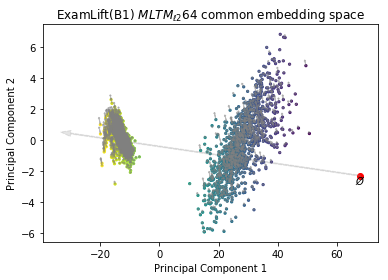

endhhape, gammas (2512, 64)


In [164]:
plot_arrows = True

for cluster_handle, cluster_m in [(this_handle, this_m), ]:
    this_m.summary()
    try:
        skill_diffs = cluster_m.get_layer("skill_diffs").get_weights()[0]
        skill_amp = cluster_m.get_layer("qn_embedding").get_weights()[0][unique_tr_set_qixs]
        assert skill_diffs.shape[1] == skill_amp.shape[1]
        if this_handle.startswith("MLTMb"):
            qs = skill_amp # numpy.pow(skill_diffs, skill_amp)
        else:
            qs = numpy.multiply(skill_diffs, skill_amp)
    except:
        qs = cluster_m.get_layer("qn_embedding").get_weights()[0][unique_tr_set_qixs]
        print("skill difs not found")
    
    practice_loadings = None
#     has_practice_loadings = False
    alphas = cluster_m.get_layer("alphas").get_weights()[0][unique_tr_set_sixs]
    try:
        gammas = cluster_m.get_layer("gammas").get_weights()[0][unique_tr_set_sixs]
        try:
            rhos = cluster_m.get_layer("rhos").get_weights()[0][unique_tr_set_sixs]
            gammas = (gammas+rhos)/2.0
        except:
            pass
            
        avg_gammas = numpy.mean(gammas, axis=0)
        print("gam shp", gammas.shape)
        print("av gam shp", avg_gammas.shape)
        print("av g", avg_gammas)
    except:
        print("some problem with gammas")
        
    try:
        practice_loadings = cluster_m.get_layer("qk_loadings").get_weights()[0][unique_tr_set_qixs]
        avg_ld = numpy.mean(practice_loadings, axis=0)
        
        print("sd g", numpy.std(gammas, axis=0))
#         min_ld = numpy.min(practice_loadings, axis=0)
        
#         print("avav ld", numpy.mean(avg_ld))
#         print("av ld", avg_ld)
#         print("sd ld", numpy.std(practice_loadings, axis=0))
#         avg_ld = (min_ld + max_ld)/2.0
#         print(avg_ld.shape)
#         print(avg_ld)
        practice_loadings = numpy.multiply(practice_loadings, avg_gammas)
    except:
        succ_loadings = cluster_m.get_layer("qP_loadings").get_weights()[0][unique_tr_set_qixs]
        fail_loadings = cluster_m.get_layer("qF_loadings").get_weights()[0][unique_tr_set_qixs]
        practice_loadings = (succ_loadings+fail_loadings)/2.0
        avg_ld = numpy.mean(practice_loadings, axis=0)
        print("some problem with practice loadings")
    
    gammas = numpy.multiply(gammas, avg_ld)
    print(gammas)
    
    gammas = gammas#[all_sixs,:]
    alphas = alphas#[all_sixs,:]

#     w = alphas.shape[1]
#     alpha_offset = pr_to_spread(0.5, w, as_A_and_D=False)
#     alphas = alphas - alpha_offset
    
    print("wtf gam ", gammas.shape)
        
#     arrow_scaler = 1
    st_arrowheads = alphas+ gammas
    qn_arrowheads = qs+practice_loadings
        
    print(qs.shape)
    qidz = [q for q in range(len(qs))]

#     qix_qid_lookup = {}
#     for k,v in qid_qix_lookup.items():
#         qix_qid_lookup[v] = k

    mapping.dropna(inplace=True)
    
#     catz = [mapping.loc[qix_qid_lookup[qid]].activity_skill for qid in qidz]
    catz=[]
    for qid in qidz:
        qix = qix_qid_lookup[qid]
        if qix in mapping.index:
            cat = mapping.loc[qix].activity_skill
        else:
            cat = "Unknown"

#     post_prac = qs + practice_loadings
    xero = numpy.array([[0] * qs.shape[1]])
#     wone = numpy.array([[1] * qs.shape[1]])

    
    combo_weights = numpy.concatenate([alphas, qs]) 
    origin = numpy.min(combo_weights) 
    combo_weights = combo_weights - origin
    maxx = numpy.max(alphas) - origin
    maxx = float(maxx)
    maxx = [[maxx] * alphas.shape[1]]
    combo_weights = numpy.concatenate([xero, maxx, combo_weights])
    print("combo wgt median", numpy.median(combo_weights))
    print("combo wgt min", numpy.min(combo_weights))
    arrowheads = numpy.concatenate([st_arrowheads, qn_arrowheads]) - origin
    arrowheads = numpy.concatenate([xero, maxx, arrowheads])
    
    
#     print("combo min", numpy.min(combo_weights))
#     combo_weights = numpy.concatenate([xero, combo_weights])
    
#     scaler = StandardScaler()
#     combo_weights = scaler.fit_transform(combo_weights)
    dim_red = PCA(n_components=2, random_state=666)
#     dim_red = TSNE(n_components=2)
#     dim_red = MDS(n_components=2, metric=True)
    txd = dim_red.fit_transform(numpy.concatenate([combo_weights,arrowheads]))
    basis = txd[0:len(combo_weights)] #dim_red.fit_transform(combo_weights)
    arras = txd[len(combo_weights):] #dim_red.transform(arrowheads)
#     xerod = dim_red.transform(xero)

#     for b,a in zip(basis, arras):
#         print(a-b) # print the arrow vector itself (not the pos/n vector)

    assert numpy.isnan(numpy.sum(basis))==False

    norms = numpy.linalg.norm(combo_weights[2:], axis=1)
#     arrow_deltas = arrowheads-combo_weights
    arrow_norms = numpy.linalg.norm(arrowheads-combo_weights, axis=1)
#     for ix,an in enumerate(arrow_norms[2:]):
#         if ix < len(st_arrowheads):
#             print("S-> ", an)
#         else:
#             print("Q-> ", an)

#     arrow_norms = numpy.linalg.norm((arrowheads-combo_weights)[0:len(qs)], axis=1)
#     arrow_norms = numpy.linalg.norm((arrowheads-combo_weights)[len(qs):], axis=1)

    plt.figure(figsize=(6,4))
    ax = plt.gca()
    if plot_arrows:
        xs = basis[2:,0]
        ys = basis[2:,1]
        xs_end = arras[2:,0]
        ys_end = arras[2:,1]

        opt = dict(color="gray",
            ls="solid",
            width=.1,
            headwidth=1.5,
            headlength=1,
            alpha=0.5,
            connectionstyle = 'arc3,rad=0')
        for x,y,endx,endy in zip(xs,ys,xs_end,ys_end):
#             print(x,y,endx,endy)
#             dx = endx-x
#             dy = endy-y
#             print("arrow", dx,dy)
#             if dy<0:
            ax.annotate('', xycoords='data', xy=(endx,endy), xytext=(x,y), arrowprops=opt)    
#     ax.annotate('(0,..,0)', xycoords='data', xytext=(basis[0,0]-0.5, basis[0,1]-0.5), arrowprops=opt)

    opt = dict(color="gray",
        ls="dashed",
        width=1,
        headwidth=6,
        headlength=10,
        alpha=0.2,
        connectionstyle = 'arc3,rad=0')
    ax.annotate('', xycoords='data', xy=basis[1], xytext=basis[0], arrowprops=opt)   

    ax.text(basis[0,0], basis[0,1]-0.5, '$\O$', ha="center")
    plt.scatter(basis[2:,0], basis[2:,1], c=norms, alpha=1, edgecolors=None, s=5)
    plt.scatter(basis[0,0], basis[0,1], c="red", alpha=1)
    plt.scatter(basis[1,0], basis[1,1], c="white", alpha=1)
    
#     plt.scatter(arras[:,0], arras[:,1], c=arrow_norms, alpha=0.5)
#     plt.scatter(xerod[0], xerod[0], c="red")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
#     this_handle = "$MLTM_{l2}64$"
    plt.title("ExamLift(B1) $MLTM_{\\ell2}64$ common embedding space")
    plt.savefig(home+"/images/"+dataset_name+"_univ_practice_vecs.pdf", format="pdf")
    plt.show()
    
    print("endhhape, gammas", gammas.shape)

In [ ]:
isaac_meta_data_df = pandas.read_csv("../../hwgen/data_cache/meta_data.csv")

In [ ]:
print(isaac_meta_data_df.columns)

In [ ]:
# print(isaac_meta_data_df)
isaac_meta_data_df.subject.fillna("NA", inplace=True)
isaac_meta_data_df.field.fillna("NA", inplace=True)
isaac_meta_data_df.subject.replace("maths, physics", "maths_for_physics", inplace=True)
isaac_meta_data_df.topic.fillna("NA", inplace=True)
isaac_meta_data_df.level.fillna("?", inplace=True)

isaac_meta_data_df.index = isaac_meta_data_df.question_id
isaac_meta_data_df["activity_skill"] = isaac_meta_data_df["subject"] + "/" + isaac_meta_data_df["field"]
# isaac_meta_data_df["activity_skill"] = isaac_meta_data_df["level"]
#isaac_meta_data_df.question_id

isaac_meta_data_df.activity_skill.replace("NA", "?", inplace=True)
isaac_meta_data_df.activity_skill.replace("NA/NA", "?", inplace=True)

# for row in isaac_meta_data_df["activity_skill"].iteritems():
#     print(row)
    
print(isaac_meta_data_df.activity_skill.unique())
    

In [145]:
import hashlib
isaac_subj_colour_lookup = {}
# isaac_meta_data_df["activity_skill"] = isaac_meta_data_df["activity_skill"].replace(numpy.nan, None).astype(str)

# for skst in pandas.unique(isaac_meta_data_df["activity_skill"]):
for skst in isaac_meta_data_df.activity_skill.unique():
    print(skst)
#     if skst=="nan":
#         skst = "UNK"
#     if skst is None:
#         skst = "UNK"
    if "/" in skst:
        p1,p2 = skst.split("/")[0:2]
        skst = p1
#         p1 = hashlib.md5(str(p1).encode()).hexdigest()[0:2]
#         if p2=="NA":
#             p2 = "00"
#         else:
#             p2 = hashlib.md5(str(p2).encode()).hexdigest()[0:2]
#         dig = p1 + "0000"# + p2
#     else:    
    byteversion = str(skst).encode()
    md5v = hashlib.md5(byteversion)
    dig = str(md5v.hexdigest())[0:6]

#     print(str(dig)[0:6])
    isaac_subj_colour_lookup[str(skst)] = "#"+dig#+"00"
    print(isaac_subj_colour_lookup[str(skst)])
    

NameError: name 'isaac_meta_data_df' is not defined

In [165]:
seen = set()
first_strike = defaultdict(list)
strike_cnt = Counter()
student_accumulator = Counter()
q_hit_cnt = Counter()
q_pass_cnt = Counter()
valid_flags = {}
for s,q,o in zip(o_sixs, o_qixs, o_out):
    if (s,q) not in seen:
        first_strike[q].append(strike_cnt[s])
        strike_cnt[s] += 1
    student_accumulator[s] += 1
    q_hit_cnt[q] += 1
    if o:
        q_pass_cnt[q] += 1
    seen.add((s,q))
    
for q in first_strike:
    qc = q_pass_cnt[q]
    qi = q_hit_cnt[q]
    if qi>1:
        if qc==0 or qc==qi:
            valid_flags[q] = False
        else:
            valid_flags[q] = True
    else:
        valid_flags[q] = False

valid_ixs = []
for qix in numpy.unique(o_qixs):
#     if True:
    if valid_flags[qix]:
        valid_ixs.append(qix)
print("len valid ixs", len(valid_ixs))

valid_sixs = []
for six in numpy.unique(o_sixs):
#     if True:
    if student_accumulator[six]>0:
        valid_sixs.append(six)
print("len valid sixs", len(valid_sixs))


# for q in first_strike:
#     print(q, numpy.median(first_strike[q]), q_hit_cnt[q], q_pass_cnt[q], valid_flags[q])
#     print(q, scipy.stats.mode(first_strike[q])[0][0])


len valid ixs 1115
len valid sixs 2512


In [166]:
ax_lookup = {}

before min [ 1.4146981   0.4008771   0.7180727   0.41200078  0.06884494 -0.2344123
  0.23969446 -0.14970525  0.7208772   0.25968885  0.03855479  0.8699048
  0.62770545  0.51097375  0.34739584  0.9246776  -0.4568484  -0.13081856
  0.1718055   0.5759628   0.74741745  0.14279492  0.55516475  0.41036677
  0.5039226  -0.7446291   0.23134741  0.30898097  1.3217475  -0.28687707
  1.6872814   0.99156725 -0.14475429  0.9252109   0.7746608   0.33548382
  1.0090065   0.9375192   0.9176474   1.4918493   1.5690091  -0.8584379
  0.08483985 -0.60276496  1.0698866   1.1523497   0.73199886  0.34539875
  1.1848505   0.5373874   1.2829275   1.3379847   1.1192693   2.0023556
  0.8551783   0.02019072  0.01830026  0.8188067  -0.63736564  0.30779696
  1.2728312   1.0403948   0.29962164  1.2183223 ]
old rs shape (1130, 64)
avg_q= [-0.26826525 -0.36181545 -0.21731329 -0.2996335  -0.45892906 -0.41816187
 -0.2652111  -0.43485165 -0.3741393  -0.34736156 -0.42789555 -0.50091887
 -0.17327738 -0.4676776  -0.26302862

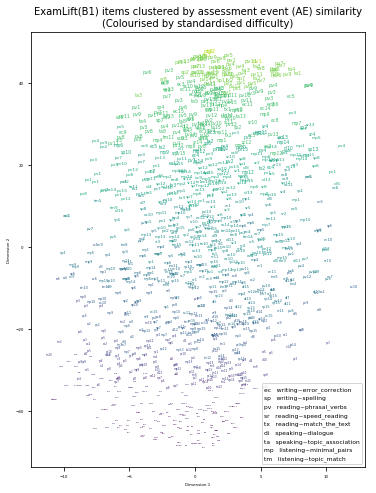

with TSNE
rs txd shape (1115, 2)
plotting scatter group: writing~error_correction
plotting scatter group: writing~spelling
plotting scatter group: reading~phrasal_verbs
plotting scatter group: reading~speed_reading
plotting scatter group: reading~match_the_text
plotting scatter group: speaking~dialogue
plotting scatter group: speaking~topic_association
plotting scatter group: listening~minimal_pairs
plotting scatter group: listening~topic_match
doing dem labelz
<class 'module'>
<class 'matplotlib.legend.Legend'>


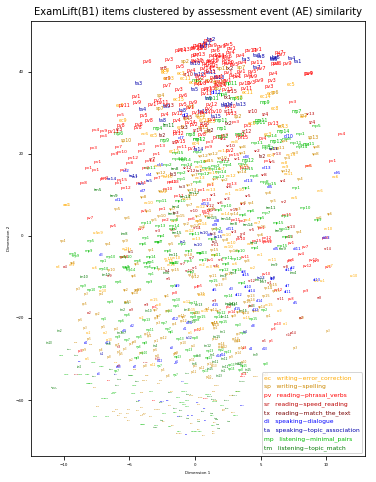

with TSNE
rs txd shape (1115, 2)
plotting scatter group: writing~error_correction
plotting scatter group: writing~spelling
plotting scatter group: reading~phrasal_verbs
plotting scatter group: reading~speed_reading
plotting scatter group: reading~match_the_text
plotting scatter group: speaking~dialogue
plotting scatter group: speaking~topic_association
plotting scatter group: listening~minimal_pairs
plotting scatter group: listening~topic_match
doing dem labelz
<class 'module'>
<class 'matplotlib.legend.Legend'>


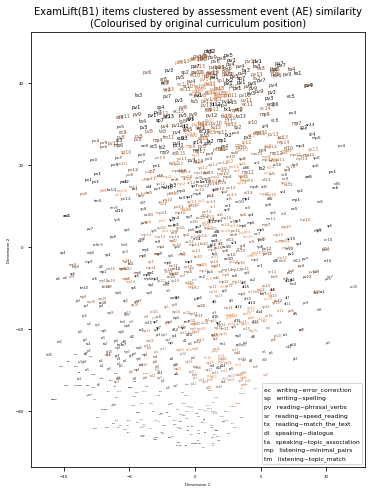

with TSNE
rs txd shape (1115, 2)
plotting scatter group: writing~error_correction
plotting scatter group: writing~spelling
plotting scatter group: reading~phrasal_verbs
plotting scatter group: reading~speed_reading
plotting scatter group: reading~match_the_text
plotting scatter group: speaking~dialogue
plotting scatter group: speaking~topic_association
plotting scatter group: listening~minimal_pairs
plotting scatter group: listening~topic_match
doing dem labelz
<class 'module'>
<class 'matplotlib.legend.Legend'>
5 2830


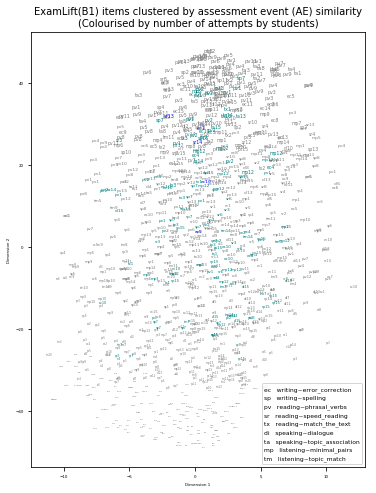

In [167]:
import matplotlib
legend_marker_map = {
  'writing~error_correction': 'ec', 
  'writing~spelling': 'sp', 

  'reading~phrasal_verbs': 'pv', 
  'reading~speed_reading': 'sr', 
  'reading~match_the_text': 'tx',

  'speaking~dialogue': 'di', 
  'speaking~topic_association': 'ta', 

  'listening~minimal_pairs': 'mp', 
  'listening~topic_match': 'tm', 
 }

SMALL_SIZE = 4
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

orig_mapping = mapping


from sklearn.preprocessing import minmax_scale, scale
from scipy.spatial.distance import squareform,pdist                                                              
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA, FactorAnalysis
from mpl_toolkits.mplot3d import Axes3D


avg_q = numpy.mean(this_m.get_layer("alphas").get_weights()[0], axis=0)

# for wgt_set_name, zero_it in [("qn_embedding",True), ("qk_loadings",False), ("alphas",True), ("gammas",True)]:
for wgt_set_name, zero_it in [("qn_embedding",True)]: #, ("qk_loadings",True) ]:
        
    rs = copy.copy(this_m.get_layer(wgt_set_name).get_weights()[0])#[0:1000]
        
    print("before min", numpy.min(rs, axis=0))
    
    rs_pos = rs

    
    labels =[]
    cols = None
    curric_pos = None
        
    ax=None
    nc=2
#     if three_d:
#         fig = plt.gcf()
#         ax = fig.add_subplot(111, projection='3d')
#         nc = 3    
    
    tx = PCA(n_components=nc, random_state=666)#, whiten=True)
#     tx = TSNE(n_components=nc)
#     tx = PCA(n_components= rs.shape[1], whiten=True)
#     tx = PCA(n_components=max(3,rs.shape[1]//5), whiten=True)
    tx2a = PCA(n_components= rs.shape[1], random_state=666)
    
#     tx2 = FactorAnalysis(n_components=2, random_state=666)
    
#     tx2a = PCA(n_components=10, random_state=666)
    tx2 = TSNE(n_components=nc, random_state=666)
#     tx2 = MDS(2, random_state=666, metric=False)
    if wgt_set_name in ["qn_embedding","qk_loadings"]:
#         print(mapping)
#         qixs = list(range(len(rs)))
#         qixs = list(numpy.unique(o_qixs))
        qids = [qix_qid_lookup[ix] for ix in valid_ixs]
        stuff = [(mapping["activity_skill"].loc[qid] if qid in mapping["activity_skill"] else "?") 
                 for qid in qids]
        cols = [(low_col_map2[s] if s in low_col_map2 else "blue") for s in stuff]
        
        print("old rs shape", rs.shape)

        rs_new = []
       
        for ix in valid_ixs:
            lab = qix_qid_lookup[ix]
            npart = lab.split()[-1]
            lab = lab[0:-(1+len(npart))]
            npart = npart[0:-2]
            lab = lab.replace("Mimin","Minim")
            code = low_short_map[lab.lower()]
            lab = code + npart.replace("~",".")
#             lab = str(ix)
            labels.append(lab)
            rs_new.append(rs[ix])
    
    rs = numpy.array(rs_new)
    
    sp = pr_to_spread(0.5, comps=64, as_A_and_D=False)
    avg_q = numpy.median(rs, axis=0) - sp
#     avg_q = numpy.ones_like(rs)*sp
    print("avg_q=", avg_q)
    
    print("new rs shape", rs.shape)
#     curric_pos = [int(ix)/rs.shape[0] for ix in range(len(rs))]    
    norms = [numpy.linalg.norm(x) for x  in (rs - numpy.min(rs)) ]
    lens = [ numpy.prod(logistic(x - avg_q, 1,0)) for x in rs ]
    print(lens[0:10])

        
    for col_mode in ["diff","type","curr","count"]:
#     for col_mode in ["diff"]:
        typ_colours = numpy.array(cols)

        curr_locator = pickle.load(open(home+"/real_data/examlift_qix_order_lookup.p", "rb"))
        curric_pos = []
        curric_pos_cnts = []
        curric_pass_cnts = []
        raw_curric_pos = []
#         valid_flags = []
        for ix in valid_ixs:
            locs = first_strike[ix]
            incident_cnt = q_hit_cnt[ix]
            pass_cnt = q_pass_cnt[ix]
            curric_pos.append((scipy.stats.mode(locs)[0][0])/len(rs))
            curric_pos_cnts.append(incident_cnt)
            curric_pass_cnts.append(pass_cnt)
        
        if labels:
            print("with TSNE")
#             tx2.fit(rs_pos[valid_flags])
            rs_txd = tx2.fit_transform(tx2a.fit_transform(rs))
    #         rs_txd = tx2.fit_transform(tx.fit_transform(rs))
#         else:
#             print("with PCA")
#             tx.fit(rs_pos[valid_flags])
#             rs_txd = tx.transform(rs_pos) 

            
        print("rs txd shape", rs_txd.shape)
#         raise Exception("shog")
            
        rgba_colours = numpy.zeros((len(rs_txd),4))
        if col_mode == "diff":
            cmap = plt.cm.get_cmap('viridis')
#             len_colours = cmap(minmax_scale(norms))
#             len_colours = cmap(numpy.abs(2*(minmax_scale(norms) - 0.5)))
#             len_colours = cmap([1.0 if (l>0.45 and l<0.65) else 0.0 for l in lens])
#             bins = numpy.linspace(0, 1, 10)
#             bin_means = (numpy.histogram(lens, bins, weights=lens)[0] /
#                  numpy.histogram(lens, bins)[0])
            q = 0.1
#             x = np.linspace(0, 10, 1000)
            qlens = q * numpy.round(numpy.array(lens)/q)
            rgba_colours = cmap(qlens)
        elif col_mode == "type":
            rgba_colours = typ_colours
        elif col_mode == "curr":
            cmap = plt.cm.get_cmap('copper')
            rgba_colours = cmap(curric_pos)
        elif col_mode == "count":
            cmap = plt.cm.get_cmap('jet')
#             bins = numpy.linspace(0, 1, 10)
#             bin_means = (numpy.histogram(curric_pos_cnts, bins, weights=curric_pos_cnts)[0] /
#                  numpy.histogram(curric_pos_cnts, bins)[0])
#             q = 10
#             qlens = q * numpy.round(numpy.array(curric_pos_cnts)/q)
#             print(qlens[0:10])
#             rgba_colours = cmap(minmax_scale(qlens))
#             curric_pos_cnts_inv = numpy.max(curric_pos_cnts) - curric_pos_cnts
#             rgba_colours = cmap( (numpy.array(curric_pos_cnts)< 10).astype(float) )
            rgba_colours = numpy.array(["grey" if c>=50 else ("teal" if c>=10 else "blue") for c in curric_pos_cnts])
#             qcnts = []
#             for n in curric_pos_cnts:
#                 if n < 10:
#                     qcnts.append(0)
#                 elif n < 100:
#                     qcnts.append(0.5)
#                 else:
#                     qcnts.append(1.0)
#             rgba_colours = cmap([1.0 if (l>0.45 and l<0.55) else 0.0 for l in curric_pos_cnts])
#             rgba_colours = cmap(curric_pos_cnts)
        else:
            raise Exception("Unknown colour mode (should be diff, type or curr), was", col_mode)
        
        if True: #formerly a selector branch for a 2D or 3D axis
            if labels:
                plt.figure(figsize=(6,8))
#             fig = plt.gcf()

    #         ax.set_facecolor("#eeeeee")
    #         uniq_stuff = numpy.unique(stuff)

            uniq_stuff = list(legend_marker_map.keys())
    #         print(uniq_stuff)
    #         raise Exception("eliber")
    
            fig = plt.gcf()
            ax = fig.add_subplot(111)
            for st in uniq_stuff:
    #             if st=="?":
    #                 continue

                print("plotting scatter group:", st)
                group_indices = numpy.where(numpy.array(stuff) == st)[0]
    #             print(group_indices)
    #             print(type(group_indices))
    #             print(group_indices.shape)
    #             group_indices = numpy.random.choice(group_indices, 1000)

                scat = ax.scatter(rs_txd[group_indices,0], rs_txd[group_indices,1], 
#                            c = "w",#rgba_colours[group_indices],
                           c = rgba_colours[group_indices],
#                            c = numpy.array(curric_pos_cnts)[group_indices],
                           edgecolors="none",
                           alpha=0.0,
    #                        marker = low_shape_map2[st],
                           s=0,
    #                        s=[(10*(0.1+a))**2 for a in lens[group_indices]], 
    #                        s=[(100*(0.01+a)) for a in lens[group_indices]], 
                           label=st)

            if labels:
                print("doing dem labelz")
                mn_len = numpy.max(lens)

#                 for x,y,lab,k,sc,ic,pc,valid in zip(rs_txd[:,0], rs_txd[:,1], labels, rgba_colours, 
#                                               lens, curric_pos_cnts, curric_pass_cnts, valid_flags):
#                 sc_list = minmax_scale(curric_pos_cnts)
                sc_list = lens
                for ix,orig_ix in enumerate(valid_ixs):
                    x = rs_txd[ix,0]
                    y = rs_txd[ix,1]
                    lab = labels[ix]
                    k = rgba_colours[ix]
                    sc = sc_list[ix] # lens[ix]
                    
    #                 print("fount size =", sc/mn_len)
#                     print("sc =", sc)
                    lab = lab.split(".")[0]
#                     ax.text(x,y,lab, fontsize= 1+(4*sc/mn_len), color=k)
#                     ax.text(x,y,lab, fontsize=4, color=k)
#                     if True:
#                     if ic>1 and pc>0 and pc<ic:
                    ax.text(x,y,lab, fontsize= 2+(4*sc), color=k)
#                     else:
#                         if ic<2:
#                             k = "magenta"
#                         elif pc==ic:
#                             k = "#00ff00"
#                         elif pc==0:
#                             k = "#ff0000"
#                         ax.text(x,y,lab, fontsize= 2+(4*sc), color=k)
                plt.xlabel("Dimension 1")
                plt.ylabel("Dimension 2")
                print(type(plt))
                lgnd = plt.legend(handlelength=0, handletextpad=0, fontsize=6)
                print(type(lgnd))
                for handle in lgnd.legendHandles:
                    handle.set_sizes([30.0])

                for ix,text in enumerate(lgnd.get_texts()):
                    st = uniq_stuff[ix]
                    c = low_col_map2[st]
                    l = legend_marker_map[text.get_text()]
                    text.set_text(l+"   "+text.get_text())
                    if col_mode == "type":
                        text.set_color(c)

                if wgt_set_name=="qn_embedding":
                    event_type = "assessment event (AE)" 
                else:
                    event_type = "learning event (LE)" 

                tit = "ExamLift(B1) items clustered by "+event_type+" similarity"
                if col_mode=="diff":
                    tit += "\n(Colourised by standardised difficulty)"
                elif col_mode=="curr":
#                     plt.colorbar()
                    tit += "\n(Colourised by original curriculum position)"
                elif col_mode=="count":
                    print(numpy.min(curric_pos_cnts), numpy.max(curric_pos_cnts))
#                     norm = matplotlib.colors.Normalize(vmin=numpy.min(curric_pos_cnts), vmax=numpy.max(curric_pos_cnts))
#                     fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
#                          cax=ax, orientation='horizontal', label='Some Units')
#                     pcm = ax.get_children()[0]
#                     fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), pcm, ax=ax)
#                     plt.colorbar()
                    tit += "\n(Colourised by number of attempts by students)"
                plt.title(tit)
                figfname = home+"/images/"+dataset_name+"_item_"+wgt_set_name+"_clusters_"+col_mode+".pdf"
                plt.savefig(figfname, format="pdf", bbox_inches='tight')
#                 ax_lookup[figfname] = ax
    #         plt.scatter(zz[:,0], zz[:,1], color="red")
                plt.show()

rs shape (610, 64)
new rs shape (610, 64)
with PCA
rs txd shape (610, 2)
student mag extrema: 64.13766 72.7219 72.76528 82.19544
<class 'module'>
<class 'NoneType'>


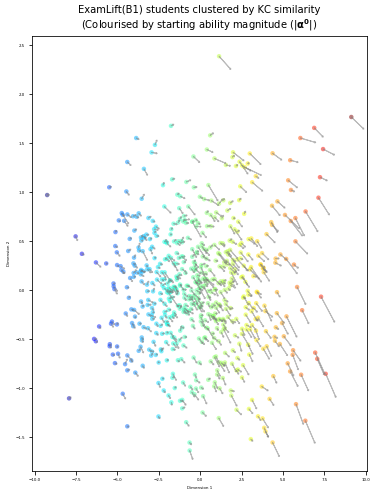

with PCA
rs txd shape (610, 2)
student mag extrema: 64.13766 72.7219 72.76528 82.19544
<class 'module'>
<class 'NoneType'>
3 698


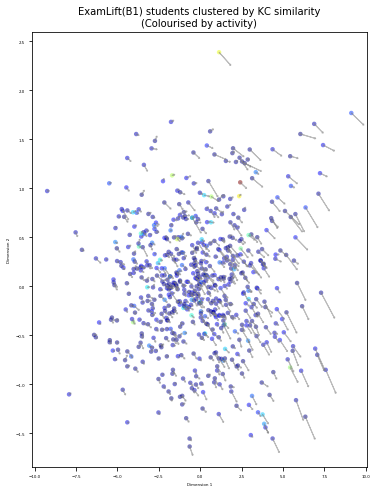

In [239]:
import matplotlib
legend_marker_map = {
  'writing~error_correction': 'ec', 
  'writing~spelling': 'sp', 

  'reading~phrasal_verbs': 'pv', 
  'reading~speed_reading': 'sr', 
  'reading~match_the_text': 'tx',

  'speaking~dialogue': 'di', 
  'speaking~topic_association': 'ta', 

  'listening~minimal_pairs': 'mp', 
  'listening~topic_match': 'tm', 
 }

SMALL_SIZE = 4
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# print(mapping)
# mapping.index = mapping["qn_id"]
orig_mapping = mapping
# mapping = isaac_meta_data_df


    
#     hashlib.md5(skst)

from sklearn.preprocessing import minmax_scale, scale
from scipy.spatial.distance import squareform,pdist                                                              
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA, FactorAnalysis
from mpl_toolkits.mplot3d import Axes3D


# az = _retrieve_peda_params(this_m, "alphas")
# az = numpy.median(az, axis=0)

three_d = False


avg_loading = numpy.mean(this_m.get_layer("qk_loadings").get_weights()[0], axis=0)
gammas = this_m.get_layer("gammas").get_weights()[0]


# for wgt_set_name, zero_it in [("qn_embedding",True), ("qk_loadings",False), ("alphas",True), ("gammas",True)]:
for wgt_set_name, zero_it in [("alphas",True)]: #, ("qk_loadings",True) ]:
        
    rs = copy.copy(this_m.get_layer(wgt_set_name).get_weights()[0])#[0:1000]
    rs = rs[valid_sixs, :]
    print("rs shape", rs.shape)

#     arras = numpy.multiply(rs, avg_loading)
    arraheads = (gammas[valid_sixs, :] * avg_loading) + rs

    combo = numpy.concatenate([rs, arraheads])
    
    nc=2    
    tx = PCA(n_components=nc, random_state=666)#, whiten=True)
    
#     tx2a = PCA(n_components= rs.shape[1], random_state=666)
#     tx2 = TSNE(n_components=nc, random_state=666)

    
    print("new rs shape", rs.shape)
#     curric_pos = [int(ix)/rs.shape[0] for ix in range(len(rs))]
    strikes = [student_accumulator[ix] for ix in valid_sixs ]
    norms = [numpy.linalg.norm(x) for x  in rs ]
#     lens = [ numpy.prod(logistic(x - avg_q, 1,0)) for x in rs ]
#     print(lens[0:10])

#     for norm in norms:
#         print(norm)
#     raise Exception("phawmg")

#     for col_mode in ["diff","type","curr","count"]:
    for col_mode in ["diff", "count"]:   
#     print("with TSNE")
#         rs_txd = tx2.fit_transform(tx2a.fit_transform(rs))

        print("with PCA")
        tx = tx.fit(combo)
        rs_txd = tx.transform(rs) 
        arras_txd = tx.transform(arraheads)

        print("rs txd shape", rs_txd.shape)
#         raise Exception("shog")
            
        rgba_colours = numpy.zeros((len(rs_txd),4))
        if col_mode == "diff":
            cmap = plt.cm.get_cmap('jet')
#             len_colours = cmap(minmax_scale(norms))
#             len_colours = cmap(numpy.abs(2*(minmax_scale(norms) - 0.5)))
#             len_colours = cmap([1.0 if (l>0.45 and l<0.65) else 0.0 for l in lens])
#             bins = numpy.linspace(0, 1, 10)
#             bin_means = (numpy.histogram(lens, bins, weights=lens)[0] /
#                  numpy.histogram(lens, bins)[0])
#             q = numpy.max(norms)-numpy.min(norms)/5.0
#             x = np.linspace(0, 10, 1000)
#             qlens = q * numpy.round(numpy.array(norms)/q)
#             rgba_colours = cmap(minmax_scale(norms))
            rgba_colours = cmap(minmax_scale(norms))

        elif col_mode == "count":
            cmap = plt.cm.get_cmap('jet')
#             plt.hist(strikes)
#             plt.show()
            rgba_colours = cmap( minmax_scale(strikes) )
        else:
            raise Exception("Unknown colour mode (should be diff, type or curr), was", col_mode)
        
        plt.figure(figsize=(6,8))
        fig = plt.gcf()
        ax = fig.add_subplot(111)

        scat = ax.scatter(rs_txd[:,0], rs_txd[:,1], 
                   c = rgba_colours,
                   edgecolors="none",
                   alpha=0.5,
                   s=20,
                   )

        if True:
            xs = rs_txd[:,0]
            ys = rs_txd[:,1]
            xs_end = arras_txd[:,0]
            ys_end = arras_txd[:,1]

            opt = dict(color="gray",
                ls="solid",
                width=.1,
                headwidth=1.5,
                headlength=1,
                alpha=0.5,
                connectionstyle = 'arc3,rad=0')
            for x,y,endx,endy in zip(xs,ys,xs_end,ys_end):
#                 print(x,y,"->",endx,endy)
                ax.annotate('', xycoords='data', xy=(endx,endy), xytext=(x,y), arrowprops=opt)
        
        print("student mag extrema:", numpy.min(norms), numpy.median(norms), numpy.mean(norms), numpy.max(norms))

        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        print(type(plt))
        lgnd = plt.legend(handlelength=0, handletextpad=0, fontsize=6)
        print(type(lgnd))

        tit = "ExamLift(B1) students clustered by KC similarity"
        if col_mode=="diff":
            tit += "\n(Colourised by starting ability magnitude ($|\\mathbf{\\alpha^0}|$)"
        elif col_mode=="count":
            print(numpy.min(curric_pos_cnts), numpy.max(curric_pos_cnts))
#                     norm = matplotlib.colors.Normalize(vmin=numpy.min(curric_pos_cnts), vmax=numpy.max(curric_pos_cnts))
#                     fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
#                          cax=ax, orientation='horizontal', label='Some Units')
#                     pcm = ax.get_children()[0]
#                     fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), pcm, ax=ax)
#                     plt.colorbar()
            tit += "\n(Colourised by activity)"
        plt.title(tit)
        figfname = home+"/images/"+dataset_name+"_student_"+wgt_set_name+"_clusters_"+col_mode+".pdf"
        plt.savefig(figfname, format="pdf", bbox_inches='tight')
#                 ax_lookup[figfname] = ax
#         plt.scatter(zz[:,0], zz[:,1], color="red")
        plt.show()

rs shape (997, 64)
new rs shape (997, 64)
with PCA
rs txd shape (997, 2)
student mag extrema: 15.306406 35.16051 34.67272 52.35362
<class 'module'>
<class 'NoneType'>


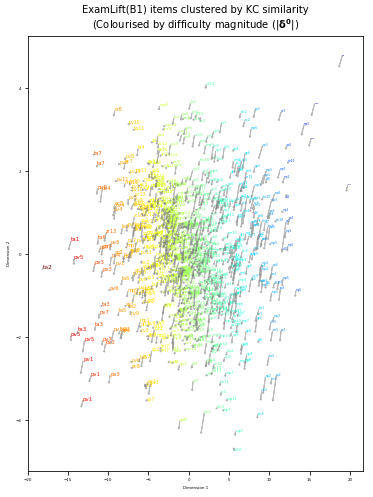

with PCA
rs txd shape (997, 2)
student mag extrema: 15.306406 35.16051 34.67272 52.35362
<class 'module'>
<class 'NoneType'>


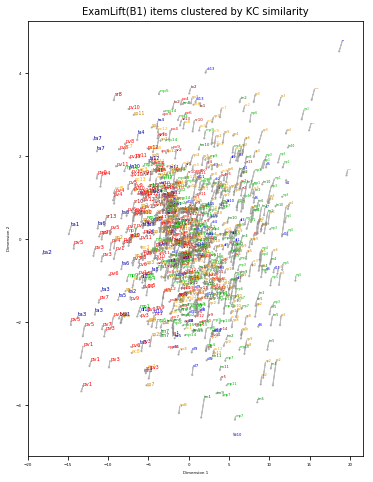

In [217]:
import matplotlib
legend_marker_map = {
  'writing~error_correction': 'ec', 
  'writing~spelling': 'sp', 

  'reading~phrasal_verbs': 'pv', 
  'reading~speed_reading': 'sr', 
  'reading~match_the_text': 'tx',

  'speaking~dialogue': 'di', 
  'speaking~topic_association': 'ta', 

  'listening~minimal_pairs': 'mp', 
  'listening~topic_match': 'tm', 
 }

SMALL_SIZE = 4
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# print(mapping)
# mapping.index = mapping["qn_id"]
orig_mapping = mapping
# mapping = isaac_meta_data_df


    
#     hashlib.md5(skst)

from sklearn.preprocessing import minmax_scale, scale
from scipy.spatial.distance import squareform,pdist                                                              
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA, FactorAnalysis
from mpl_toolkits.mplot3d import Axes3D


# az = _retrieve_peda_params(this_m, "alphas")
# az = numpy.median(az, axis=0)

three_d = False


avg_gammas = numpy.mean(this_m.get_layer("gammas").get_weights()[0], axis=0)
qk_loadings = this_m.get_layer("qk_loadings").get_weights()[0]


# for wgt_set_name, zero_it in [("qn_embedding",True), ("qk_loadings",False), ("alphas",True), ("gammas",True)]:
for wgt_set_name, zero_it in [("qn_embedding",True)]: #, ("qk_loadings",True) ]:
        
    rs = copy.copy(this_m.get_layer(wgt_set_name).get_weights()[0])#[0:1000]
    rs = rs[valid_ixs, :]
    print("rs shape", rs.shape)

#     arras = numpy.multiply(rs, avg_loading)
    arraheads = (qk_loadings[valid_ixs, :] * avg_gammas) + rs

    combo = numpy.concatenate([rs, arraheads])
    
    nc=2    
    tx = PCA(n_components=nc, random_state=666)#, whiten=True)
    
#     tx2a = PCA(n_components= rs.shape[1], random_state=666)
#     tx2 = TSNE(n_components=nc, random_state=666)

    
    print("new rs shape", rs.shape)
    strikes = [student_accumulator[ix] for ix in valid_ixs ]
    norms = [numpy.linalg.norm(x) for x  in rs ]

    for col_mode in ["diff", "type"]:   

        print("with PCA")
        tx = tx.fit(combo)
        rs_txd = tx.transform(rs) 
        arras_txd = tx.transform(arraheads)

        print("rs txd shape", rs_txd.shape)

        rgba_colours = numpy.zeros((len(rs_txd),4))
        if col_mode == "diff":
            cmap = plt.cm.get_cmap('jet')
            rgba_colours = cmap(minmax_scale(norms))
        elif col_mode == "type":
            qids = [qix_qid_lookup[ix] for ix in valid_ixs]
            stuff = [(mapping["activity_skill"].loc[qid] if qid in mapping["activity_skill"] else "?") 
                     for qid in qids]
            cols = [(low_col_map2[s] if s in low_col_map2 else "blue") for s in stuff]

            rgba_colours = typ_colours
#         elif col_mode == "count":
#             cmap = plt.cm.get_cmap('jet')
# #             plt.hist(strikes)
# #             plt.show()
#             rgba_colours = cmap( minmax_scale(strikes) )
        else:
            raise Exception("Unknown colour mode (should be diff, type or curr), was", col_mode)
        
        plt.figure(figsize=(6,8))
        fig = plt.gcf()
        ax = fig.add_subplot(111)

        scat = ax.scatter(rs_txd[:,0], rs_txd[:,1], 
                   c = rgba_colours,
                   edgecolors="none",
                   alpha=0.0,
                   s=50,
                   )
        
        sc_list = minmax_scale(norms)
        for ix,orig_ix in enumerate(valid_ixs):
            x = rs_txd[ix,0]
            y = rs_txd[ix,1]
            lab = labels[ix]
            k = rgba_colours[ix]
            sc = sc_list[ix] # lens[ix]
            lab = lab.split(".")[0]
            ax.text(x,y,lab, fontsize= 2+(4*sc), color=k)
            

        if True:
            xs = rs_txd[:,0]
            ys = rs_txd[:,1]
            xs_end = arras_txd[:,0]
            ys_end = arras_txd[:,1]

            opt = dict(color="gray",
                ls="solid",
                width=.1,
                headwidth=1.5,
                headlength=1,
                alpha=0.5,
                connectionstyle = 'arc3,rad=0')
            for x,y,endx,endy in zip(xs,ys,xs_end,ys_end):
#                 print(x,y,"->",endx,endy)
                ax.annotate('', xycoords='data', xy=(endx,endy), xytext=(x,y), arrowprops=opt)
        
        print("student mag extrema:", numpy.min(norms), numpy.median(norms), numpy.mean(norms), numpy.max(norms))

        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        print(type(plt))
        lgnd = plt.legend(handlelength=0, handletextpad=0, fontsize=6)
        print(type(lgnd))

        tit = "ExamLift(B1) items clustered by KC similarity"
        if col_mode=="diff":
            tit += "\n(Colourised by difficulty magnitude ($|\\mathbf{\\delta^0}|$)"
#         elif col_mode=="count":
#             print(numpy.min(curric_pos_cnts), numpy.max(curric_pos_cnts))
#                     norm = matplotlib.colors.Normalize(vmin=numpy.min(curric_pos_cnts), vmax=numpy.max(curric_pos_cnts))
#                     fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
#                          cax=ax, orientation='horizontal', label='Some Units')
#                     pcm = ax.get_children()[0]
#                     fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), pcm, ax=ax)
#                     plt.colorbar()
#             tit += "\n(Colourised by activity)"
        plt.title(tit)
        figfname = home+"/images/"+dataset_name+"_item_"+wgt_set_name+"_wLEs_"+col_mode+".pdf"
        plt.savefig(figfname, format="pdf", bbox_inches='tight')
#                 ax_lookup[figfname] = ax
#         plt.scatter(zz[:,0], zz[:,1], color="red")
        plt.show()

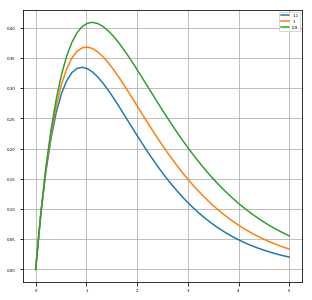

In [116]:
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
ts = numpy.linspace(0,5,50)
L = 1
v0 = 1

plt.figure(figsize=(5,5))
for L in [1.1, 1, 0.9]:
    f = lambda t: v0 * t * numpy.exp(-L*t)
    ys = [f(t) for t in ts]
    plt.plot(ts, ys, label=L)
plt.legend()
plt.grid()
plt.show()

In [34]:
import seaborn as sns
# data_reduced= pd.read_csv('fake.txt',sep='\s+')
# sns.regplot(data_reduced['2005'],data_reduced['2015'])

indices = numpy.argsort(curric_pos)
plt.hist(curric_pos_cnts)
plt.show()

xs = numpy.array(curric_pos)[indices]
ys = numpy.array(lens)[indices]
ys2 = numpy.array(norms)[indices]
ys3_pos = numpy.array(curric_pos_cnts)[indices]
ys4_pas = numpy.array(curric_pass_cnts)[indices]

x_to_plot = []
y_to_plot = []
y4_to_plot = []
cols_to_plot = []

# for q,x,y, ic,pc in zip(qids, xs,ys, ys3_pos, ys4_pas):
# #     x = int(1000*x)
# #     y = y
# #     if True:
#     if ic>1 and pc>0 and pc<ic:
#         x_to_plot.append(x)
#         y_to_plot.append(y)
#         y4_to_plot.append(ic)
#         cols_to_plot.append("teal")
#     else:
#         cols_to_plot.append("magenta")
# #         ax.text(x,y,lab, fontsize= 2+(4*sc), color=k)
# #         print(q,x,y,pass_cnt)

x_to_plot = xs
y_to_plot = ys
# for v,ic,pc in zip(valid_flags, ys3_pos, ys4_pas):
#     c = cmap(ic)
# #     print(ic,pc)
# #     if ic<2:
# #         c="gray"
# #     elif ic>1 and pc==0:
# #         c="red"
# #     elif ic>1 and pc==ic:
# #         print("TOO EASY")
# #         c="#00ff00"
# #     else:
# #         c="teal"
#     cols_to_plot.append(c)
    
for ix in indices:
    ic = curric_pos_cnts[ix]
    c = cmap(ic)
    cols_to_plot.append(c)
    
    

y4_to_plot = ys3_pos

print(len(x_to_plot))
print("\n\n")
print(len(y_to_plot))

plt.figure(figsize=(10,10))
# plt.scatter(xs, ys3, alpha=0.5)
# plt.scatter(xs, ys, label="S.Diff", alpha=0.5)
# plt.scatter(xs, ys2, label="V.Magnitude", alpha=0.5)
# sns.regplot(x_to_plot, y_to_plot, lowess=True)

print(x_to_plot[0:20])
print(y_to_plot[0:20])
# sns.regplot(numpy.array(x_to_plot), numpy.array(y_to_plot), lowess=True)
plt.scatter(x_to_plot, y_to_plot, alpha=1, c=cols_to_plot)
plt.legend()
# plt.ylim(-0.1,1)
plt.xlabel("Position in curriculum")
plt.ylabel("Estimated Difficulty (Vec.Mag.)")
# print(curric_pos)
# print(ys)
figfname = home+"/images/temp.pdf"
plt.savefig(figfname, format="pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,10))
# sns.regplot(numpy.array(x_to_plot), numpy.array(y4_to_plot), lowess=True)
plt.scatter(x_to_plot, y4_to_plot, alpha=1, c=cols_to_plot)
figfname = home+"/images/zipfy.pdf"
plt.savefig(figfname, format="pdf", bbox_inches='tight')
plt.show()

NameError: name 'curric_pos' is not defined

In [115]:
from scipy.stats import pearsonr
print(spearmanr(lens, norms))
print(pearsonr(lens,norms))

# for cp in curric_pos:
#     print(cp)

print(pearsonr(curric_pos, lens))

# for ix,nm in enumerate(numpy.argsort(norms)):
#     print(ix, nm)

SpearmanrResult(correlation=0.9886654307252228, pvalue=0.0)
(0.9772885245736223, 0.0)
(0.21035007594073146, 8.311432179383483e-13)


{'./images/examliftb1_item_qn_embedding_clusters_curr.pdf': <matplotlib.axes._subplots.AxesSubplot object at 0x7fc45c3152e8>, './images/examliftb1_item_qk_loadings_clusters_curr.pdf': <matplotlib.axes._subplots.AxesSubplot object at 0x7fc4bc377f98>}


ValueError: The Subplot must have been created in the present figure

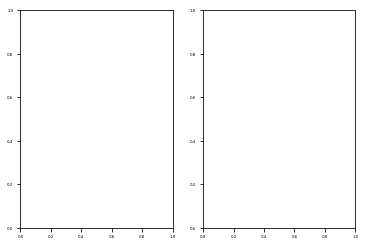

In [47]:
print(ax_lookup)

# fig = plt.gcf()
fig, axes = plt.subplots(1,len(ax_lookup))
# ax1.set_facecolor("#dddddd")
# ax2.set_facecolor("#ff0077")
for ax, axl in zip(axes, ax_lookup):
    the_ax = ax_lookup[axl]
    fig.add_subplot(the_ax)



(1134, 64)
(1134, 64)


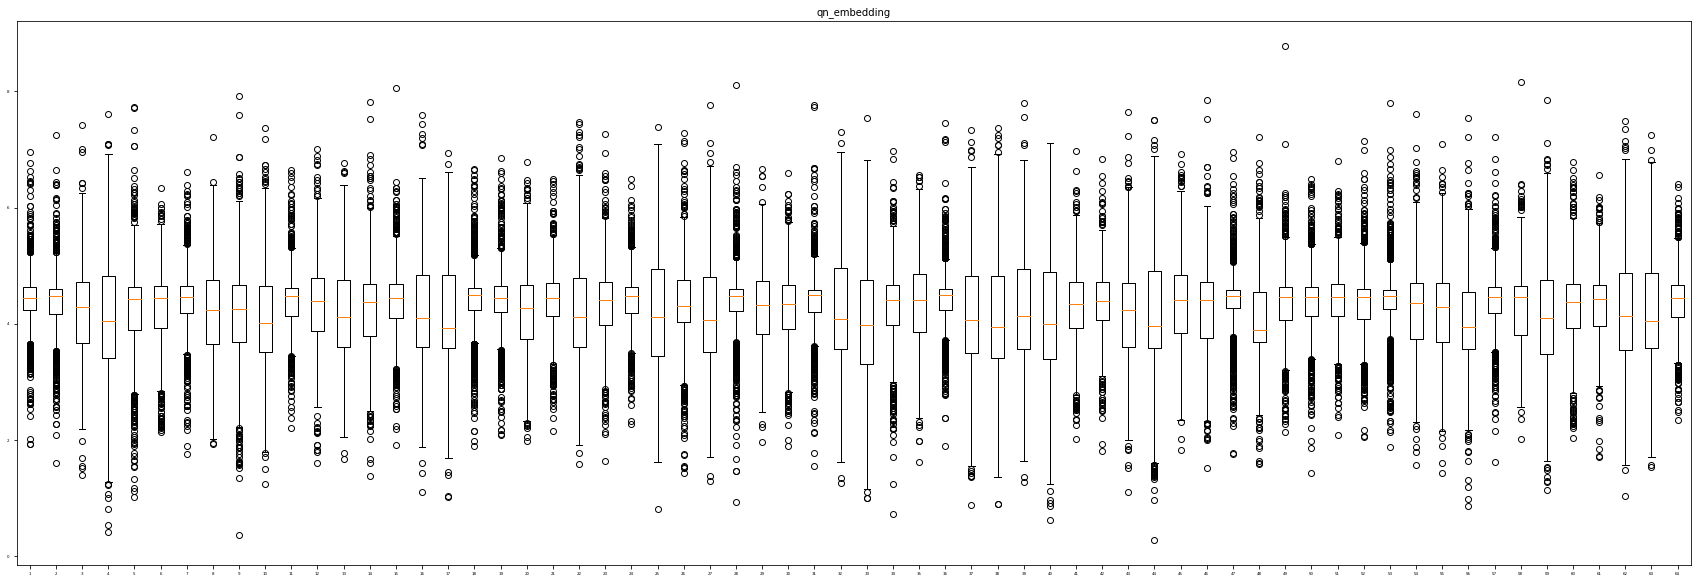

(1134, 64)
(1134, 64)


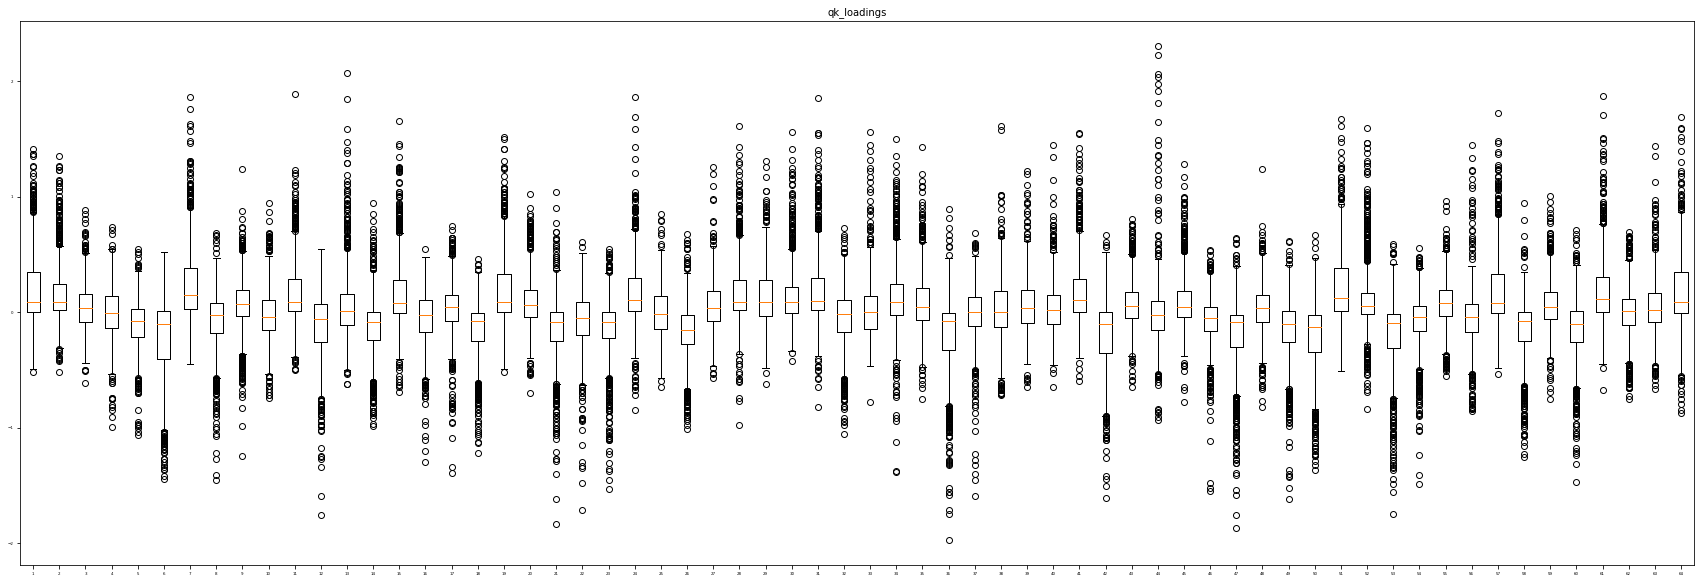

(1234, 64)
(1234, 64)


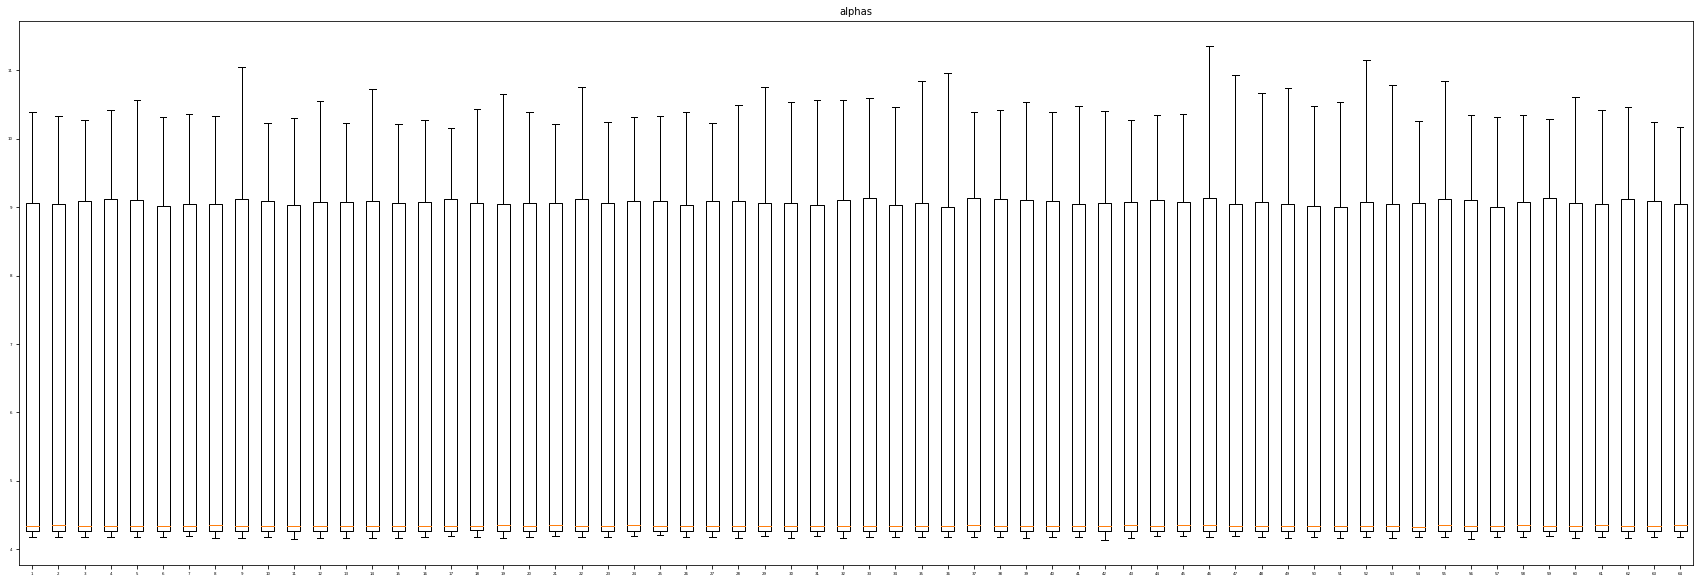

(1234, 64)
(1234, 64)


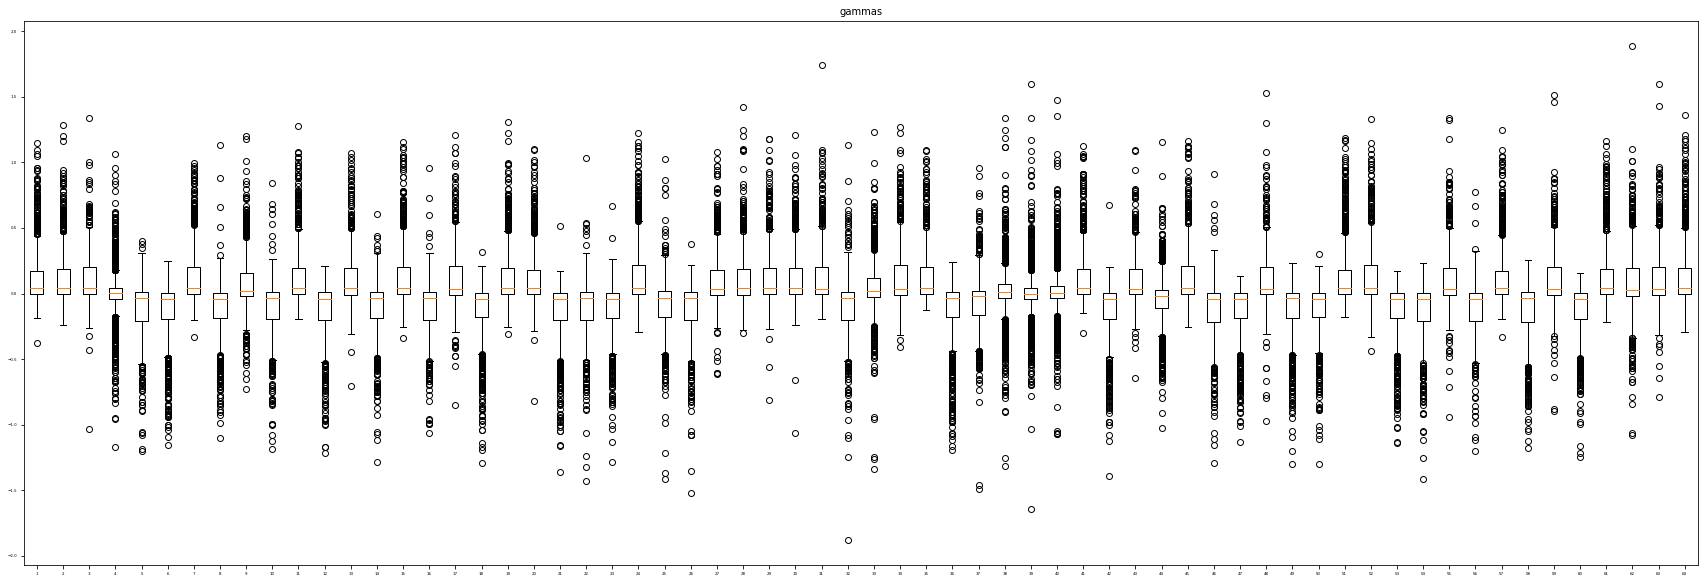

In [52]:
for wgt_set_name, zero_it in [("qn_embedding",False), ("qk_loadings",False), ("alphas",False), ("gammas",False)]:
#     rs = _retrieve_peda_params(this_m, wgt_set_name)
    rs = this_m.get_layer(wgt_set_name).get_weights()[0]

#     rs = numpy.transpose(rs)
    
    print(rs.shape)
#     rs_pos = logistic(az - rs, b=1, off=0)
    if zero_it:
        rs_pos = rs - numpy.min(rs,axis=0)
    else:
        rs_pos = rs
    print(rs_pos.shape)

    plt.figure(figsize=(30,10))
    plt.title(wgt_set_name)
    plt.boxplot(rs_pos)
    plt.show()

In [394]:
# for wgt_set_name in ["qn_embedding", "qk_loadings", "alphas", "gammas"]:

for wgt_set_name in ["qk_loadings"]: #, "qk_loadings", "alphas", "gammas"]:
    rs = _retrieve_peda_params(this_m, wgt_set_name)
#     rs = rs - numpy.min(rs, axis=0)
#     rs_norms = numpy.linalg.norm(rs, axis=1) 
    rs_norms = numpy.median(rs, axis=1)
    print(rs_norms.shape)
    reindexed = numpy.argsort(rs_norms)[::-1]
    for ix in reindexed:
        print(ix, "\t", numpy.round(rs_norms[ix],3))
#         if rs_norms[ix]<1:
#             print(numpy.round(rs[ix,:],2))
#         print(ix, qix_qid_lookup[ix], "\t", numpy.round(rs_norms[ix],1))
    plt.hist(rs_norms)
    

NameError: name '_retrieve_peda_params' is not defined

getting main layer gammas
main layer shape (1234, 64)


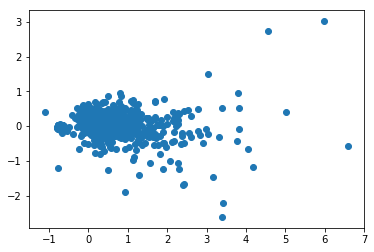

In [427]:
rs = _retrieve_peda_params(this_m, "gammas")
rs = rs - numpy.min(rs)
tx = PCA(n_components=2)
rs_txd = tx.fit_transform(rs)
plt.scatter(rs_txd[:,0], rs_txd[:,1])
plt.show()

In [105]:
print(model_lookup)

{'MLTMz8//(xe/px)': ['./models/MLTMz8~~(xe~px)_0', './models/MLTMz8~~(xe~px)_1', './models/MLTMz8~~(xe~px)_2', './models/MLTMz8~~(xe~px)_3', './models/MLTMz8~~(xe~px)_4', './models/MLTMz8~~(xe~px)_5', './models/MLTMz8~~(xe~px)_6', './models/MLTMz8~~(xe~px)_7', './models/MLTMz8~~(xe~px)_8', './models/MLTMz8~~(xe~px)_9', './models/MLTMz8~~(xe~px)_10', './models/MLTMz8~~(xe~px)_11', './models/MLTMz8~~(xe~px)_12', './models/MLTMz8~~(xe~px)_13', './models/MLTMz8~~(xe~px)_14', './models/MLTMz8~~(xe~px)_15', './models/MLTMz8~~(xe~px)_16', './models/MLTMz8~~(xe~px)_17', './models/MLTMz8~~(xe~px)_18', './models/MLTMz8~~(xe~px)_19'], 'MLTMz16//(xe/px)': ['./models/MLTMz16~~(xe~px)_0', './models/MLTMz16~~(xe~px)_1', './models/MLTMz16~~(xe~px)_2', './models/MLTMz16~~(xe~px)_3', './models/MLTMz16~~(xe~px)_4', './models/MLTMz16~~(xe~px)_5', './models/MLTMz16~~(xe~px)_6', './models/MLTMz16~~(xe~px)_7', './models/MLTMz16~~(xe~px)_8', './models/MLTMz16~~(xe~px)_9', './models/MLTMz16~~(xe~px)_10', './mo

In [106]:
unique_tr_set_qixs = numpy.unique(o_qixs)
unique_tr_set_sixs = numpy.unique(o_sixs)

# psychomode = config_dict["cog_model"]
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sig = lambda z: (1 / (1+numpy.exp(-z)))

all_sixs = set()
all_sixs.update(list(o_sixs))
all_sixs.update(list(v_sixs))
all_sixs.update(list(t_sixs))
all_sixs=list(all_sixs)

print(model_lookup)

# this_handle = "MPFM256//(xe/px)"
# this_handle = "MLTM64z//(xe/px)"
this_handle = "MLP64z//(xe/px)"
# this_handle = "MLTMa400//(xe/f1)"
m_list = model_lookup[this_handle]
print(m_list)

this_m = None
best_metric = 0
print("Running models from m_list")
for fnm_ in m_list:
    try:
        m_ = keras.models.load_model(fnm_, custom_objects={'WeightClip': WeightClip, 'custom_avl2': custom_avl2}, compile=False)
    except:
        continue
    if len(m_.inputs)==4:
        t_pass = t_hits[:,0]
        t_fail = t_hits[:,1]
        p_probs = m_.predict( [t_qixs, t_sixs, t_pass, t_fail] )
    else:
        
        p_probs = m_.predict( [t_qixs, t_sixs, t_hits] )
    p_hats = numpy.round( p_probs )
    t_f1 = f1_score(t_out, p_hats, average="macro")
    if t_f1 > best_metric:
        print("new best", this_handle,"f1=",t_f1)
        best_metric = t_f1
        this_m = m_

plot_arrows = False

dim_red = PCA(n_components=2, random_state=666)
# txd = dim_red.fit_transform(numpy.concatenate([combo_weights,arrowheads]))

for cluster_handle, cluster_m in [(this_handle, this_m), ]:
    this_m.summary()
    deltas = cluster_m.get_layer("qn_embedding").get_weights()[0][unique_tr_set_qixs]
    alphas = cluster_m.get_layer("alphas").get_weights()[0][unique_tr_set_sixs]
    print(alphas.shape)
    origin = numpy.zeros(shape=(1, alphas.shape[1]))
#     max_val = numpy.max(numpy.concatenate([deltas,alphas]), axis=0)
#     max_val = numpy.max(numpy.concatenate([deltas,alphas]))

    pointy = numpy.ones(shape=(1, alphas.shape[1])) * 7

    deltas = dim_red.fit_transform(deltas)
    alphas = dim_red.transform(alphas)
    origin = dim_red.transform(origin)
    pointy = dim_red.transform(pointy)
    min_val = numpy.min(numpy.concatenate([deltas,alphas]), axis=0)
    deltas -= min_val
    alphas -= min_val
    for scatter_group, scat_lab in [(deltas, "d"), (alphas,"a0")]:
        plt.scatter(scatter_group[:,0], scatter_group[:,1], label=scat_lab, alpha=0.3)
    plt.scatter(origin[0,0], origin[0,1])
    plt.scatter(pointy[0,0], pointy[0,1])
    plt.legend()
    plt.show()

{'MLTMz8//(xe/px)': ['./models/MLTMz8~~(xe~px)_0', './models/MLTMz8~~(xe~px)_1', './models/MLTMz8~~(xe~px)_2', './models/MLTMz8~~(xe~px)_3', './models/MLTMz8~~(xe~px)_4', './models/MLTMz8~~(xe~px)_5', './models/MLTMz8~~(xe~px)_6', './models/MLTMz8~~(xe~px)_7', './models/MLTMz8~~(xe~px)_8', './models/MLTMz8~~(xe~px)_9', './models/MLTMz8~~(xe~px)_10', './models/MLTMz8~~(xe~px)_11', './models/MLTMz8~~(xe~px)_12', './models/MLTMz8~~(xe~px)_13', './models/MLTMz8~~(xe~px)_14', './models/MLTMz8~~(xe~px)_15', './models/MLTMz8~~(xe~px)_16', './models/MLTMz8~~(xe~px)_17', './models/MLTMz8~~(xe~px)_18', './models/MLTMz8~~(xe~px)_19'], 'MLTMz16//(xe/px)': ['./models/MLTMz16~~(xe~px)_0', './models/MLTMz16~~(xe~px)_1', './models/MLTMz16~~(xe~px)_2', './models/MLTMz16~~(xe~px)_3', './models/MLTMz16~~(xe~px)_4', './models/MLTMz16~~(xe~px)_5', './models/MLTMz16~~(xe~px)_6', './models/MLTMz16~~(xe~px)_7', './models/MLTMz16~~(xe~px)_8', './models/MLTMz16~~(xe~px)_9', './models/MLTMz16~~(xe~px)_10', './mo

KeyError: 'MLP64z//(xe/px)'

In [40]:
from sklearn.manifold import MDS
def plot_practice(ws, prac_vecs, sprinkles=None, plot_arrows=True, plot_qgroups=False, entity_type="item", graph_title="Embedding Space plot."):
    arrowheads = ws+prac_vecs
    
#     if sprinkles == "indices":
#         pass
#     elif sprinkles:
#         (oixs,vixs,tixs),(on,vn,tn) = sprinkles
#         oixs = numpy.unique(oixs)
#         vixs = numpy.unique(vixs)
#         tixs = numpy.unique(tixs)
# #         max_ix = len(ws)-1
#         all_poss_ixs = range(len(ws))
#         all_ixs = set()
#         all_ixs.update(list(oixs))
#         all_ixs.update(list(vixs))
#         all_ixs.update(list(tixs))
#         

#     (oixs,vixs,tixs),(on,vn,tn) = sprinkles
#     oixs = numpy.unique(oixs)
#     vixs = numpy.unique(vixs)
#     tixs = numpy.unique(tixs)
# #         max_ix = len(ws)-1
#     all_poss_ixs = range(len(ws))
#     all_ixs = set()
#     all_ixs.update(list(oixs))
#     all_ixs.update(list(vixs))
#     all_ixs.update(list(tixs))
#     print(len(all_poss_ixs) - len(all_ixs), "missing ixs")

#         oixs = numpy.random.choice(oixs, on, False)
#         vixs = numpy.random.choice(vixs, vn, False)
#         tixs = numpy.random.choice(tixs, tn, False)
    
#     ws = ws[list(all_ixs), :]
#     arrowheads = arrowheads[list(all_ixs), :]
    
    origin = numpy.min([ws, arrowheads]) 
    ws_0 = ws - origin
    ar_0 = arrowheads - origin

    print("zeroed shapes")
    print(ws_0.shape)
    print(ar_0.shape)
    
    if plot_arrows:
        dimr = PCA(n_components=2)
        txd = dimr.fit_transform(numpy.concatenate([ws_0, ar_0]).astype(numpy.float64))
#     dimr = MDS(n_components=2, dissimilarity="euclidean", metric=True)
    else:
        pc = PCA(n_components=numpy.min([10, ws.shape[1]]) )
        pcad = pc.fit_transform(numpy.concatenate([ws_0, ar_0])).astype(numpy.float64)
        print("pcad")
#         pcad = numpy.concatenate([ws_0, ar_0]).astype(numpy.float64)
        dimr = TSNE(n_components=2, random_state=666, early_exaggeration=12)
#         dimr = MDS(n_components=2, dissimilarity="euclidean", metric=True, n_jobs=-1)
        txd = dimr.fit_transform(pcad)

    practice_txd = txd[len(ws):]
    txd = txd[0:len(ws)]
        
    print("TXD and Prac TXD shape")
    print(txd.shape, practice_txd.shape)
        
#     cmap = plt.cm.Pastel1

    unique_tr_set_ixs = numpy.unique(o_qixs)#[0:100] #TODO move to method sig

    scatter_groups = None
    if plot_qgroups:
        scatter_groups = defaultdict(list)
        hi_level_groups = defaultdict(list)
        low_to_hi = defaultdict(list)
        for qix in unique_tr_set_ixs: # range(len(qs)):
            qn_id = qix_qid_lookup[qix]
            c = qn_id.split("~")[0][0:-2]
            c = c.lower().strip()
            c = "minimal pairs" if c=="miminal pairs" else c
            hilev = str(mapping.loc[qn_id].activity_skill).split("~")[0]
    #         print(c, hilev)
            scatter_groups[c].append(qix)
            hi_level_groups[hilev].append(qix)
            low_to_hi[c]=hilev

        print(low_to_hi)

#         plt.figure(figsize=(30,30))
        plt.figure(figsize=(8,11))

        colours = plt.cm.tab10([i for i in range(len(scatter_groups))]) #(numpy.linspace(0, 1, len(scatter_groups)))
        for g,_,shp_key in zip(low_col_map.keys(), colours, low_shape_map.keys()):
            print(g)
            col = low_col_map[g]
            shp = low_shape_map[shp_key]
            q_indices = scatter_groups[g]
    #         plt.scatter(x=xs, y=ys, label=h, color=col, alpha=0.5)
#             q_indices = [q for q in q_indices if q in all_ixs]
            xs = txd[q_indices,0]
            ys = txd[q_indices,1]
            plt.scatter(x=xs, y=ys, label=g, color=col, marker=shp, alpha=0.5)
        
#             if plot_arrows:
            if True:
                xs_end = practice_txd[q_indices,0]
                ys_end = practice_txd[q_indices,1]

                opt = dict(color="gray", #col, 
                    width=1,
                    headwidth=1,
                    headlength=1,
                    alpha=0.5,
                    connectionstyle = 'arc3,rad=0')
                for ix, x,y,endx,endy in zip(q_indices, xs,ys,xs_end,ys_end):
#                     print("arrow", endx,endy)
        #             plt.arrow(x,y,dx,dy, ec=col, fc=col, shape='full', head_width=0.25, head_length=0.5)
                    if plot_arrows:
                        plt.annotate('', xycoords='data', xy=(endx,endy), xytext=(x,y), arrowprops=opt)
                    else:
                        lab = qix_qid_lookup[ix]
                        npart = lab.split()[-1]
                        lab = lab[0:-(1+len(npart))]
                        npart = npart[0:-2]
                        lab = lab.replace("Mimin","Minim")
                        code = low_short_map[lab.lower()]
                        lab = code + npart.replace("~",".")
                        plt.text(x,y,lab, fontsize='xx-small', alpha=0.5)
            #     cat_num+=1
#         if sprinkles=="indices":
#             for ix in len(ws):
#                 x = txd[ix,0]
#                 y = txd[ix,1]
#                 plt.annotate(set_ch, xycoords='data', xy=(x,y), xytext=(x,y), arrowprops=None)
#         elif sprinkles:
#             for ixs,set_ch in zip((oixs,vixs,tixs),("o","v","t")):
#                 for ix in ixs:
#                     x = txd[ix,0]
#                     y = txd[ix,1]
                    #plt.annotate(set_ch, xycoords='data', xy=(x,y), xytext=(x,y), arrowprops=None)
        
        plt.legend()
        # cluster_handle="MLP/32/bal(xe/xe)"
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")
        plt.title(graph_title.format(cluster_handle))
        plt.savefig(home+"/images/"+dataset_name+"_{}_practice_vecs_by_type.pdf".format(entity_type), format="pdf")
        plt.show()

#     plt.figure(figsize=(10,10))
#     colours = plt.cm.jet([i for i in range(len(hi_level_groups))])
#     for h,col in zip(hi_level_groups, colours):
#         col = col_map[h]
#         q_indices = hi_level_groups[h]
#         xs = txd[q_indices,0]
#         ys = txd[q_indices,1]
#         xs_end = practice_txd[q_indices,0]
#         ys_end = practice_txd[q_indices,1]
#         plt.scatter(x=xs, y=ys, label=h, color=col, alpha=0.5)
#         for x,y,dx,dy in zip(xs,ys,xs_end,ys_end):
#             plt.arrow(x,y,dx,dy, ec=col)
#     plt.legend()
#     plt.title("ExamLift(B1) Qn clusters ({}).  Coloured by skill genus.".format(cluster_handle))
#     plt.show()

    # hardz = [20*numpy.mean(numpy.abs(q)) for q in qs]
    # labels = [lookup[qid] for qid in qidz]

    # import matplotlib
    # plt.scatter(x=txd[:,0], y=txd[:,1], c=catz, cmap=cmap, alpha=.5)

    cmap = plt.cm.jet
    plt.figure(figsize=(10,10))
#     print(numpy.min(ws))
#     f2 = qs - numpy.min(ws)
#     pl_normed = practice_loadings - numpy.min(practice_loadings)
#     print(numpy.min(f2))
    
    minmax_list=[]
    
    if plot_qgroups:
        plot_groups = scatter_groups
    else:
        plot_groups = [0]
        
    for sg in plot_groups:
        print("scatter group", sg)
        if plot_qgroups:
            toplot_indices = scatter_groups[sg]
        else:
            toplot_indices = range(len(ws))
#         toplot_indices = [j for j in toplot_indices if j in all_ixs]
        hardz = [numpy.sqrt(numpy.sum(numpy.square(numpy.clip(ws_0[ix,:],0,math.inf)))) for ix in toplot_indices]
        minmax_list.extend([numpy.min(hardz), numpy.max(hardz)])
        print("len hards heads")
        print("prac vec shape", prac_vecs.shape)
        headz = [numpy.sqrt(numpy.sum(numpy.square(numpy.clip(prac_vecs[qix,:],0,math.inf)))) for qix in toplot_indices]

        minmax_list.extend([numpy.min(headz), numpy.max(headz)])
#         hardz = [numpy.median(f2[qix,:]) for qix in q_indices]
#         plt.scatter(x=txd[q_indices,0], y=txd[q_indices,1], c=hardz, cmap=cmap, alpha=0.5)
        plt.scatter(x=txd[toplot_indices,0], y=txd[toplot_indices,1], c=hardz, cmap=cmap, alpha=0.5)
    
        if plot_arrows:
#         if True:
            opt = dict(color=None, 
    #             arrowstyle = 'simple,head_width=5,head_length=7.5',
    #             arrowstyle = '->',
    #             arrowstyle='simple',
                width=1,
                headwidth=1,
                headlength=1,
                alpha=.5,
                connectionstyle = 'arc3,rad=0')
            xs = txd[toplot_indices,0]
            ys = txd[toplot_indices,1]
            xs_end = practice_txd[toplot_indices,0]
            ys_end = practice_txd[toplot_indices,1]
            norm = plt.Normalize(min(headz),max(headz))
            x_max = numpy.max(xs_end)
            y_max = numpy.max(ys_end)
            for ix, x,y,endx,endy,hc in zip(toplot_indices, xs,ys,xs_end,ys_end, headz):
        #             print("arrow", dx,dy)
                opt["color"]= "gray" #cmap(norm(hc))
#             if plot_arrows:
                plt.annotate("", xycoords='data', xy=(endx,endy), xytext=(x,y), arrowprops=opt)
#             else:
#                 plt.text(x,y,str(ix))
                
#     if sprinkles=="indices":
#         for ix in range(len(ws)):
#             x = txd[ix,0]
#             y = txd[ix,1]
#             plt.annotate(str(ix), xycoords='data', xy=(x,y), xytext=(x,y), arrowprops=None)
#     if sprinkles:
#         for ixs,set_ch in zip((oixs,vixs,tixs),("o","v","t")):
#             for ix in all_ixs:
#                 x = txd[ix,0]
#                 y = txd[ix,1]
                #plt.annotate(str(ix), xycoords='data', xy=(x,y), xytext=(x,y), arrowprops=None)

#     plt.clim(numpy.min(hardz), numpy.max(hardz))
    plt.clim(numpy.min(minmax_list), numpy.max(minmax_list))
#     if plot_arrows:
#         plt.xlim(None,x_max)
#         plt.ylim(None,y_max)
#     plt.colorbar(ticks=[numpy.min(minmax_list), 0, numpy.max(minmax_list)])
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.title(graph_title.format(cluster_handle))
    plt.savefig(home+"/images/"+dataset_name+"_{}_practice_vecs_by_diff.pdf".format(entity_type), format="pdf")
    plt.show()

In [145]:
sprinkles_data = (o_qixs, v_qixs, t_qixs)
sprinkles_data = (sprinkles_data,(10,10,10))
plot_practice(qs, practice_loadings, plot_qgroups=True, sprinkles=sprinkles_data, plot_arrows=False, entity_type="item", graph_title="ExamLift(B1) item embedding space ({}).  Coloured by skill type.")#"\nArrows show effect of practice for each question.")

NameError: name 'qs' is not defined

In [ ]:
print("gammas tempt shap", gammas.shape)
sprinkles_data = (o_sixs, v_sixs, t_sixs)
sprinkles_data = (sprinkles_data,(len(o_sixs),len(v_sixs),len(t_sixs)))

# plot_practice(alphas, gammas, plot_qgroups=False, plot_arrows=False, graph_title="ExamLift(B1) Student clusters ({}).  Coloured by relative ability.")
plot_practice(alphas,gammas, plot_qgroups=False, sprinkles=sprinkles_data, entity_type="student", plot_arrows=True, graph_title="ExamLift(B1) Student clusters ({}).  Coloured by relative ability.")

In [ ]:
# numpy.power(-0.01760579, 0.40941048)

gammas shape (205, 64)
8.070857
(205, 64)


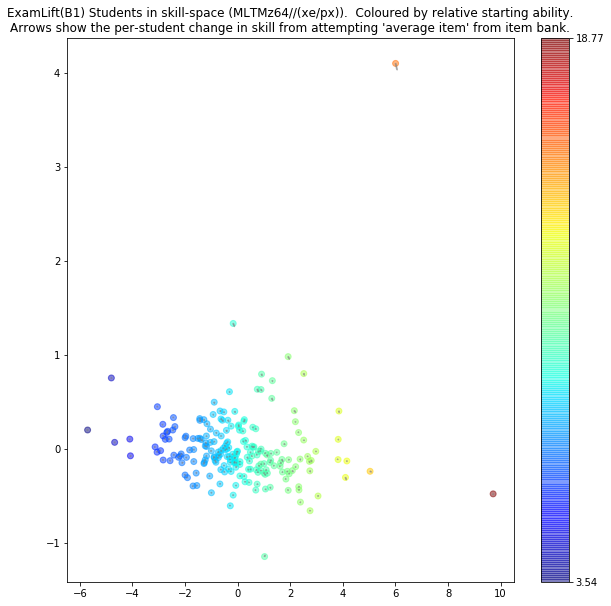

In [87]:
plot_arrows = True
for cluster_handle, cluster_m in [(this_handle, this_m), ]:

    s_indices = range(len(alphas))
    
    if plot_arrows:
#         scaler = StandardScaler()
        print("gammas shape", gammas.shape)
        post_prac = alphas+ gammas
#         alphas =  scaler.transform(alphas)
#         post_prac = scaler.transform(post_prac)
        pca = PCA(n_components=2)
        txd = pca.fit_transform(alphas)
        practice_txd = (pca.transform(post_prac) - txd)
    else:
#         scaler = StandardScaler()
#         alphas =  scaler.transform(alphas)
#         dimr = TSNE(n_components=2)
        #dimr = MDS(n_components=2, metric=True, n_jobs=-1)
        txd = pca.transform(alphas)
        
    cmap = plt.cm.jet
    plt.figure(figsize=(10,10))
    print(numpy.min(alphas))
    loc = alphas - numpy.min(alphas)
#     print(numpy.min(f2))
    
    opt = dict(color=None, 
#             arrowstyle = 'simple,head_width=5,head_length=7.5',
#             arrowstyle = '->',
#             arrowstyle='simple',
    width=1,
    headwidth=1,
    headlength=1,
#     mutation_scale=.2,
    alpha=.5,
    connectionstyle = 'arc3,rad=0')
    
    for c in [0]:

#         q_indices = scatter_groups[c]
#         abz = [numpy.sqrt(numpy.sum(numpy.square(numpy.clip(loc[six,:],0,math.inf)))) for six in s_indices]
#         abz2 = [numpy.median(f2[qix,:]) for qix in s_indices]
        abz = [numpy.sqrt(numpy.sum(numpy.square(loc[six,:]))) for six in s_indices]
        
#         for inner in ohg_txd:
#             for row,x,y in zip(inner,xs,ys):
# #                 print(row)
#                 dx,dy = row
#         cmap.set_over(max(abz))
#         cmap.set_under(min(abz))
#         plt.clim(min(abz),max(abz))
#         mn = numpy.sqrt( numpy.min(xs_end)**2 + numpy.min(ys_end)**2)
#         mx = numpy.sqrt( numpy.max(xs_end)**2 + numpy.max(ys_end)**2)
        xs = txd[s_indices,0]
        ys = txd[s_indices,1]
        
        if plot_arrows:
            hdg = gammas# - numpy.min(gammas) 
            print(hdg.shape)
            hdg_abz = [numpy.sqrt(numpy.sum(numpy.square(hdg[six,:]))) for six in s_indices]
            norm = plt.Normalize(min(hdg_abz),max(hdg_abz))
            xs_end = practice_txd[s_indices,0]
            ys_end = practice_txd[s_indices,1]
            for x,y,dx,dy,c in zip(xs,ys,xs_end,ys_end,hdg_abz):
                opt["color"]= 'gray' #cmap(norm(c))
                plt.annotate('', xycoords='data', xy=(x+dx,y+dy), xytext=(x,y), arrowprops=opt)
        
        plt.scatter(x=xs, y=ys, c=abz, cmap=cmap, alpha=0.5)
        
#     plt.clim(numpy.min(hardz), numpy.max(hardz))
    plt.colorbar(ticks=[numpy.min(abz), 0, numpy.max(abz)])
    plt.title("ExamLift(B1) Students in skill-space ({}).  Coloured by relative starting ability.\nArrows show the per-student change in skill from attempting 'average item' from item bank.".format(cluster_handle))

#     plt.title("ExamLift(B1) Question embedding space ({}).  Coloured by skill type.\nArrows show effect of practice for each question.".format(cluster_handle))
    plt.savefig(home+"/images/"+dataset_name+"_student_prac_vecs.pdf", format="pdf")

    plt.show()


In [ ]:
print(df.index)

In [ ]:
y_true = np.array([0, 1, 1])
y_pred = np.array([0.1, 0.2, 0.9])
ll = -log_loss(y_true, y_pred)
print(ll)

In [ ]:
robert_rankin = []
for qix, qemb in enumerate(qs):
    qn_name = qix_qid_lookup[qix]
    difficulty = numpy.sqrt(numpy.sum(numpy.square(qemb)))
    robert_rankin.append( (difficulty, qn_name) )
robert_rankin = list(reversed(sorted(robert_rankin)))

print("Hardest 10 Qns")
for pair in robert_rankin[0:10]:
    print(pair)

print("Easiest 10 Qns")
for pair in robert_rankin[-10:]:
    print(pair)

# plt.figure(figsize=(10,10))
# for c in scatter_groups:
#     q_indices = scatter_groups[c]
#     speedz = [numpy.sqrt(numpy.sum(numpy.square(qk_loadings[qix,:]))) for qix in q_indices]
#     plt.scatter(x=txd[q_indices,0], y=txd[q_indices,1], c=speedz, cmap=cmap, alpha=0.6)
# plt.colorbar()
# plt.show()


# #CLUSTER BY TRANSPOSED VPT
# results = m.predict([_qixs, _sixs, _hits])

In [ ]:
alphas = m.get_layer("alphas").get_weights()[0]
gammas = m.get_layer("gammas").get_weights()[0]
from sklearn.decomposition import PCA

for six in range(n_students):
# #   print(alphas[six])
  print(numpy.round(gammas[six],2))

# print(alphas.shape)
print(gammas.shape)

# fombo = numpy.concatenate([alphas, gammas], axis=1)
fombo = alphas
speed = numpy.mean(gammas, axis=1)
pca = PCA(n_components=2)
txd = pca.fit_transform(fombo)
plt.scatter(x=txd[:,0], y=txd[:,1], c=speed)
plt.colorbar()
plt.show()

In [ ]:
alphas = m.get_layer("alphas").get_weights()[0]
print(alphas.shape)
for six in range(n_students):
  print(numpy.round(alphas[six],2), sum(alphas[six]))

In [ ]:
from keras.regularizers import l1
from keras.layers import Dropout, multiply, subtract, GaussianNoise, GaussianDropout, Input, Lambda, Dense
from keras import backend as K
from keras import Model
def generate_multilabel_model(n_factors, optimiser):
    outw = 9
    qn_emb = Input(shape=(n_factors,), name="q_embedding")
  
    h = qn_emb
#     h = Dense( n_factors, activation="relu")(h)
#     h = Dense( (n_factors + outw)//2, activation="relu")(h)
#     h = Dense( 5, activation="relu")(h)
#     h = Dense( 5, activation="relu")(h)
    h = Dense(30, activation="relu")(h)
    kc_pred = Dense(outw, activation="softmax")(h)
    
    model = Model(inputs=qn_emb, outputs=kc_pred)
    model.compile(optimizer=optimiser, loss="categorical_crossentropy", metrics=["accuracy"])
#     model.compile(optimizer=optimiser, loss="mse", metrics=["accuracy"])

    print(model.summary())

    return model

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=10)
qws = m.get_layer("qn_embedding").get_weights()[0]
ww = qws.shape[1]
qn_embs = []
kc_list = []
KCs = [ 'error finding', 
        'spelling', 
        'phrasal verbs', 
        'speed reading', 
        'text matching',
        'dialogue', 
        'topic associations', 
        'minimal pairs', 
        'topic match', 
    ]

    
ixs = [ix for ix in range(len(qws))]
numpy.random.seed(666)
tr_ixs = numpy.random.choice(ixs, size=int(0.9*len(ixs)), replace=False)
print(len(tr_ixs))


tt_ixs = set(ixs) - set(tr_ixs)

tr_outs = []
w_outs = []
for qix in tr_ixs:
    qn_id = qix_qid_lookup[qix]
    print(qn_id)
    c = qn_id.split("~")[0][0:-2]
    c = c.lower().strip()
    c = "minimal pairs" if c=="miminal pairs" else c
    kc_ohe = [0 for _ in KCs]
    kcix = KCs.index(c)
    print(kcix)
    kc_ohe[kcix] = 1
    tr_outs.append(kc_ohe)
    w_outs.append(kcix)
tr_outs = numpy.array(tr_outs).reshape(-1,len(KCs))
print(len(tr_outs))
    
tt_outs = []
for qix in tt_ixs:
    qn_id = qix_qid_lookup[qix]
    print(qn_id)
    c = qn_id.split("~")[0][0:-2]
    c = c.lower().strip()
    c = "minimal pairs" if c=="miminal pairs" else c
    kc_ohe = [0 for _ in KCs]
    kcix = KCs.index(c)
    kc_ohe[kcix] = 1
    tt_outs.append(kc_ohe)
tt_outs = numpy.array(tt_outs).reshape(-1,len(KCs))
    
from sklearn.utils.class_weight import compute_class_weight
print(w_outs)
# class_wgts = compute_class_weight("balanced", range(len(KCs)), w_outs)
class_wgts = compute_class_weight("balanced", [0,1], tt_outs.flatten())
print(class_wgts)
class_wgts = [cw/min(class_wgts) for cw in class_wgts]
del w_outs

# qn_embs = numpy.array(qn_embs)
# kc_list = numpy.array(kc_list)

# kc_sums = numpy.sum(kc_list, axis=0)
# kc_max = numpy.max(kc_sums)
# print(kc_max)
# kc_sums = kc_max / kc_sums

# print("KC sums", kc_sums)
# class_wgts = {}
# for ix,kcs in enumerate(kc_sums):
#     class_wgts[ix] = kcs

print(class_wgts)
print(ww)

In [ ]:
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
qn_embs = qws
ww = qws.shape[1]
print("QN embs\n", qn_embs)
# print("KC list\n",kc_list)
print("#samples:", 0.9*len(tr_ixs), 0.1*len(tr_ixs), len(tt_ixs))
# from sklearn.metrics import multilabel_confusion_matrix

print(len(tr_outs))

f1_list = []
n_reps = 10
tr_embs = [qws[i,:] for i in tr_ixs]
tr_embs = numpy.array(tr_embs).reshape((-1, ww))

tt_embs = [qws[i,:] for i in tt_ixs]
tt_embs = numpy.array(tt_embs).reshape((-1, ww))


for _ in range(n_reps):
#     qn_embs = numpy.reshape(qn_embs, (-1, ww))
#     kc_list = numpy.reshape(kc_list, (-1, 9))

    emb_mod = generate_multilabel_model(ww, Adam())
    emb_mod.fit(tr_embs, tr_outs, batch_size=32, epochs = 1000000, validation_split=0.1, class_weight=class_wgts, callbacks=[es])

    # print("test:", emb_mod.evaluate(qn_embs, kc_list))
    predz = emb_mod.predict(tt_embs)
    print((predz>=0.5).astype(int))

    # print("test:", f1_score(kc_list, preds>=0.5))

    print(confusion_matrix(tt_outs.flatten(), (predz.flatten() >= 0.5 )))
    this_f1 = f1_score(tt_outs.flatten(), (predz.flatten() >= 0.5 ))#, average="macro")
    print(this_f1)
    f1_list.append( this_f1)

print(f1_list)
print(numpy.mean(f1_list), numpy.std(f1_list))
    # print(multilabel_confusion_matrix(kc_list, (predz >= 0.5 )))

In [ ]:
qws = this_m.get_layer("qn_embedding").get_weights()[0]
for qix in range(len(qws)):
    qid = qix_qid_lookup[qix]
    print(qix, qid)

In [ ]:
mag_list = []
for qix,qw in enumerate(qws):
    qid = qix_qid_lookup[qix]
    mag = numpy.linalg.norm(qw, ord=2)
    mag_list.append((mag, qix))
sorted_list = sorted(mag_list)

for pr,sr in zip(mag_list, sorted_list):
    print(pr[1], sr[1], sr[0])
    
for sr in sorted_list:
    print(qix_qid_lookup[sr[1]])

In [ ]:
df = pandas.read_csv("~/Downloads/Worksheet_1041.csv")#, nrows=10000)
# print(df[0:100])


maBgebliche_reihen = df[(~df["question_order"].isnull()) & (df["event_type"]=="answer_submitted")]
maBgebliche_reihen = maBgebliche_reihen[["user_id","timestamp","activity_name","question_order"]]
maBgebliche_reihen["qid"] = maBgebliche_reihen["activity_name"].map(str) + "~" + maBgebliche_reihen["question_order"].map(str)
maBgebliche_reihen = maBgebliche_reihen.drop_duplicates()
print(maBgebliche_reihen)
# raise Exception("Twat")

print(len(df["user_id"]))
user_ids = list(df["user_id"].drop_duplicates())
print("--------")

del df

user_zahl = defaultdict(int)
id_orderlist_dict = defaultdict(list)
# for uid in user_ids:
#     print("counting", uid)
#     diese_reihen = maBgebliche_reihen[maBgebliche_reihen["user_id"]==uid]
#     ix = 0
diese_reihen = maBgebliche_reihen
print("counting")
for _,reihe in diese_reihen.iterrows():
    user_id = reihe["user_id"]
    frage_name = reihe["qid"] 
    ix = user_zahl[user_id]
    id_orderlist_dict[frage_name].append(ix)
    user_zahl[user_id] += 1

del diese_reihen
del maBgebliche_reihen

# print(id_orderlist_dict)
neue_ordnung_liste = []
print("averaging")
for k in id_orderlist_dict:
#     print("averaging", k)
    anzahlen = id_orderlist_dict[k]
#     print(k, anzahlen)
    durchschnittlicher_stand = numpy.median(anzahlen)
#     neue_ordnung_dict[k] = durchschnittlicher_stand
    neue_ordnung_liste.append((durchschnittlicher_stand, k, len(anzahlen)))

del id_orderlist_dict    
for k,stand,wieviel in sorted(neue_ordnung_liste):
    print(k, stand, "({})".format(wieviel))

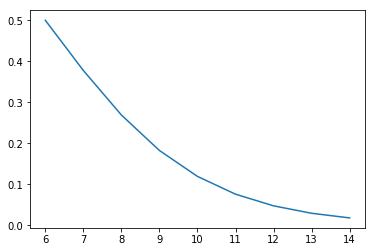

In [190]:
ps = []
ds = []
for n in range(6,15):
    z = n*0.5 + -3
    p = 1- logistic(z, b=1, off=0)
    ps.append((n,p))
plt.plot([x[0] for x in ps], [y[1] for y in ps])

In [70]:
print(mapping)

                                               qn_id          activity_name  \
qn_id                                                                         
Dialogue 1~1.0                        Dialogue 1~1.0             Dialogue 1   
Dialogue 1~2.0                        Dialogue 1~2.0             Dialogue 1   
Dialogue 1~3.0                        Dialogue 1~3.0             Dialogue 1   
Dialogue 1~4.0                        Dialogue 1~4.0             Dialogue 1   
Dialogue 1~5.0                        Dialogue 1~5.0             Dialogue 1   
Minimal pairs 1~1.0              Minimal pairs 1~1.0        Minimal pairs 1   
Minimal pairs 1~2.0              Minimal pairs 1~2.0        Minimal pairs 1   
Minimal pairs 1~3.0              Minimal pairs 1~3.0        Minimal pairs 1   
Minimal pairs 1~4.0              Minimal pairs 1~4.0        Minimal pairs 1   
Minimal pairs 1~5.0              Minimal pairs 1~5.0        Minimal pairs 1   
Minimal pairs 1~6.0              Minimal pairs 1~6.0

In [413]:
#this_m
# print(mapping)
# for qix in range(len(rs)):
#     qn_id = qix_qid_lookup[qix]
#     print(qn_id)

from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
print(type(o_qixs))

act_skills = numpy.unique(mapping.activity_skill)
print(act_skills)
for sk in act_skills:
    qids_for_sk = list(mapping.loc[mapping.activity_skill==sk].qn_id)
#     print(qids_for_sk)
    qids_for_sk = [q for q in qids_for_sk if q in qid_qix_lookup.keys()]
    qixs_for_sk = numpy.array([qid_qix_lookup[qid] for qid in qids_for_sk])
    #qindices = (o_qixs in qixs)
    qindices = [(q in qixs_for_sk) for q in o_qixs]
    qixs = o_qixs[qindices]
    sixs = o_sixs[qindices]
    hits = o_hits[qindices]
    out = o_out[qindices]
#     print(type(qixs),type(sixs),type(hits),type(out))
#     print(qixs.shape, sixs.shape, hits.shape, out.shape)
    p_hats = numpy.round(this_m.predict([qixs,sixs,hits]))
    f1s = f1_score(out, p_hats, average="macro")
    nvm = len(out)/len(numpy.unique(qixs))
    print(sk, nvm, f1s)

print("~ ~ ~ ~ ~~~~")
# for sk in act_skills:
indiv_q_res_list = []
for qix in numpy.unique(o_qixs):
#     qids_for_sk = list(mapping.loc[mapping.activity_skill==sk].qn_id)
#     print(qids_for_sk)
#     qids_for_sk = [q for q in qids_for_sk if q in qid_qix_lookup.keys()]
#     qixs_for_sk = numpy.array([qid_qix_lookup[qid] for qid in qids_for_sk])
    #qindices = (o_qixs in qixs)
#     qindices = [(q in qixs_for_sk) for q in o_qixs]
    qindices = (o_qixs == qix)
    qixs = o_qixs[qindices]
    sixs = o_sixs[qindices]
    hits = o_hits[qindices]
    out = o_out[qindices]
#     print(type(qixs),type(sixs),type(hits),type(out))
#     print(qixs.shape, sixs.shape, hits.shape, out.shape)
    p_hats = this_m.predict([qixs,sixs,hits])
    f1w = f1_score(out, numpy.round(p_hats), pos_label=1)
    f1z = f1_score(out, numpy.round(p_hats), pos_label=0)
    f1wav = f1_score(out, numpy.round(p_hats), average="weighted")
    f1mac = 0.5*(f1w+f1z)
    f1 = f1_score(out, numpy.round(p_hats))
    met = mean_squared_error(out, p_hats)
    mae = mean_absolute_error(out, p_hats)
    acc = accuracy_score(out, numpy.round(p_hats))
    nvm = len(out)
#     print(qix, qix_qid_lookup[qix], nvm, met)
    indiv_q_res_list.append([qix, qix_qid_lookup[qix], nvm, met, mae, acc, f1wav, f1mac ])
indiv_q_res_df = pandas.DataFrame(data = indiv_q_res_list, columns=["qix","qid","n_hits","mse", "mae","acc", "f1wav", "f1mac"])
del qindices

<class 'numpy.ndarray'>
['listening~minimal_pairs' 'listening~topic_match'
 'reading~match_the_text' 'reading~phrasal_verbs' 'reading~speed_reading'
 'speaking~dialogue' 'speaking~topic_association'
 'writing~error_correction' 'writing~spelling']
listening~minimal_pairs 492.65777777777777 0.6542360586078068
listening~topic_match 361.54285714285714 0.5651440071283247
reading~match_the_text 45.86666666666667 0.6455808305000406
reading~phrasal_verbs 434.96875 0.7463519984875069
reading~speed_reading 448.9868421052632 0.6701583787454141
speaking~dialogue 516.1466666666666 0.6025454478770087
speaking~topic_association 307.02222222222224 0.7807318497244654
writing~error_correction 464.5 0.6661364818736923
writing~spelling 461.3739837398374 0.6521876622722191
~ ~ ~ ~ ~~~~


/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [281]:
indiv_q_res_df.sort_values(["mse","f1wav"], ascending=[True,False], inplace=True)
print(indiv_q_res_df)

       qix                        qid  n_hits       mse       mae       acc  \
713    713             Spelling 1~2.0     105  0.003376  0.046151  1.000000   
711    711         Topic match 13~7.0      90  0.004352  0.052947  1.000000   
571    571       Minimal pairs 10~7.0     205  0.009792  0.047398  0.990244   
1034  1034            Spelling 7~17.0      27  0.010867  0.090610  1.000000   
259    259             Spelling 2~3.0     447  0.011292  0.039154  0.988814   
1039  1039          Topic match 7~4.0      23  0.011391  0.093561  1.000000   
900    900        Minimal pairs 8~4.0      49  0.012060  0.087988  1.000000   
1027  1027            Spelling 7~10.0      28  0.012849  0.099441  1.000000   
1031  1031            Spelling 7~14.0      28  0.013330  0.100510  1.000000   
857    857         Topic match 12~3.0      48  0.014238  0.087369  1.000000   
1038  1038          Topic match 7~3.0      23  0.014311  0.106996  1.000000   
94      94            Spelling 4~10.0    1403  0.014

<function matplotlib.pyplot.show>

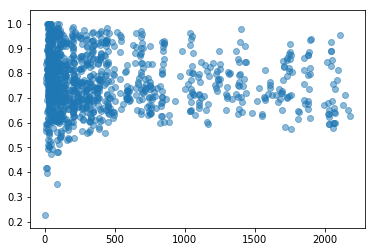

In [282]:
plt.scatter(indiv_q_res_df.n_hits, indiv_q_res_df.f1wav, alpha=0.5)
plt.show

17 1.2056255711285622 1.0 0.5962611859885255


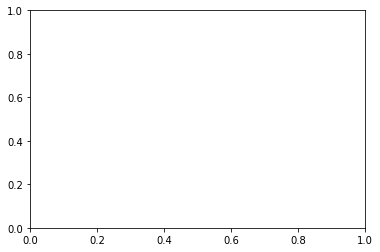

In [414]:
data = []
for q,s,h,o in zip(o_qixs, o_sixs, o_hits, o_out):
    data.append((q,s,h,o))
qsho_df = pandas.DataFrame(data=data, columns=["qix","six","hits","out"])

run_lens = []
#plot some questions
uniq_sixs = numpy.unique(o_sixs)
for qix in range(len(rs)):
    q_qsho_df = qsho_df[qsho_df.qix==qix]
    ax = plt.gca()
    for six in uniq_sixs:
        if six not in q_qsho_df.six.values:
            continue
#         print(qix,six)
#         s_indices = (qsho_df.six==six)
#         temp_df = q_qsho_df[(q_qsho_df.six==six)]
        matches = (q_qsho_df.six==six).astype(int)
        n = numpy.sum(matches) #len(temp_df)
        run_lens.append(n)
#         if n==0:
#             continue
#         elif n>5:
#             print(qix, six, len(temp_df))
#             temp_qixz = temp_df.iloc[:,0].reshape(-1,1)
#             temp_sixz = temp_df.iloc[:,1].reshape(-1,1)
#             temp_hitz = temp_df.iloc[:,2]
# #             temp_hitz = numpy.ravel(numpy.array(temp_hitz)).reshape(-1, rs.shape[0])
#             temp_hitz = numpy.array(temp_hitz.tolist()).reshape(-1, rs.shape[0])
#             print(type(temp_hitz))
#             temp_outz = temp_df.iloc[:,3].reshape(-1,1)
# #             for i in range(len(rows)):
# #                 row = list(rows.iloc[i,:])
# #                 print(row)
# #                 rows_list.append(row)
# #             print(rows)
# #             predz = this_m.predict([temp_qixz, temp_sixz, temp_hitz]).ravel()
#             print(predz)
#             x_range = list(range(len(temp_sixz)))
#             predz = list(range(len(temp_sixz)))
#             print(x_range)
# #             plt.plot(x_range, predz)
# #             plt.scatter(x_range, temp_outz)
# #             plt.title(str(qix) +" by "+ str(six))
# #             plt.show()

print(numpy.max(run_lens), numpy.mean(run_lens), numpy.median(run_lens), numpy.std(run_lens))

-6.9489713
6.4398694
Error finding 1~1.0 6.424164295196533
Error finding 1~2.0 6.024799346923828
Error finding 1~3.0 6.824357986450195
Error finding 1~4.0 6.362844944000244
Error finding 1~6.0 5.8536224365234375
Error finding 1~7.0 6.695982933044434
Speed reading 14~2.0 5.700292587280273
Speed reading 14~3.0 6.566694259643555
Speed reading 14~4.0 6.639835357666016
Speed reading 14~5.0 6.161114692687988
Minimal pairs 1~1.0 7.36580228805542
Minimal pairs 1~2.0 7.412457466125488
Minimal pairs 1~3.0 6.454562187194824
Minimal pairs 1~4.0 7.257933139801025
Minimal pairs 1~5.0 6.120499610900879
Minimal pairs 1~6.0 5.128137111663818
Minimal pairs 1~7.0 4.714015960693359
Minimal pairs 1~8.0 4.992063522338867
Minimal pairs 1~9.0 4.6107378005981445
Minimal pairs 1~10.0 4.229898452758789
Minimal pairs 1~11.0 6.674600124359131
Minimal pairs 1~12.0 6.8473687171936035
Minimal pairs 1~13.0 6.071263313293457
Minimal pairs 1~14.0 6.905818939208984
Minimal pairs 1~15.0 5.93002462387085
Dialogue 1~1.0 5.4

Speed reading 3~2.0 4.930929660797119
Speed reading 3~3.0 6.550849437713623
Speed reading 3~4.0 6.999987602233887
Speed reading 3~5.0 6.737030982971191
Spelling 7~1.0 6.585892200469971
Spelling 7~2.0 7.558974266052246
Spelling 7~3.0 5.298710346221924
Spelling 7~6.0 6.744954586029053
Spelling 7~7.0 6.731865882873535
Spelling 7~8.0 6.425705432891846
Spelling 7~9.0 6.898994445800781
Spelling 7~10.0 5.3560895919799805
Spelling 7~11.0 4.868947982788086
Spelling 7~12.0 8.509661674499512
Spelling 7~13.0 5.399066925048828
Spelling 7~14.0 3.090657949447632
Spelling 7~15.0 4.839137077331543
Spelling 7~16.0 5.453564167022705
Spelling 7~17.0 3.238142728805542
Spelling 7~18.0 6.859178066253662
Topic match 7~1.0 5.856093406677246
Topic match 7~2.0 5.585461139678955
Topic match 7~3.0 3.492370843887329
Topic match 7~4.0 3.4685046672821045
Topic match 7~5.0 5.074666500091553
Topic match 7~6.0 5.063010215759277
Topic match 7~7.0 3.8844518661499023
Topic associations 7~3.0 9.235695838928223
Topic associa

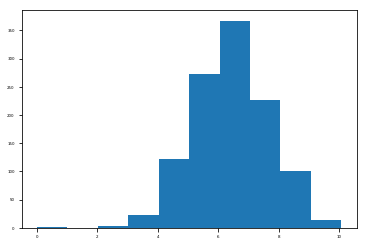

In [38]:
#plot some questions
qs = this_m.get_layer("qn_embedding").get_weights()[0]

to_plot = []
min_norm = numpy.min(qs)
print(min_norm)
qs = qs - min_norm
med_norm = numpy.median(qs)
print(med_norm)

norms = []
std_diffs = []

out_table = []

for qix,row in enumerate(qs):
    qid = qix_qid_lookup[qix]
    norm = float(row) #= numpy.linalg.norm(row)
    print(qid, norm)
    norms.append(norm)
    out_table.append((qix, qid, norm))
    pr = logistic(norm - med_norm, 1,0)
    std_diffs.append(pr)

    
outdf = pandas.DataFrame(data=out_table, index=None, columns=["index","question_id","difficulty_rasch"])
outdf.to_csv("for_sylwia.csv")
    
plt.hist(norms)
plt.show()


In [39]:
#plot some questions
n_qs = this_m.get_layer("qn_embedding").get_weights()[0].shape[0]
print(n_qs)
# indices = numpy.random.choice(range(numpy.max(sixs)), 50)
indices = range(numpy.max(sixs))
to_plot = []
for qix in list(range(n_qs))[0:10]:
    ax = plt.gca()
    xs = range(17)
    yss = []
    for six in indices:
#         print("new six", six)
#     for six in numpy.unique(o_sixs)[0:10]:
        s_hist = numpy.zeros(n_qs).reshape(1,-1)
        qix = numpy.array(qix).reshape(1,1)
        six = numpy.array(six).reshape(1,1)
#         print(s_hist)
        ys = []
        hists = []
        th_ss = []
        th_qs = []
        for tryy in xs:
#             print("+1",six,qix)
#             pred = this_m.predict((qix, six, s_hist))
            hists.append(copy.copy(s_hist))
            th_ss.append(six)
            th_qs.append(qix)
            s_hist[0,qix]+=1
#         print("pred'g")
        ys = this_m.predict((numpy.array(th_qs).reshape(-1,1), numpy.array(th_ss).reshape(-1,1), numpy.array(hists).reshape(-1,n_qs)))
#             ys.append(float(pred))
        yss.append(ys)
#         plt.plot(xs,ys, alpha=0.2)
#     plt.plot(xs, 1.0-numpy.median(yss,axis=0), linestyle="--", label=str(int(qix)))
    to_plot.append((xs, 1.0-numpy.mean(yss,axis=0), qix))
    

1130


NameError: name 'sixs' is not defined

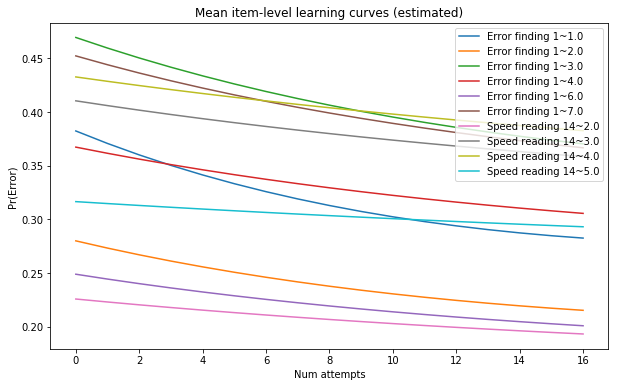

In [284]:
plt.figure(figsize=(10,6))
for (xs,ys,qix) in to_plot:
    plt.plot(xs,ys, label= qix_qid_lookup[int(qix)])
plt.title("Mean item-level learning curves (estimated)")
plt.xlabel("Num attempts")
plt.ylabel("Pr(Error)")
plt.legend()
plt.show()

# for (xs,ys,qix) in to_plot:
#     plt.plot(numpy.log(xs), ys, label=str(int(qix)))
# plt.title("Median predicted item-level learning curves")
# plt.xlabel("Log (Num attempts)")
# plt.ylabel("Pr(Error)")
# plt.legend()
# plt.show()

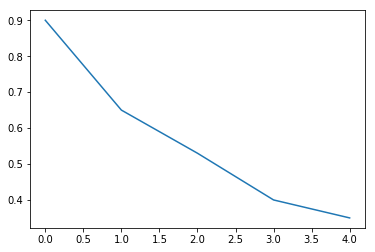

In [98]:
plt.plot([0,1,2,3,4], [0.9,0.65,0.53,0.4,0.35])

(1134, 64)
all_qixs 1134
[[33]]
    random
100
    random 2
100
    best 1st
100
    worst 1st
100


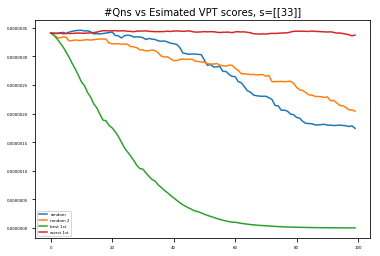

[[66]]
    random
100
    random 2
100
    best 1st
100
    worst 1st
100


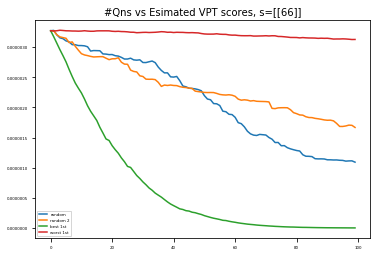

[[99]]
    random
100
    random 2
100
    best 1st
100
    worst 1st
100


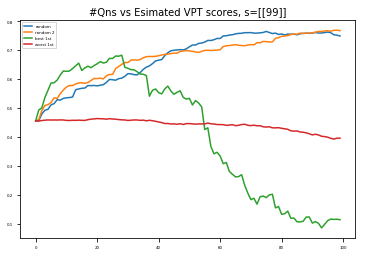

In [28]:
import copy
print(this_m.get_layer("qn_embedding").get_weights()[0].shape)
loading_ws = this_m.get_layer("qk_loadings").get_weights()[0]
hist_w = loading_ws.shape[0]
# print("n_qs", n_qs)
# gammas = this_m.get_layer("gammas").get_weights()[0]

# # for row in loading_ws:
# #     print(row)
# #     print(numpy.linalg.norm(row))
# lenz = [ numpy.linalg.norm(row) for row in loading_ws]
# # lenz = [ numpy.min(row) for row in loading_ws]
# # print(lenz)
# # raise Exception("done")
# lenz = numpy.argsort(lenz)
# worst_1st_ld_ranking = lenz
# best_1st_ld_ranking = list(numpy.flip(lenz, axis=0))

# six = numpy.array(66).reshape(1,1)
all_qixs = numpy.unique(o_qixs).reshape(-1,1)
n_qs = len(all_qixs)

# all_qixs = numpy.array([q for q in range(n_qs)]).reshape(-1,1)
print("all_qixs", len(all_qixs))

random_ranking = [q for q in all_qixs]
numpy.random.shuffle(random_ranking)

random_2 = [q for q in all_qixs]
numpy.random.shuffle(random_2)

# this_m_copy = copy.copy(this_m)

# wgts = this_m_copy.get_layer("gammas").get_weights()
# these_gammas = numpy.clip(wgts[0], 0, math.inf)
# wgts[0] = these_gammas
# this_m_copy.get_layer("gammas").set_weights(wgts)
# raise Exception("nobbo")
    
for six in [33,66,99]: #range(numpy.max(o_sixs)+1):
#     gammas = numpy.clip(this_m.get_layer("gammas").get_weights()[0],0,1)
    gammas = this_m.get_layer("gammas").get_weights()[0]
    loading_ws = loading_ws * gammas[six]

#     minz = [ numpy.min(row) for row in loading_ws]
#     print("minz:", minz)
#     print("~ ~ ~ ~ ~ ~ ~ ~")
#     gminz = [ numpy.min(row) for row in gammas]
#     print("gminz:", gminz)
#     raise Exception("wang")
    
    # raise Exception("done")
    lenz = [ numpy.linalg.norm(row) for row in loading_ws]
    lenz = numpy.argsort(lenz)
    worst_1st_ld_ranking = lenz
    best_1st_ld_ranking = list(numpy.flip(lenz, axis=0))
    
    six_repd = numpy.array([six]*n_qs).reshape(-1,1)
    six = numpy.array(six).reshape(1,1)
    print(six)
#     obs = []
#     pijs = []
    for raw_qixs_left, pol_name in [(random_ranking,"random"), (random_2,"random 2"), 
                                    (best_1st_ld_ranking,"best 1st"), (worst_1st_ld_ranking, "worst 1st")]:
        qixs_left = [q for q in raw_qixs_left]
        print("   ",pol_name)
        shits = numpy.zeros(hist_w)
        c = 0
        budget = 100
        vpts = []
        while c<budget and len(qixs_left)>0:
        #     next_act = numpy.random.choice(qixs_left, size=1)
            next_act = int(qixs_left.pop(0))
#             next_act = numpy.array(next_act).reshape(1,1)
#             shits = shits.reshape(1,-1)
#             print("next", next_act)

#             p_ij = this_m.predict((six,next_act,shits)) 
#             pijs.append(p_ij)
#             ob = int(random.random() < p_ij)
#             obs.append(ob)
#             print(">", float(p_ij), " real: ", float(ob))
            
#             print("preidctin")
#             print(all_qixs)
            mega_shits = numpy.array([shits]*n_qs).reshape(n_qs,-1)
#             scores = []
#             for s,q,msh in zip(six_repd, all_qixs, mega_shits):
#                 print("pred",s,q)
#                 print(msh.shape)
#                 sc = this_m.predict(([all_qixs], [six_repd], [mega_shits]))
#                 scores.append(sc)
                
            score = numpy.mean(this_m.predict((all_qixs, six_repd, mega_shits)))
            shits[next_act]+=1
            c+=1
#             print(sum(shits))
#             print(mega_shits.shape)
#             print("pred VPT score is:", score)
            vpts.append(score)
#     plt.scatter(range(budget),pijs)
        print(c)
        plt.plot(range(budget),vpts, label=pol_name)
    plt.title("#Qns vs Esimated VPT scores, s="+str(six))
    plt.legend()
    plt.show()

In [75]:
f1str= """MLTM64 & 0.717 (0.010) & 0.738 (0.008) & 0.262 (0.008) & (0.700, 0.000) & (755.000, 0.000)\\
MLTM300 & 0.715 (0.012) & 0.734 (0.008) & 0.266 (0.008) & (0.533, 0.000) & (644.500, 0.004)\\
MLTM400 & 0.714 (0.012) & 0.734 (0.008) & 0.266 (0.008) & (0.500, 0.001) & (628.000, 0.009)\\
MLTM128 & 0.713 (0.009) & 0.736 (0.009) & 0.264 (0.009) & (0.567, 0.000) & (688.000, 0.000)\\
MLTM32 & 0.712 (0.009) & 0.734 (0.008) & 0.266 (0.008) & (0.567, 0.000) & (719.500, 0.000)\\
MLTM256 & 0.711 (0.011) & 0.734 (0.008) & 0.266 (0.008) & (0.467, 0.003) & (585.000, 0.047)\\
MLTM16 & 0.710 (0.011) & 0.733 (0.011) & 0.267 (0.011) & (0.367, 0.035) & (565.000, 0.090)\\
MLTM8 & 0.705 (0.011) & 0.731 (0.010) & 0.269 (0.010) & (0.367, 0.035) & (399.500, 0.459)\\
AFM300 & 0.701 (0.009) & 0.725 (0.008) & 0.275 (0.008) & (0.433, 0.007) & (261.000, 0.005)\\
AFM32 & 0.699 (0.011) & 0.725 (0.011) & 0.275 (0.011) & (0.467, 0.003) & (223.000, 0.001)\\
AFM64 & 0.697 (0.008) & 0.725 (0.007) & 0.275 (0.007) & (0.533, 0.000) & (202.000, 0.000)\\
AFM8 & 0.696 (0.008) & 0.726 (0.006) & 0.274 (0.006) & (0.600, 0.000) & (120.500, 0.000)\\
AFM400 & 0.694 (0.009) & 0.721 (0.008) & 0.279 (0.008) & (0.600, 0.000) & (201.000, 0.000)\\
AFM16 & 0.692 (0.006) & 0.725 (0.006) & 0.275 (0.006) & (0.633, 0.000) & (121.500, 0.000)\\
CFM128 & 0.684 (0.010) & 0.716 (0.010) & 0.284 (0.010) & (0.800, 0.000) & (76.000, 0.000)\\
CFM16 & 0.683 (0.011) & 0.715 (0.008) & 0.285 (0.008) & (0.867, 0.000) & (44.500, 0.000)\\
AFM128 & 0.683 (0.034) & 0.718 (0.039) & 0.282 (0.039) & (0.733, 0.000) & (80.500, 0.000)\\
CFM64 & 0.681 (0.009) & 0.713 (0.007) & 0.287 (0.007) & (0.933, 0.000) & (4.000, 0.000)\\
CFM32 & 0.680 (0.010) & 0.713 (0.008) & 0.287 (0.008) & (0.833, 0.000) & (54.000, 0.000)\\
CFM400 & 0.678 (0.010) & 0.711 (0.010) & 0.289 (0.010) & (0.900, 0.000) & (53.000, 0.000)\\
CFM300 & 0.678 (0.012) & 0.711 (0.010) & 0.289 (0.010) & (0.833, 0.000) & (57.500, 0.000)\\
CFM256 & 0.676 (0.011) & 0.708 (0.010) & 0.292 (0.010) & (0.967, 0.000) & (2.000, 0.000)\\
AFM256 & 0.673 (0.026) & 0.685 (0.031) & 0.315 (0.031) & (0.800, 0.000) & (85.000, 0.000)\\
CFM8 & 0.673 (0.013) & 0.711 (0.009) & 0.289 (0.009) & (0.967, 0.000) & (3.000, 0.000)\\
MLTM+400 & 0.716 (0.014) & 0.733 (0.014) & 0.267 (0.014) & (0.633, 0.000) & (668.000, 0.001)\\
AFMg300 & 0.712 (0.011) & 0.733 (0.009) & 0.267 (0.009) & (0.467, 0.003) & (551.000, 0.137)\\
MLTM+256 & 0.710 (0.011) & 0.728 (0.010) & 0.272 (0.010) & (0.533, 0.000) & (664.000, 0.002)\\
MLTM+64 & 0.710 (0.016) & 0.733 (0.015) & 0.267 (0.015) & (0.433, 0.007) & (536.000, 0.206)\\
MLTM+128 & 0.709 (0.012) & 0.728 (0.011) & 0.272 (0.011) & (0.333, 0.071) & (530.000, 0.239)\\
AFMg128 & 0.709 (0.012) & 0.734 (0.010) & 0.266 (0.010) & (0.400, 0.016) & (549.500, 0.143)\\
AFMg64 & 0.708 (0.011) & 0.734 (0.010) & 0.266 (0.010) & (0.367, 0.035) & (536.000, 0.206)\\
AFMg256 & 0.708 (0.015) & 0.734 (0.013) & 0.266 (0.013) & (0.400, 0.016) & (568.500, 0.081)\\
MLTM+300 & 0.708 (0.011) & 0.725 (0.010) & 0.275 (0.010) & (0.433, 0.007) & (552.000, 0.133)\\
MLTM+32 & 0.706 (0.012) & 0.731 (0.011) & 0.269 (0.011) & (0.267, 0.239) & (451.500, 0.988)\\
AFMg400 & 0.704 (0.016) & 0.728 (0.012) & 0.272 (0.012) & (0.433, 0.007) & (417.000, 0.631)\\
AFMg32 & 0.702 (0.008) & 0.728 (0.008) & 0.272 (0.008) & (0.400, 0.016) & (315.000, 0.047)\\
MLTM+16 & 0.691 (0.010) & 0.721 (0.009) & 0.279 (0.009) & (0.867, 0.000) & (66.000, 0.000)\\
AFMg16 & 0.690 (0.009) & 0.723 (0.009) & 0.277 (0.009) & (0.667, 0.000) & (157.500, 0.000)\\
AFMg8 & 0.674 (0.012) & 0.711 (0.010) & 0.289 (0.010) & (0.933, 0.000) & (30.000, 0.000)\\
MLTM+8 & 0.664 (0.017) & 0.705 (0.015) & 0.295 (0.015) & (0.900, 0.000) & (29.500, 0.000)\\
MLTMb16 & 0.651 (0.019) & 0.689 (0.012) & 0.311 (0.012) & (0.833, 0.000) & (135.000, 0.000)\\
MLP8 & 0.709 (0.012) & 0.734 (0.009) & 0.266 (0.009) & (0.533, 0.000) & (591.000, 0.038)\\
MLPd32 & 0.708 (0.012) & 0.734 (0.009) & 0.266 (0.009) & (0.400, 0.016) & (504.500, 0.424)\\
MLPd400 & 0.706 (0.011) & 0.728 (0.009) & 0.272 (0.009) & (0.267, 0.239) & (452.500, 0.976)\\
MLPd256 & 0.705 (0.009) & 0.731 (0.007) & 0.269 (0.007) & (0.300, 0.135) & (446.000, 0.959)\\
RASCH1 & 0.705 (0.004) & 0.738 (0.003) & 0.262 (0.003) & (0.000, 1.000) & (450.000, 0.994)\\
MLPd16 & 0.705 (0.015) & 0.731 (0.012) & 0.269 (0.012) & (0.367, 0.035) & (455.000, 0.947)\\
MLPd64 & 0.705 (0.012) & 0.731 (0.009) & 0.269 (0.009) & (0.333, 0.071) & (479.000, 0.673)\\
MLPd128 & 0.702 (0.014) & 0.726 (0.010) & 0.274 (0.010) & (0.600, 0.000) & (306.000, 0.034)\\
MLP256 & 0.701 (0.011) & 0.730 (0.009) & 0.270 (0.009) & (0.500, 0.001) & (314.000, 0.045)\\
MLPd300 & 0.700 (0.010) & 0.730 (0.010) & 0.270 (0.010) & (0.433, 0.007) & (324.500, 0.064)\\
MLP64 & 0.698 (0.006) & 0.728 (0.005) & 0.272 (0.005) & (0.567, 0.000) & (209.000, 0.000)\\
MLP32 & 0.698 (0.010) & 0.730 (0.008) & 0.270 (0.008) & (0.500, 0.001) & (259.000, 0.005)\\
MLP300 & 0.698 (0.014) & 0.715 (0.012) & 0.285 (0.012) & (0.433, 0.007) & (403.000, 0.491)\\
MLP128 & 0.697 (0.009) & 0.728 (0.007) & 0.272 (0.007) & (0.500, 0.001) & (230.000, 0.001)\\
MLPd8 & 0.697 (0.025) & 0.725 (0.011) & 0.275 (0.011) & (0.600, 0.000) & (193.500, 0.000)\\
MLP16 & 0.694 (0.011) & 0.723 (0.009) & 0.277 (0.009) & (0.667, 0.000) & (215.500, 0.001)\\
MLP400 & 0.693 (0.013) & 0.713 (0.015) & 0.287 (0.015) & (0.700, 0.000) & (184.000, 0.000)\\
MLPz64 & 0.730 (0.009) & 0.748 (0.009) & 0.252 (0.009) & (0.867, 0.000) & (888.000, 0.000)\\
MLPz32 & 0.726 (0.009) & 0.744 (0.008) & 0.256 (0.008) & (0.833, 0.000) & (865.000, 0.000)\\
MLTMz64 & 0.723 (0.011) & 0.736 (0.011) & 0.264 (0.011) & (0.700, 0.000) & (812.000, 0.000)\\
MLTMz128 & 0.721 (0.013) & 0.734 (0.012) & 0.266 (0.012) & (0.667, 0.000) & (733.000, 0.000)\\
MLPz128 & 0.719 (0.006) & 0.738 (0.006) & 0.262 (0.006) & (0.867, 0.000) & (875.000, 0.000)\\
MLTMz32 & 0.719 (0.012) & 0.734 (0.011) & 0.266 (0.011) & (0.600, 0.000) & (690.000, 0.000)\\
MLPz300 & 0.719 (0.007) & 0.738 (0.007) & 0.262 (0.007) & (0.833, 0.000) & (822.000, 0.000)\\
MLTMz256 & 0.718 (0.011) & 0.738 (0.007) & 0.262 (0.007) & (0.767, 0.000) & (767.000, 0.000)\\
MLPdz32 & 0.717 (0.008) & 0.738 (0.005) & 0.262 (0.005) & (0.733, 0.000) & (803.000, 0.000)\\
MLTMz16 & 0.716 (0.011) & 0.734 (0.010) & 0.266 (0.010) & (0.633, 0.000) & (664.000, 0.002)\\
MLPz400 & 0.716 (0.010) & 0.733 (0.010) & 0.267 (0.010) & (0.567, 0.000) & (608.000, 0.020)\\
MLPdz256 & 0.716 (0.013) & 0.738 (0.011) & 0.262 (0.011) & (0.567, 0.000) & (637.000, 0.006)\\
MLTM+z128 & 0.715 (0.010) & 0.738 (0.010) & 0.262 (0.010) & (0.500, 0.001) & (591.000, 0.038)\\
MLPdz300 & 0.714 (0.009) & 0.728 (0.008) & 0.272 (0.008) & (0.500, 0.001) & (676.000, 0.001)\\
MLTM+z64 & 0.714 (0.009) & 0.734 (0.008) & 0.266 (0.008) & (0.533, 0.000) & (721.000, 0.000)\\
MLTMz400 & 0.714 (0.017) & 0.736 (0.011) & 0.264 (0.011) & (0.500, 0.001) & (531.000, 0.234)\\
AFMgz128 & 0.713 (0.011) & 0.739 (0.009) & 0.261 (0.009) & (0.600, 0.000) & (687.500, 0.000)\\
MLPz16 & 0.713 (0.009) & 0.736 (0.008) & 0.264 (0.008) & (0.500, 0.001) & (669.000, 0.001)\\
MLPz256 & 0.713 (0.011) & 0.731 (0.011) & 0.269 (0.011) & (0.500, 0.001) & (651.000, 0.003)\\
MLPdz128 & 0.713 (0.011) & 0.734 (0.011) & 0.266 (0.011) & (0.467, 0.003) & (593.000, 0.035)\\
MLTM+z256 & 0.712 (0.007) & 0.734 (0.006) & 0.266 (0.006) & (0.467, 0.003) & (624.500, 0.010)\\
AFMgz64 & 0.712 (0.008) & 0.739 (0.006) & 0.261 (0.006) & (0.600, 0.000) & (771.500, 0.000)\\
MLTMz300 & 0.711 (0.010) & 0.734 (0.007) & 0.266 (0.007) & (0.567, 0.000) & (665.500, 0.001)\\
MLTM+z300 & 0.711 (0.009) & 0.734 (0.007) & 0.266 (0.007) & (0.533, 0.000) & (665.000, 0.002)\\
MLPz8 & 0.711 (0.007) & 0.734 (0.007) & 0.266 (0.007) & (0.533, 0.000) & (614.000, 0.016)\\
MLTM+z32 & 0.708 (0.008) & 0.733 (0.006) & 0.267 (0.006) & (0.367, 0.035) & (606.000, 0.021)\\
AFMgz300 & 0.707 (0.010) & 0.739 (0.008) & 0.261 (0.008) & (0.400, 0.016) & (495.000, 0.510)\\
AFMz16 & 0.704 (0.004) & 0.734 (0.005) & 0.266 (0.005) & (0.233, 0.393) & (338.500, 0.100)\\
AFMz300 & 0.704 (0.007) & 0.730 (0.008) & 0.270 (0.008) & (0.300, 0.135) & (391.000, 0.386)\\
MLTM+z400 & 0.703 (0.010) & 0.730 (0.007) & 0.270 (0.007) & (0.300, 0.135) & (423.500, 0.700)\\
MLTM+z16 & 0.703 (0.008) & 0.731 (0.007) & 0.269 (0.007) & (0.367, 0.035) & (335.000, 0.090)\\
MLPdz400 & 0.702 (0.015) & 0.721 (0.012) & 0.279 (0.012) & (0.467, 0.003) & (474.000, 0.727)\\
MLTMz8 & 0.702 (0.011) & 0.721 (0.011) & 0.279 (0.011) & (0.500, 0.001) & (310.000, 0.039)\\
AFMgz400 & 0.702 (0.015) & 0.730 (0.012) & 0.270 (0.012) & (0.500, 0.001) & (285.000, 0.015)\\
AFMgz32 & 0.701 (0.008) & 0.731 (0.005) & 0.269 (0.005) & (0.333, 0.071) & (360.000, 0.185)\\
MLTM+z8 & 0.701 (0.006) & 0.734 (0.004) & 0.266 (0.004) & (0.500, 0.001) & (260.000, 0.005)\\
MLPdz8 & 0.701 (0.015) & 0.728 (0.013) & 0.272 (0.013) & (0.500, 0.001) & (349.000, 0.137)\\
AFMz64 & 0.700 (0.008) & 0.731 (0.005) & 0.269 (0.005) & (0.367, 0.035) & (451.500, 0.988)\\
AFMz400 & 0.700 (0.007) & 0.728 (0.006) & 0.272 (0.006) & (0.567, 0.000) & (188.000, 0.000)\\
AFMz256 & 0.699 (0.007) & 0.725 (0.007) & 0.275 (0.007) & (0.567, 0.000) & (203.500, 0.000)\\
AFMz32 & 0.699 (0.005) & 0.731 (0.004) & 0.269 (0.004) & (0.467, 0.003) & (233.500, 0.001)\\
AFMz128 & 0.698 (0.005) & 0.725 (0.006) & 0.275 (0.006) & (0.667, 0.000) & (97.500, 0.000)\\
AFMgz256 & 0.696 (0.012) & 0.730 (0.010) & 0.270 (0.010) & (0.600, 0.000) & (314.000, 0.045)\\
MLPdz64 & 0.696 (0.009) & 0.718 (0.008) & 0.282 (0.008) & (0.633, 0.000) & (272.000, 0.009)\\
AFMgz16 & 0.690 (0.011) & 0.725 (0.009) & 0.275 (0.009) & (0.633, 0.000) & (273.000, 0.009)\\
MLPz64 & 0.730 (0.009) & 0.748 (0.009) & 0.252 (0.009) & (0.000, 1.000) & (450.000, 0.994)\\
MLPz32 & 0.726 (0.009) & 0.744 (0.008) & 0.256 (0.008) & (0.167, 0.808) & (385.500, 0.344)\\
MLTMz64 & 0.723 (0.011) & 0.736 (0.011) & 0.264 (0.011) & (0.267, 0.239) & (334.000, 0.087)\\
MLTMz128 & 0.721 (0.013) & 0.734 (0.012) & 0.266 (0.012) & (0.333, 0.071) & (272.000, 0.009)\\
MLPz128 & 0.719 (0.006) & 0.738 (0.006) & 0.262 (0.006) & (0.433, 0.007) & (246.500, 0.003)\\
MLTMz32 & 0.719 (0.012) & 0.734 (0.011) & 0.266 (0.011) & (0.400, 0.016) & (237.000, 0.002)\\
MLPz300 & 0.719 (0.007) & 0.738 (0.007) & 0.262 (0.007) & (0.500, 0.001) & (209.500, 0.000)\\
MLTMz256 & 0.718 (0.011) & 0.738 (0.007) & 0.262 (0.007) & (0.467, 0.003) & (218.000, 0.001)\\
MLTM64 & 0.717 (0.010) & 0.738 (0.008) & 0.262 (0.008) & (0.433, 0.007) & (224.000, 0.001)\\
MLPdz32 & 0.717 (0.008) & 0.738 (0.005) & 0.262 (0.005) & (0.600, 0.000) & (169.500, 0.000)\\
MLTMbz256 & 0.688 (0.016) & 0.702 (0.015) & 0.298 (0.015) & (0.667, 0.000) & (166.000, 0.000)\\
CFMz32 & 0.686 (0.011) & 0.716 (0.010) & 0.284 (0.010) & (0.667, 0.000) & (181.000, 0.000)\\
CFMz128 & 0.685 (0.013) & 0.716 (0.010) & 0.284 (0.010) & (0.733, 0.000) & (66.000, 0.000)\\
CFMz16 & 0.684 (0.009) & 0.715 (0.008) & 0.285 (0.008) & (1.000, 0.000) & (0.000, 0.000)\\
MLTMbz64 & 0.681 (0.012) & 0.692 (0.012) & 0.308 (0.012) & (0.767, 0.000) & (82.000, 0.000)\\
MLTMbz32 & 0.680 (0.008) & 0.692 (0.008) & 0.308 (0.008) & (1.000, 0.000) & (0.000, 0.000)\\
CFMz64 & 0.680 (0.009) & 0.710 (0.009) & 0.290 (0.009) & (0.933, 0.000) & (6.000, 0.000)\\
MLTMbz400 & 0.677 (0.008) & 0.689 (0.010) & 0.311 (0.010) & (1.000, 0.000) & (0.000, 0.000)\\
MLTMbz16 & 0.674 (0.016) & 0.693 (0.017) & 0.307 (0.017) & (0.767, 0.000) & (171.000, 0.000)\\
MLTMbz8 & 0.672 (0.016) & 0.698 (0.012) & 0.302 (0.012) & (1.000, 0.000) & (0.000, 0.000)\\
MLTMbz300 & 0.671 (0.011) & 0.679 (0.009) & 0.321 (0.009) & (1.000, 0.000) & (0.000, 0.000)"""

import re
# tmprows = f1str.replace("$\\gamma$", "g")
# print(tmprows)
tmprows = f1str.split("\\")

f1rows = []
mod_idx = []
for trow in tmprows:
#     print("*", trow)
    mod, f1cell = trow.split("&")[0:2]
    mod = mod.strip()
    f1score, f1mad = f1cell.split()
#     f1mad = pandas.str.extract(f1mad)
#     f1mad = [int(i) for i in f1mad.split() if i.isdigit()]
    f1mad = re.findall("\d+\.\d+", f1mad)[0]
    mod_idx.append(str(mod))
    f1rows.append([float(f1score), float(f1mad)])

f1_df = pandas.DataFrame(f1rows, mod_idx, ["f1","f1_mad"])
    
print(f1_df)

              f1  f1_mad
MLTM64     0.717   0.010
MLTM300    0.715   0.012
MLTM400    0.714   0.012
MLTM128    0.713   0.009
MLTM32     0.712   0.009
MLTM256    0.711   0.011
MLTM16     0.710   0.011
MLTM8      0.705   0.011
AFM300     0.701   0.009
AFM32      0.699   0.011
AFM64      0.697   0.008
AFM8       0.696   0.008
AFM400     0.694   0.009
AFM16      0.692   0.006
CFM128     0.684   0.010
CFM16      0.683   0.011
AFM128     0.683   0.034
CFM64      0.681   0.009
CFM32      0.680   0.010
CFM400     0.678   0.010
CFM300     0.678   0.012
CFM256     0.676   0.011
AFM256     0.673   0.026
CFM8       0.673   0.013
MLTM+400   0.716   0.014
AFMg300    0.712   0.011
MLTM+256   0.710   0.011
MLTM+64    0.710   0.016
MLTM+128   0.709   0.012
AFMg128    0.709   0.012
...          ...     ...
MLPdz8     0.701   0.015
AFMz64     0.700   0.008
AFMz400    0.700   0.007
AFMz256    0.699   0.007
AFMz32     0.699   0.005
AFMz128    0.698   0.005
AFMgz256   0.696   0.012
MLPdz64    0.696   0.009


In [84]:
mpdrc_raw_str = "MLTM400 & \textbf{0.990} & 0.953 & \textbf{0.953} & 0.965\\
MLTM256 & 0.988 & \textbf{0.957} & 0.952 & 0.962\\
CFM400 & 0.986 & 0.931 & n/a & 0.965\\
MLTM300 & 0.985 & 0.952 & 0.947 & 0.952\\
CFM300 & 0.980 & 0.932 & n/a & \textbf{0.970}\\
MLTM128 & 0.979 & 0.955 & 0.946 & 0.937\\
MLTM64 & 0.978 & 0.957 & 0.948 & 0.903\\
CFM64 & 0.975 & 0.912 & n/a & 0.913\\
CFM256 & 0.974 & 0.933 & n/a & 0.947\\
CFM128 & 0.969 & 0.910 & n/a & 0.919\\
MLTM32 & 0.962 & 0.955 & 0.940 & 0.818\\
CFM32 & 0.952 & 0.914 & n/a & 0.830\\
MLTM16 & 0.945 & 0.952 & 0.935 & 0.746\\
CFM16 & 0.940 & 0.925 & n/a & 0.808\\
MLTM8 & 0.929 & 0.937 & 0.915 & 0.662\\
CFM8 & 0.920 & 0.931 & n/a & 0.725\\
AFM400 & 0.916 & 0.932 & n/a & 0.674\\
AFM64 & 0.913 & 0.882 & n/a & 0.569\\
AFM300 & 0.904 & 0.922 & n/a & 0.597\\
AFM16 & 0.859 & 0.938 & n/a & 0.666\\
AFM128 & 0.738 & 0.920 & n/a & 0.528\\
AFM32 & 0.686 & 0.395 & n/a & 0.536\\
AFM256 & 0.679 & 0.922 & n/a & 0.540\\
AFM8 & 0.661 & 0.927 & n/a & 0.565\\
MLTM+256 & \textbf{0.968} & 0.962 & 0.943 & 0.952\\
MLTM+300 & 0.960 & \textbf{0.963} & \textbf{0.945} & 0.952\\
MLTM+400 & 0.953 & 0.959 & 0.934 & \textbf{0.953}\\
AFM$gamma$256 & 0.943 & 0.393 & 0.911 & 0.455\\
AFM$gamma$128 & 0.942 & 0.436 & 0.908 & 0.457\\
AFM$gamma$400 & 0.939 & 0.387 & 0.905 & 0.446\\
MLTM+128 & 0.934 & 0.960 & 0.935 & 0.916\\
AFM$gamma$300 & 0.931 & 0.393 & 0.905 & 0.460\\
MLTM+64 & 0.916 & 0.957 & 0.932 & 0.835\\
MLTM+32 & 0.893 & 0.956 & 0.918 & 0.712\\
AFM$gamma$32 & 0.876 & 0.619 & 0.908 & 0.509\\
AFM$gamma$64 & 0.871 & 0.535 & 0.918 & 0.575\\
MLTM+16 & 0.860 & 0.947 & 0.912 & 0.711\\
AFM$gamma$8 & 0.845 & 0.763 & 0.866 & 0.456\\
AFM$gamma$16 & 0.787 & 0.674 & 0.902 & 0.482\\
MLTM+8 & 0.762 & 0.920 & 0.882 & 0.685\\
MLP8 & \textbf{0.976} & 0.813 & 0.840 & 0.430\\
MLP16 & 0.975 & 0.810 & 0.870 & 0.461\\
MLP32 & 0.973 & 0.809 & 0.886 & 0.512\\
MLP64 & 0.972 & 0.787 & 0.915 & 0.594\\
MLP128 & 0.971 & 0.796 & 0.921 & 0.669\\
MLP400 & 0.959 & 0.681 & 0.934 & 0.852\\
MLP256 & 0.959 & 0.776 & 0.916 & 0.675\\
MLP300 & 0.957 & 0.650 & 0.937 & 0.706\\
MLPd400 & 0.956 & \textbf{0.854} & 0.949 & 0.869\\
MLPd256 & 0.951 & 0.815 & 0.948 & 0.821\\
MLPd300 & 0.949 & 0.836 & \textbf{0.956} & \textbf{0.890}\\
MLPd128 & 0.947 & 0.743 & 0.951 & 0.698\\
MLPd64 & 0.921 & 0.717 & 0.919 & 0.619\\
MLPd32 & 0.878 & 0.642 & 0.916 & 0.587\\
MLTM+_{l2}400 & \textbf{0.992} & 0.955 & 0.957 & 0.975\\
MLTMb_{l2}256 & 0.990 & 0.955 & 0.937 & 0.971\\
MLTMb_{l2}300 & 0.989 & 0.970 & 0.954 & 0.972\\
MLTM+_{l2}300 & 0.989 & 0.959 & 0.959 & 0.977\\
MLP_{l2}64 & 0.989 & 0.967 & 0.956 & 0.888\\
MLTM_{l2}400 & 0.989 & 0.963 & 0.950 & 0.963\\
MLP_{l2}32 & 0.989 & 0.965 & 0.948 & 0.828\\
MLTM+_{l2}256 & 0.988 & 0.952 & 0.958 & 0.971\\
MLP_{l2}128 & 0.987 & 0.967 & 0.961 & 0.929\\
MLTM_{l2}300 & 0.986 & 0.965 & 0.949 & 0.957\\
MLTM_{l2}256 & 0.984 & 0.969 & 0.951 & 0.962\\
MLP_{l2}16 & 0.984 & 0.960 & 0.931 & 0.683\\
MLP_{l2}8 & 0.982 & 0.954 & 0.893 & 0.518\\
MLTM_{l2}128 & 0.981 & 0.968 & 0.957 & 0.959\\
MLP_{l2}300 & 0.981 & 0.966 & 0.963 & 0.958\\
CFM_{l2}64 & 0.980 & 0.952 & n/a & 0.918\\
MLP_{l2}256 & 0.979 & 0.968 & 0.963 & 0.950\\
MLTM+_{l2}128 & 0.979 & 0.952 & 0.951 & 0.948\\
MLTMb_{l2}64 & 0.979 & 0.948 & 0.932 & 0.883\\
MLP_{l2}400 & 0.978 & 0.967 & \textbf{0.965} & 0.960\\
MLTM+_{l2}64 & 0.977 & 0.954 & 0.953 & 0.936\\
RASCH1 & 0.976 & 0.905 & 0.766 & 0.602\\
MLTMb_{l2}400 & 0.976 & 0.959 & 0.947 & \textbf{0.979}\\
MLTMb_{l2}128 & 0.975 & 0.960 & 0.933 & 0.938\\
MLTM_{l2}64 & 0.973 & 0.967 & 0.957 & 0.921\\
CFM_{l2}128 & 0.970 & 0.948 & n/a & 0.939\\
MLTM_{l2}32 & 0.954 & 0.963 & 0.953 & 0.848\\
MLTM+_{l2}32 & 0.951 & 0.943 & 0.941 & 0.870\\
CFM_{l2}32 & 0.940 & 0.962 & n/a & 0.851\\
AFM$gamma$_{l2}64 & 0.933 & 0.867 & 0.923 & 0.469\\
AFM_{l2}256 & 0.921 & 0.968 & n/a & 0.699\\
MLPd_{l2}400 & 0.920 & 0.967 & 0.964 & 0.942\\
AFM_{l2}32 & 0.920 & 0.967 & n/a & 0.672\\
AFM$gamma$_{l2}32 & 0.919 & 0.874 & 0.900 & 0.525\\
AFM$gamma$_{l2}256 & 0.917 & 0.790 & 0.922 & 0.410\\
AFM_{l2}64 & 0.916 & 0.964 & n/a & 0.593\\
MLTMb_{l2}32 & 0.916 & 0.939 & 0.895 & 0.855\\
MLPd_{l2}300 & 0.911 & \textbf{0.971} & 0.956 & 0.936\\
AFM$gamma$_{l2}128 & 0.910 & 0.816 & 0.911 & 0.441\\
AFM$gamma$_{l2}300 & 0.906 & 0.795 & 0.901 & 0.432\\
AFM_{l2}128 & 0.906 & 0.962 & n/a & 0.609\\
AFM_{l2}300 & 0.900 & 0.966 & n/a & 0.708\\
CFM_{l2}16 & 0.897 & 0.945 & n/a & 0.719\\
AFM_{l2}400 & 0.894 & 0.962 & n/a & 0.725\\
AFM$gamma$_{l2}400 & 0.893 & 0.787 & 0.916 & 0.446\\
MLTM_{l2}16 & 0.888 & 0.957 & 0.947 & 0.662\\
MLPd_{l2}256 & 0.877 & 0.968 & 0.962 & 0.903\\
MLPd_{l2}128 & 0.876 & 0.968 & 0.955 & 0.847\\
AFM_{l2}16 & 0.852 & 0.967 & n/a & 0.671\\
MLPd_{l2}64 & 0.849 & 0.962 & 0.947 & 0.787\\
MLPd_{l2}32 & 0.833 & 0.962 & 0.932 & 0.669\\
MLTM_{l2}8 & 0.825 & 0.952 & 0.944 & 0.668\\
AFM$gamma$_{l2}16 & 0.639 & 0.920 & 0.893 & 0.588"

mpdrc_raw_rows = mpdrc_raw_str.split("\\")
n_rows = len(mpdrc_raw_rows)
cols = ["qn_embedding","alphas","gammas","qk_loadings"]
n_cols = 5
raw_data = []
idx_list = []
for mrow in mpdrc_raw_rows:
    row_list = []
    print(mrow)
    mels = mrow.split("&")
    mod_id = mels.pop(0)
    idx_list.append(mod_id)
    row_list = [el.strip() for el in mels]
    raw_data.append(row_list)
    
cleaned_names = [s.replace("_{l2}","z").strip() for s in idx_list]
cleaned_names = [s.replace("$gamma$","g") for s in cleaned_names]
# modz = [''.join(filter(lambda i: not i.isdigit(), s)) for s in cleaned_names]
# widz = [''.join(filter(lambda i: i.isdigit(), s)) for s in cleaned_names]
# print(modz)
# print(widz)

df = pandas.DataFrame(raw_data, idx_list, cols)
for c in cols:
    df[c] = df[c].str.extract(r'(\d+.\d+)').astype('float')
    df[c] = df[c].replace(numpy.nan, 0)
    
# df["cln_names"] = cleaned_names
df.index = cleaned_names

# print((df["gammas"]>0).astype(float))
# raise Exception("toss")
    
df["macro_MPDRC"] = (df.qn_embedding + df.alphas + df.qk_loadings + df.gammas  ) / (3.0 + (df["gammas"]>0).astype(float))
#     df[c] = df[c].astype(float)

df.sort_values("macro_MPDRC", ascending=False, inplace=True)
print(df)

# for this_df in [df, ]:
#     x = this_df.to_string(header=False,
#                       index=True,
#                       float_format=lambda x: '%.3f' % x,
#                       index_names=False).split('\n')
#     # out_strs = [' & '.join(ele.split()) for ele in x]
#     out_strs = ['{} & {} & {} & {} & {} & {}\\\\'.format(*ele.split()) for ele in x]
#     print(cols)
#     for s in out_strs:
#         print(s)
#     print("\n")

MLTM400 & 	extbf{0.990} & 0.953 & 	extbf{0.953} & 0.965
MLTM256 & 0.988 & 	extbf{0.957} & 0.952 & 0.962
CFM400 & 0.986 & 0.931 & n/a & 0.965
MLTM300 & 0.985 & 0.952 & 0.947 & 0.952
CFM300 & 0.980 & 0.932 & n/a & 	extbf{0.970}
MLTM128 & 0.979 & 0.955 & 0.946 & 0.937
MLTM64 & 0.978 & 0.957 & 0.948 & 0.903
CFM64 & 0.975 & 0.912 & n/a & 0.913
CFM256 & 0.974 & 0.933 & n/a & 0.947
CFM128 & 0.969 & 0.910 & n/a & 0.919
MLTM32 & 0.962 & 0.955 & 0.940 & 0.818
CFM32 & 0.952 & 0.914 & n/a & 0.830
MLTM16 & 0.945 & 0.952 & 0.935 & 0.746
CFM16 & 0.940 & 0.925 & n/a & 0.808
MLTM8 & 0.929 & 0.937 & 0.915 & 0.662
CFM8 & 0.920 & 0.931 & n/a & 0.725
AFM400 & 0.916 & 0.932 & n/a & 0.674
AFM64 & 0.913 & 0.882 & n/a & 0.569
AFM300 & 0.904 & 0.922 & n/a & 0.597
AFM16 & 0.859 & 0.938 & n/a & 0.666
AFM128 & 0.738 & 0.920 & n/a & 0.528
AFM32 & 0.686 & 0.395 & n/a & 0.536
AFM256 & 0.679 & 0.922 & n/a & 0.540
AFM8 & 0.661 & 0.927 & n/a & 0.565
MLTM+256 & 	extbf{0.968} & 0.962 & 0.943 & 0.952
MLTM+300 & 0.960 & 	ex

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [85]:
f1_df.index = [s.replace("//(xe/px)","") for s in f1_df.index] #f1_df["index"].replace("//(xe/px)","")
# # f1_df.index = [s.replace("g", "$\gamma$") for s in f1_df.index]
f1_df.index = [s.replace("MLTM0", "MLTM+") for s in f1_df.index]
# f1_df.index = [s.replace("MLTM+", "MLTMp") for s in f1_df.index]
f1_df.index = [s.strip() for s in f1_df.index]

# df.index = [s.replace("MLTM0", "MLTM+") for s in df.index]
# df.index = [s.replace("MLTM+", "MLTMp") for s in df.index]
# # f1_df.index = [s.replace("z", "$_{l2}$") for s in f1_df.index]

df.index = [s.replace("_{l2}","z").strip() for s in df.index]
df.index = [s.replace("$gamma$","g") for s in df.index]
cleaned_names = df.index
modz = [''.join(filter(lambda i: not i.isdigit(), s)) for s in cleaned_names]
print(modz)
widz = [''.join(filter(lambda i: i.isdigit(), s)) for s in cleaned_names]
df["w"] = widz
df["model_fam"] = modz

# print(f1_df.index)
for item in f1_df.index:
    print(item)

['MLTMbz', 'MLTM+z', 'MLTM+z', 'MLPz', 'MLTM+z', 'MLPz', 'MLTMz', 'MLTMz', 'MLTMz', 'MLTMbz', 'MLTM', 'MLPz', 'MLTM', 'MLTMz', 'MLTMbz', 'MLPz', 'CFM', 'CFM', 'MLTM', 'MLTM+z', 'MLTM+', 'MLTM+', 'MLTM+z', 'MLTMz', 'MLTM', 'CFMz', 'MLTMbz', 'CFM', 'CFMz', 'MLPz', 'MLTM+', 'MLPdz', 'MLTM', 'MLPdz', 'MLTM+', 'MLTMbz', 'CFM', 'CFM', 'MLPz', 'MLTMz', 'MLPdz', 'MLTM+z', 'MLTM', 'CFMz', 'MLPdz', 'MLTM+', 'MLPd', 'MLPd', 'MLTMbz', 'CFM', 'MLTM', 'CFM', 'MLPz', 'MLPdz', 'MLPd', 'MLTM+', 'MLTMz', 'AFMz', 'MLTM', 'AFMz', 'CFM', 'AFMz', 'MLTM+', 'MLP', 'CFMz', 'AFMz', 'MLPdz', 'MLTMz', 'AFM', 'MLP', 'MLPz', 'MLPd', 'MLP', 'AFMz', 'AFMz', 'AFMz', 'AFM', 'MLP', 'MLP', 'MLTM+', 'RASCH', 'AFM', 'AFMgz', 'AFMgz', 'MLP', 'MLPd', 'AFM', 'MLP', 'AFMgz', 'MLP', 'AFMgz', 'AFMgz', 'AFMgz', 'AFMgz', 'MLPd', 'AFMg', 'AFM', 'AFMg', 'AFMg', 'AFM', 'AFM', 'AFMg', 'AFMg', 'AFMg', 'AFMg', 'AFMg', 'AFM']
MLTM64
MLTM300
MLTM400
MLTM128
MLTM32
MLTM256
MLTM16
MLTM8
AFM300
AFM32
AFM64
AFM8
AFM400
AFM16
CFM128
CFM16
AFM1

In [86]:
for item in df["model_fam"]:
    print(item)

MLTMbz
MLTM+z
MLTM+z
MLPz
MLTM+z
MLPz
MLTMz
MLTMz
MLTMz
MLTMbz
MLTM
MLPz
MLTM
MLTMz
MLTMbz
MLPz
CFM
CFM
MLTM
MLTM+z
MLTM+
MLTM+
MLTM+z
MLTMz
MLTM
CFMz
MLTMbz
CFM
CFMz
MLPz
MLTM+
MLPdz
MLTM
MLPdz
MLTM+
MLTMbz
CFM
CFM
MLPz
MLTMz
MLPdz
MLTM+z
MLTM
CFMz
MLPdz
MLTM+
MLPd
MLPd
MLTMbz
CFM
MLTM
CFM
MLPz
MLPdz
MLPd
MLTM+
MLTMz
AFMz
MLTM
AFMz
CFM
AFMz
MLTM+
MLP
CFMz
AFMz
MLPdz
MLTMz
AFM
MLP
MLPz
MLPd
MLP
AFMz
AFMz
AFMz
AFM
MLP
MLP
MLTM+
RASCH
AFM
AFMgz
AFMgz
MLP
MLPd
AFM
MLP
AFMgz
MLP
AFMgz
AFMgz
AFMgz
AFMgz
MLPd
AFMg
AFM
AFMg
AFMg
AFM
AFM
AFMg
AFMg
AFMg
AFMg
AFMg
AFM


In [87]:
print(f1_df.index)

Index(['MLTM64', 'MLTM300', 'MLTM400', 'MLTM128', 'MLTM32', 'MLTM256',
       'MLTM16', 'MLTM8', 'AFM300', 'AFM32',
       ...
       'CFMz32', 'CFMz128', 'CFMz16', 'MLTMbz64', 'MLTMbz32', 'CFMz64',
       'MLTMbz400', 'MLTMbz16', 'MLTMbz8', 'MLTMbz300'],
      dtype='object', length=124)


In [89]:
print(f1_df)

try:
    f1_df["f1"] = f1_df[0]
except:
    print("F1 transfer didn't work")
print(df.index)

# f1_df.index = [s.replace("z","_{l2}")]

# for el in f1_df.index:
#     if el in df.index:
#         print("TROUT in f1_df:", el)
#     else:
#         print("NOWT in df    :", el)

# print(list(df.index))

# print(len(f1_df.index))
# print(len(df.index))


df["f1"] = numpy.nan
f1_vals = f1_df["f1"]
for ix,f1v in zip(f1_vals.index, f1_vals):
    df.at[ix, "f1"] = f1v

# df["f1"] = f1_vals
print(df)

              f1  f1_mad
MLTM64     0.717   0.010
MLTM300    0.715   0.012
MLTM400    0.714   0.012
MLTM128    0.713   0.009
MLTM32     0.712   0.009
MLTM256    0.711   0.011
MLTM16     0.710   0.011
MLTM8      0.705   0.011
AFM300     0.701   0.009
AFM32      0.699   0.011
AFM64      0.697   0.008
AFM8       0.696   0.008
AFM400     0.694   0.009
AFM16      0.692   0.006
CFM128     0.684   0.010
CFM16      0.683   0.011
AFM128     0.683   0.034
CFM64      0.681   0.009
CFM32      0.680   0.010
CFM400     0.678   0.010
CFM300     0.678   0.012
CFM256     0.676   0.011
AFM256     0.673   0.026
CFM8       0.673   0.013
MLTM+400   0.716   0.014
AFMg300    0.712   0.011
MLTM+256   0.710   0.011
MLTM+64    0.710   0.016
MLTM+128   0.709   0.012
AFMg128    0.709   0.012
...          ...     ...
MLPdz8     0.701   0.015
AFMz64     0.700   0.008
AFMz400    0.700   0.007
AFMz256    0.699   0.007
AFMz32     0.699   0.005
AFMz128    0.698   0.005
AFMgz256   0.696   0.012
MLPdz64    0.696   0.009


Index(['qn_embedding', 'alphas', 'gammas', 'qk_loadings', 'macro_MPDRC', 'w',
       'model_fam', 'f1'],
      dtype='object')
['AFM8' 'MLP32' 'CFM32' 'AFMg128' 'AFMg8' 'CFM400' 'AFM128' 'AFMg32'
 'AFMg400' 'MLTM+z128' 'MLTMz16' 'MLPdz32' 'AFMz256' 'MLTM+64' 'MLPdz300'
 'CFM64' 'MLPd256' 'AFMz300' 'AFMz16' 'CFM16' 'MLPz300' 'MLTM+8' 'MLPd32'
 'MLPd400' 'AFM400' 'MLTMz32' 'MLTMz8' 'MLPdz128' 'MLP64' 'MLPz16' 'AFM32'
 'MLPd300' 'AFMz400' 'AFM16' 'MLPz128' 'AFMz64' 'MLTM+z64' 'MLTM300'
 'MLP16' 'MLPz32' 'MLTMz256' 'MLTM256' 'AFMgz400' 'AFMg64' 'MLPz8'
 'MLTM+z300' 'MLP400' 'AFM64' 'CFM256' 'MLPz256' 'AFMgz16' 'MLTMz64'
 'MLTM32' 'MLTM+32' 'MLTM+128' 'MLTM+16' 'CFM128' 'MLTMz400' 'MLTM64'
 'MLTM+256' 'CFM300' 'MLPdz400' 'MLPz64' 'MLTM+z400' 'AFMg16' 'AFMg300'
 'MLTMz300' 'MLTM16' 'MLPdz64' 'MLPdz256' 'MLPd128' 'AFMgz32' 'RASCH1'
 'MLP8' 'MLPz400' 'MLTM+z32' 'AFMgz64' 'MLTM400' 'AFMz32' 'MLTM+z256'
 'AFM300' 'AFMgz128' 'AFM256' 'MLTM+300' 'AFMgz256' 'AFMgz300' 'AFMg256'
 'MLTM128' 'MLTM+400

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


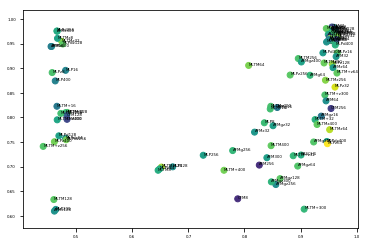

In [215]:
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import minmax_scale
# cmap = plt.cm.get_cmap('viridis')

# print(df.columns)
# labs = df.index
# print(pandas.unique(labs))

# df["students"] = (df["alphas"]+ df["gammas"]) /2
# df["items"] = (df["qn_embedding"]+ df["qk_loadings"]) /2

# xs = df["students"]
# ys = df["items"]
# zs = df["f1"]
# # plt.figure(figsize=(10,10))
# ax = plt.gca()

# df = df.dropna()

# cols = []
# for x,y,z,l in zip(xs,ys,zs,labs):
#     leng = z #numpy.sqrt(x**2 + y**2 + z**2)
#     cols.append(leng)
# # print(cols)
# cols = minmax_scale(cols)
# cols = [cmap(c) for c in cols]

# plt.scatter(x=xs, y=ys, c=cols)
# plt.rc('font', size=4)

# for x,y,l in zip(xs,ys,labs):
#     ax.annotate(l, (x,y))
    
# # lgnd = plt.legend()
# # for handle in lgnd.legendHandles:
# #     handle.set_sizes([30.0])

# plt.savefig(home+"/images/"+dataset_name+"_MPDRC_st_v_item.pdf", format="pdf")
# plt.show()


In [90]:
for ix,vl in zip(df.index, df.f1):
    if "z" in ix:
        print(ix, vl)

MLTMbz300 0.671
MLTM+z300 0.711
MLTM+z400 0.703
MLPz400 0.716
MLTM+z256 0.712
MLPz300 0.719
MLTMz256 0.718
MLTMz400 0.714
MLTMz128 0.721
MLTMbz400 0.677
MLPz256 0.713
MLTMz300 0.711
MLTMbz256 0.688
MLPz128 0.719
MLTM+z128 0.715
MLTM+z64 0.714
MLTMz64 0.723
CFMz128 0.685
MLTMbz128 nan
CFMz64 0.68
MLPz64 0.73
MLPdz400 0.702
MLPdz300 0.714
MLTMbz64 0.681
MLPz32 0.726
MLTMz32 0.719
MLPdz256 0.716
MLTM+z32 0.708
CFMz32 0.686
MLPdz128 0.713
MLTMbz32 0.68
MLPz16 0.713
MLPdz64 0.696
MLTMz16 0.716
AFMz256 0.699
AFMz400 0.7
AFMz300 0.704
CFMz16 0.684
AFMz32 0.699
MLPdz32 0.717
MLTMz8 0.702
MLPz8 0.711
AFMz16 0.704
AFMz128 0.698
AFMz64 0.7
AFMgz32 0.701
AFMgz64 0.712
AFMgz128 0.713
AFMgz400 0.702
AFMgz16 0.69
AFMgz256 0.696
AFMgz300 0.707
MLTM+z16 0.703
MLTM+z8 0.701
MLPdz8 0.701
MLTMbz16 0.674
MLTMbz8 0.672


['MLTMbz' 'MLTM+z' 'MLPz' 'MLTMz' 'MLTM' 'CFM' 'MLTM+' 'CFMz' 'MLPdz'
 'MLPd' 'AFMz' 'MLP' 'AFM' 'RASCH' 'AFMgz' 'AFMg']
MLTMbz300    0.671
MLTM+z300    0.711
MLTM+z400    0.703
MLPz400      0.716
MLTM+z256    0.712
MLPz300      0.719
MLTMz256     0.718
MLTMz400     0.714
MLTMz128     0.721
MLTMbz400    0.677
MLTM400      0.714
MLPz256      0.713
MLTM256      0.711
MLTMz300     0.711
MLTMbz256    0.688
MLPz128      0.719
CFM400       0.678
CFM300       0.678
MLTM300      0.715
MLTM+z128    0.715
MLTM+256     0.710
MLTM+300     0.708
MLTM+z64     0.714
MLTMz64      0.723
MLTM128      0.713
CFMz128      0.685
CFM256       0.676
CFMz64       0.680
MLPz64       0.730
MLTM+400     0.716
             ...  
MLP64        0.698
MLP300       0.698
MLTM+8       0.664
RASCH1       0.705
AFM300       0.701
AFMgz32      0.701
AFMgz64      0.712
MLP32        0.698
MLPd64       0.705
AFM64        0.697
MLP16        0.694
AFMgz128     0.713
MLP8         0.709
AFMgz400     0.702
AFMgz16      0.690
AFMgz

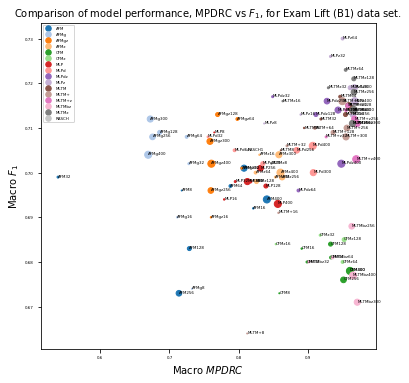

In [91]:
SMALL_SIZE = 4
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import minmax_scale

df = df.dropna()
# df = df.apply(pandas.to_numeric())
# df = df.astype(float)
# ss = df["w"].astype(float) / 8.0

cmap = plt.cm.get_cmap('tab20')

modfams = df["model_fam"].unique()
print(modfams)

# labs = [w.replace("gz","$\gamma l_2$") for w in labs]
# labs = [w.replace("g","$\gamma$") for w in labs]
# labs = [w.replace("z","$l_{2}$") for w in labs]

print(df["f1"])

plt.figure(figsize=(6,6))
# plt.rc('font', size=5)
# plt.rc('font', size=4)
for ix,mf in enumerate(sorted(modfams)):
    print("MOD FAM", mf)
    df2 = df[df.model_fam==mf]
    print(df2["f1"])
    xs = list(df2["macro_MPDRC"].astype(float))
    # ys = list(df["items"].astype(float))
    ys = list(df2["f1"].astype(float))
    labs = df2.index
    ss = df2["w"].astype(float) / 8.0
    plt.scatter(xs,ys, s=ss, label=mf, color=cmap(ix))
    for x,y,l in zip(xs,ys,labs):
#         l = l.replace("g","$\gamma$")
        plt.annotate(l, (x,y))
plt.xlabel("Macro $MPDRC$")
plt.ylabel("Macro $F_1$")
plt.title("Comparison of model performance, MPDRC vs $F_1$, for Exam Lift (B1) data set.")
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
plt.savefig(home+"/images/"+dataset_name+"_test_image.pdf", format="pdf")
plt.show()

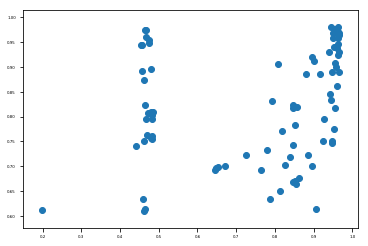

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import minmax_scale

df = df.dropna()
# df = df.apply(pandas.to_numeric())
# df = df.astype(float)

xs = list(df["students"].astype(float)) #list(df["f1"])
ys = list(df["items"].astype(float)) #list(df["macro_MPDRC"])
zs = list(df["f1"].astype(float))


plt.scatter(xs,ys)
plt.show()

30 -60


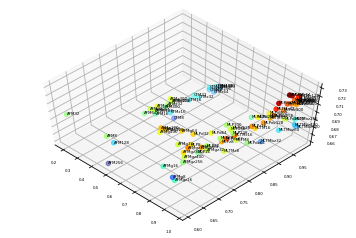

In [80]:
labs = df.index
# plt.figure(figsize=(6,6))
fig = plt.gcf()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection="3d")

cmap = plt.cm.get_cmap('jet')
cols = []
for x,y,z,l in zip(xs,ys,zs,labs):
    leng = z#numpy.sqrt(x**2 + y**2 + z**2)
    cols.append(leng)
cols = minmax_scale(cols)
cols = [cmap(c) for c in cols]
    
# xs=[1.0,0.0,1.0]
# ys=[0.0,1.0,1.0]
# zs=[1.0,2.0,3.0]
# for x,y,z,l in zip(xs,ys,zs,labs):
ax.scatter(xs,ys,zs, c=cols)
# ax.view_init(30, 10)

plt.rc('font', size=4)
for x,y,z,l in zip(xs,ys,zs,labs):
#     print(leng)
#     if math.isnan(leng):
#         continue
#     cl = cmap(leng)
    ax.text(x,y,z, l)
    
# lgnd = plt.legend()
# for handle in lgnd.legendHandles:
#     handle.set_sizes([30.0])
print(ax.elev, ax.azim)
ax.elev = 60
ax.azim = -45

plt.savefig(home+"/images/"+dataset_name+"_st_v_it_v_F1.pdf", format="pdf")
plt.show()

['AFM' 'AFMg' 'AFMgz' 'AFMz' 'CFM' 'CFMz' 'MLP' 'MLPd' 'MLPdz' 'MLPz'
 'MLTM' 'MLTM+' 'MLTM+z' 'MLTMbz' 'MLTMz' 'RASCH']
AFMgz 7
AFMz 7
CFMz 3
MLPdz 6
MLPz 7
MLTM+z 6
MLTMbz 5
MLTMz 7


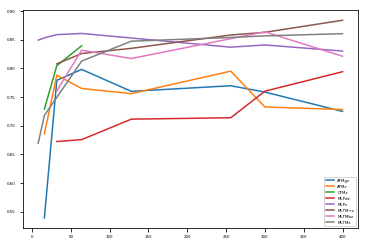

In [204]:
# for w in numpy.unique(df["w"]):
#     print(w)
# plt.figure(figsize=(10,10))
df.sort_values(["w"], ascending=True, inplace=True)
df["w"] = df["w"].astype(int)
modz = numpy.unique(df["model_fam"])
print(modz)
for mod in modz:
    if "z" not in mod:
        continue
    df2 = df[df.model_fam==mod]
    print(mod, len(df2))
    xs, ys = [], []
    for w in numpy.unique(df2["w"]):
#         print(grp.w)
    #     print(grp.macro_MPDRC.mean())
        grp = df2[df2["w"]==w]
        for x,y in zip(grp["w"], grp["macro_MPDRC"]):
            xs.append(x)
            ys.append(y)
    plt.plot(xs, ys, label=mod)
plt.legend()
plt.show()